# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [5]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

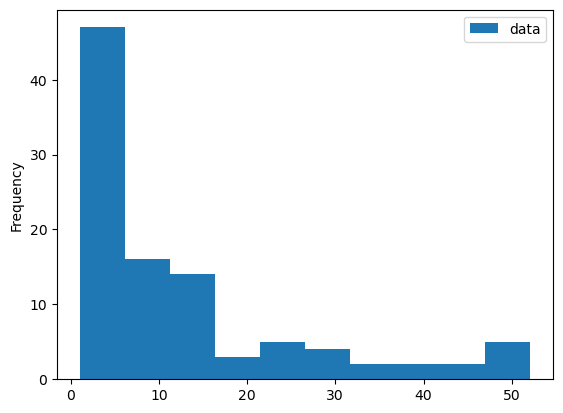

In [6]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

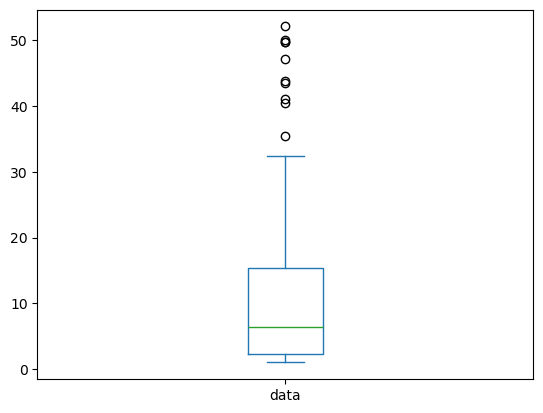

In [7]:
df.plot.box()

**Histogram**
Taking a look at the first chart, I would say its strengths and weaknesses are the following

**Pros**
- Gives us as the viewer a very clear visual on the distribution of the dataset
- Allows us to see the the frequency of values within a given bin range
- Allows us to see any skew within the data (in this case the data seems to be skewed to the left)

**Cons**
- While we can get an ideas of where potential outliers may lie in the data, they are not clearly defined in the graph
- Bin size can influence our interpretation of the data (the current bin size looks like it is going by intervals of 5. Perhaps if we changed this value we might gain new insights)
- While there is a printed output of the 17th percentile is is hard to visualize that on this graph)

If I were looking to make improvements to this graph I would start by adding a title and axis labels (we know the x-axis is for price because of the description provided above but someone looking at this graph for this first time may not). Given there are so many values in the 0-5 bin, I might look to the adjust the bin sizes. I also might look to include an overlayed KDE plot for better visualizations of the distribution. Finally, I might consider adding colors to the chart, similar to the work we did in the prior week. We could potentially color code certain types of drugs. Perhaps some medicines are more expensive than others. 

**Boxplot**
Taking a look at the second chart, I would say its strengths and weaknesses are the following

**Pros**
- Gives us a clear visual on the median, quartiles, and overall spread of the data.
- The boxplot allows us to clearly idenitfy outlier values in our dataset (denoted by the dotted values)
- Although this dataset only includes drug prices, the boxplot could potentially be applied to other aspects of the data as well (such as comparing the spread over time)

**Cons**
- The boxplot is not the best as visualizing the distribution of our dataset,
- While informative, the boxplot may not be as intuitive for folks that less familiar with the graph type (perhaps the administrator does not have a background in stats.

If I were looking to make improvements to this graph, similar to before, I would look to add a title and clear axis labels (not just "data"). Additionally, I might look to potentially add grid lines and create different boxplots based on drug categories.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Just like last week, let's create some helper functions that can be used across all our datasets.

In [14]:
def distribution_plots(df, col):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    plt.suptitle(f"EDA Plots for Column: {col}", fontsize=16)

    #Hist
    sns.histplot(df[col], kde=False, ax=axes[0, 0], color='skyblue', bins='auto')
    axes[0, 0].set_title('Histogram')

    #KDE
    sns.kdeplot(df[col], ax=axes[0, 1], fill=True, color='orange')
    axes[0, 1].set_title('KDE Plot')

    #Swarm
    sns.swarmplot(df[col].sample(n=1000), ax=axes[1, 0], size=3)

    #Violin
    sns.violinplot(df[col], ax=axes[1, 1])

    plt.tight_layout()
    plt.show()

In [15]:
def box_plot(df, col):
    figsize=(8, 5)
    sns.boxplot(y=df[col], color='cyan', whis=1.5)
    plt.xlabel(col)
    plt.title(f"Boxplot of {col}")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [16]:
def categorical_bar_plots(df, col, color, rot):
    counts = df[col].value_counts()
    figsize=(8, 5)
    plt.figure(figsize=figsize)
    sns.barplot(x=counts.index.astype(str), y=counts.values, color=color)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=rot, fontsize=9)
    plt.tight_layout()
    plt.show()

In [17]:
def grouped_hist(df, measure_col, group_col, bins):
    groups = df[group_col].unique()
    figsize=(8, 5)
    for group in groups:
        subset = df[df[group_col] == group][measure_col].dropna()
        sns.histplot(subset, bins=bins, label=str(group), kde=False, alpha=0.5)
    
    plt.xlabel(measure_col)
    plt.ylabel("Count")
    plt.title(f"Grouped Histogram of {measure_col} by {group_col}")
    plt.legend(title=group_col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [18]:
def col_summary_stastistics(df, col):
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()

    print(f"{col} Mean: {mean_val}")
    print(f"{col} Median: {median_val}")
    print(f"{col} Mode: {mode_val.tolist()}")
    print('\n')

In [19]:
def get_hist_min_max(df, col, bins='auto'):
    #create a histogram with selected amount of bins (will default to the auto selected value)
    counts, bin_edges = np.histogram(df[col], bins=bins)

    #identify bins with data
    nonzero_indices = np.where(counts > 0)[0]

    min_val = bin_edges[nonzero_indices[0]]
    max_val = bin_edges[nonzero_indices[-1] + 1]

    print(f"Histogram minimum: {min_val}")
    print(f"Histogram maximum: {max_val}")

In [20]:
def get_top_n_categories(df, col, n):
    return df[col].value_counts().head(n)

In [21]:
def top_bottom_5(df, col1, col2):
    unique_df = df[[col1, col2]].drop_duplicates()
    top_5 = unique_df.nlargest(5, col2)
    bottom_5 = unique_df.nsmallest(5, col2)
    return pd.concat([top_5, bottom_5])

Now let's load our cleaned up datasets from week 2

In [23]:
# Credit Card Fraud Data
CreditCardFraud = pd.read_csv("CreditCardFraudCleaned.csv")

# Credit Card Approval Dataset
CreditCardApproval = pd.read_csv("CreditCardApprovalCleaned.csv")

# Loan Default Prediction
LoanDefaultPrediction = pd.read_csv("LoanDefaultPredictionClean.csv")

## Credit Card Fraud Data

Let's start by taking a look at our credit card fraud dataset from last week.

In [26]:
CreditCardFraud.iloc[:, :24].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [27]:
CreditCardFraud = CreditCardFraud.iloc[:, :24]

Lets fix our date column. In addition let's create a separate dataframe only containing fraud rows for some visualizations later down the line.

In [29]:
CreditCardFraud['trans_date_trans_time'] = pd.to_datetime(CreditCardFraud['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
CreditCardFraud['trans_hour'] = CreditCardFraud['trans_date_trans_time'].dt.hour
FraudOnly_df = CreditCardFraud[CreditCardFraud['is_fraud'] == 1]

Now let's start working our way through the dataset

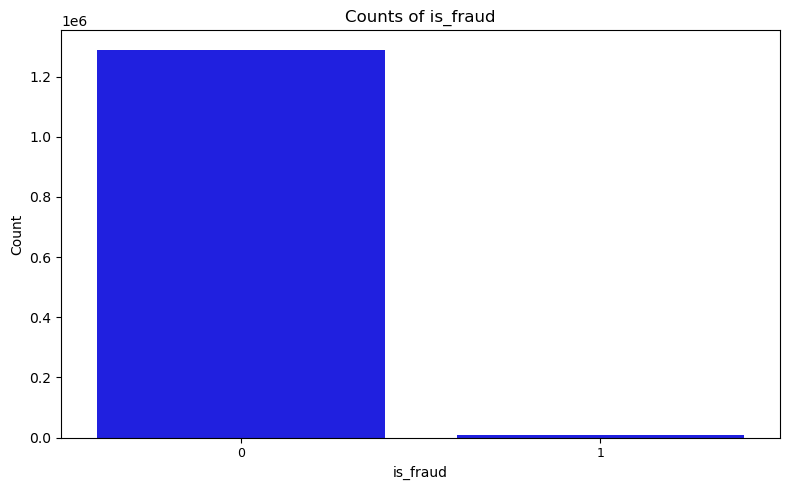

In [334]:
categorical_bar_plots(CreditCardFraud, 'is_fraud', 'blue', 0)

Looking at our target variable, it appears that only a small fraction of our transactions are actually fraudulent. Working in fraud analytics myself, this tracks with normal trends.

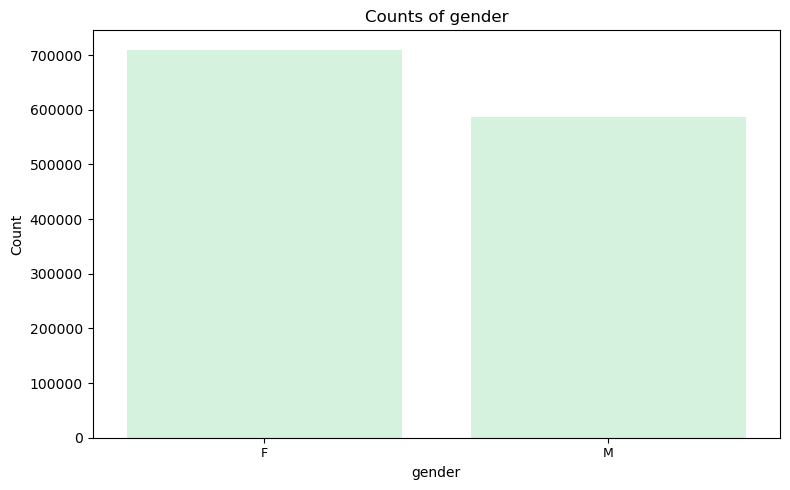

In [31]:
categorical_bar_plots(CreditCardFraud, 'gender', '#cff7dc', 0)

A relatively even distribution, with female having a slightly overall higher frequency. Now let's take a look at our fraud population.

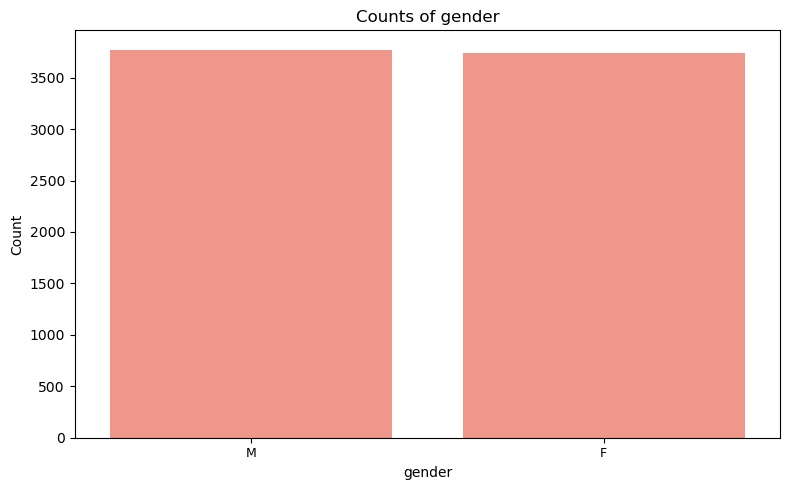

In [33]:
categorical_bar_plots(FraudOnly_df, 'gender', '#ff8b79', 0)

An almost perfect split

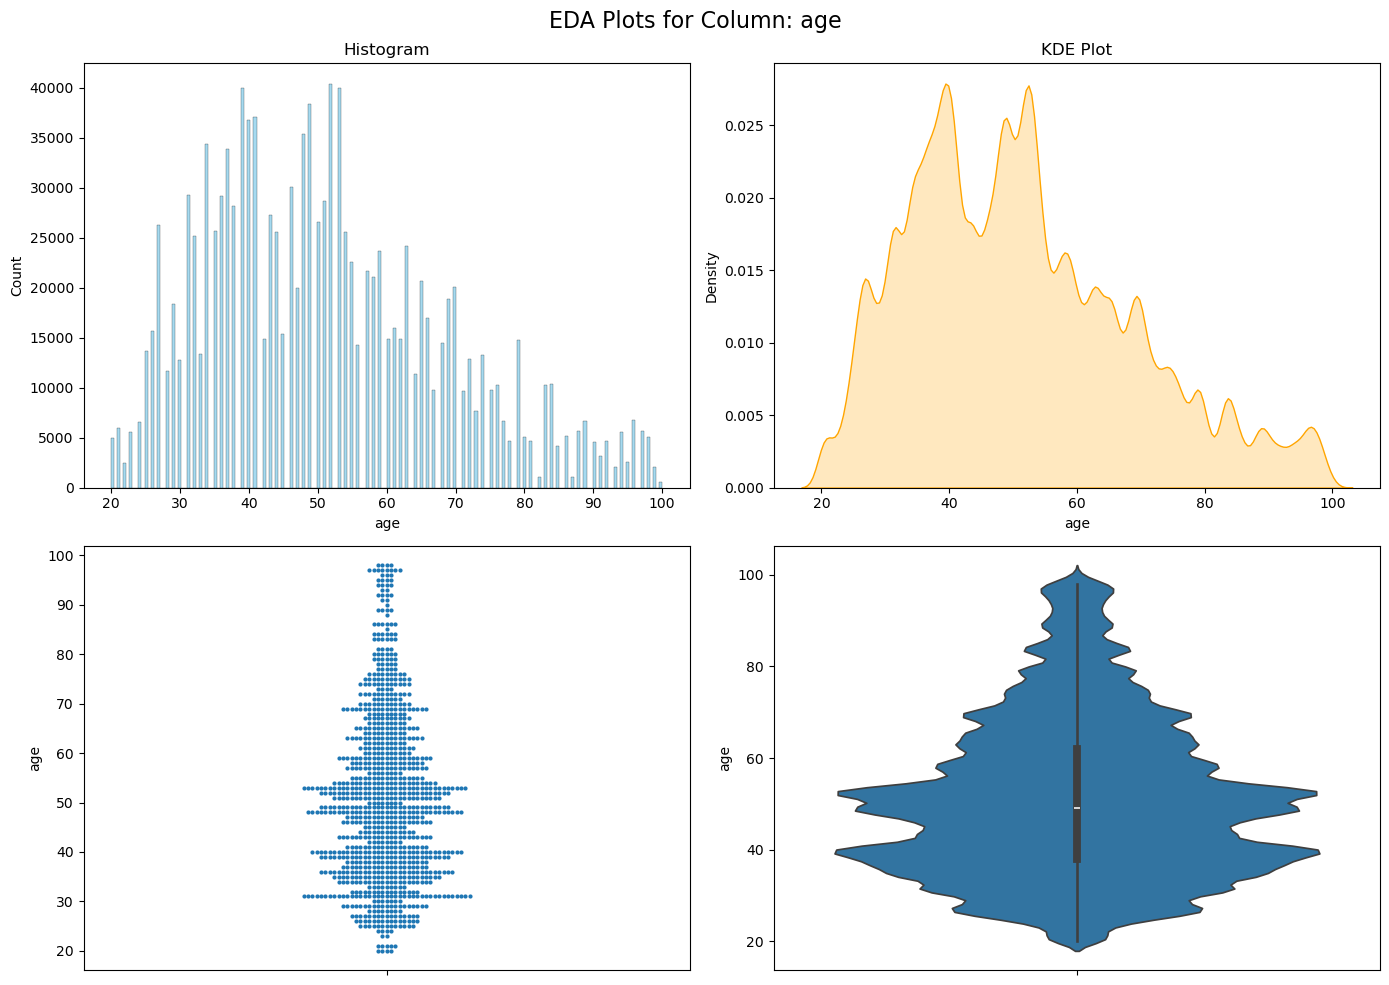

In [35]:
distribution_plots(CreditCardFraud, 'age')

In [36]:
get_hist_min_max(CreditCardFraud, 'age', 'auto')

Histogram minimum: 20.0
Histogram maximum: 100.0


<Axes: xlabel='age', ylabel='Count'>

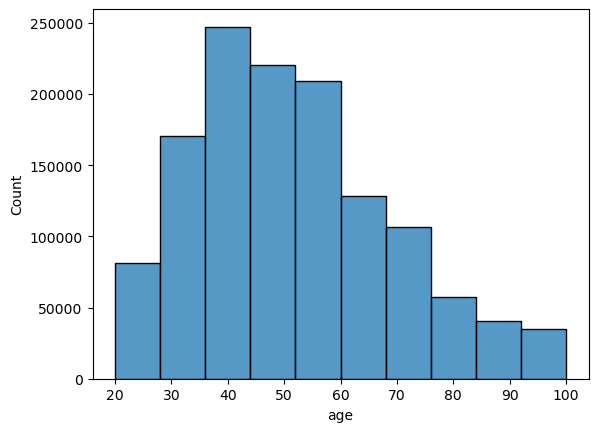

In [37]:
sns.histplot(CreditCardFraud['age'], bins=10)

<Axes: xlabel='age', ylabel='Count'>

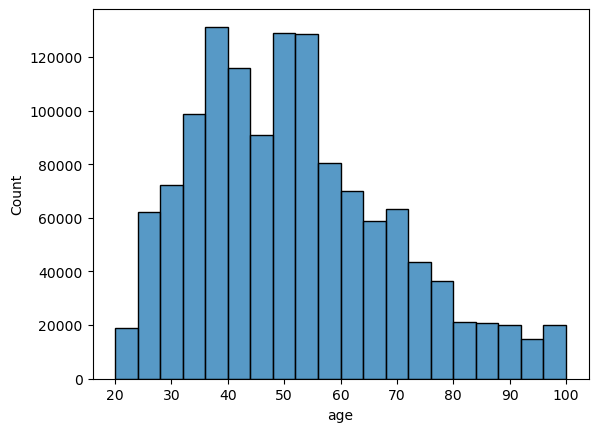

In [38]:
sns.histplot(CreditCardFraud['age'], bins=20)

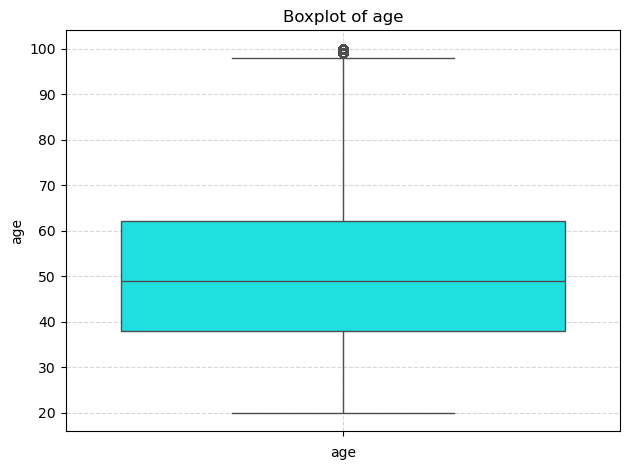

In [39]:
box_plot(CreditCardFraud, 'age')

In [40]:
col_summary_stastistics(CreditCardFraud, 'age')

age Mean: 51.19288025141227
age Median: 49.0
age Mode: [52]




In [41]:
q1 = CreditCardFraud['age'].quantile(0.25)
q3 = CreditCardFraud['age'].quantile(0.75)
iqr = q3 - q1
print(f"Boxplot Upper Bound: {q3 + 1.5 * iqr}")

Boxplot Upper Bound: 98.0


Looking at our age column, there isnt too much that is surprsing here. Our average customer age is right near fifty, with a higher concentration being found on the younger side as the histograms taper off the higher age gets. We have a few folks near age 100 who are considered outliers but this should not be cause for concern as it is within reasonable possible values.

Let's try a grouped histogram next

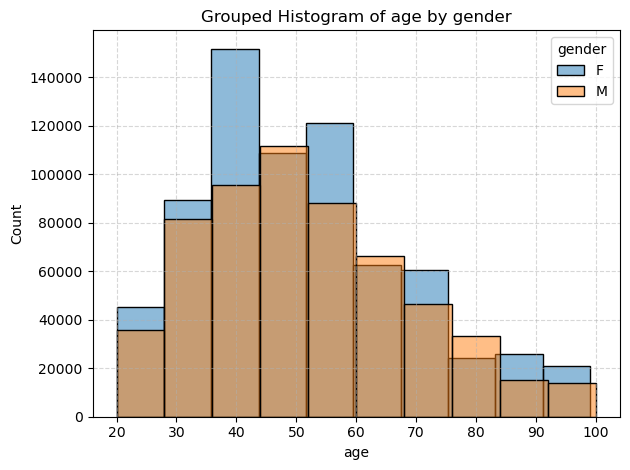

In [43]:
grouped_hist(CreditCardFraud, 'age', 'gender', 10)

It seems like our distribution does differ too much, and these values are somehwat in line with our gender histogram from earlier... Let's see this hist from a fraud perspective next.

Text(0.5, 1.0, 'Age Distribution of Confirmed Fraudsters')

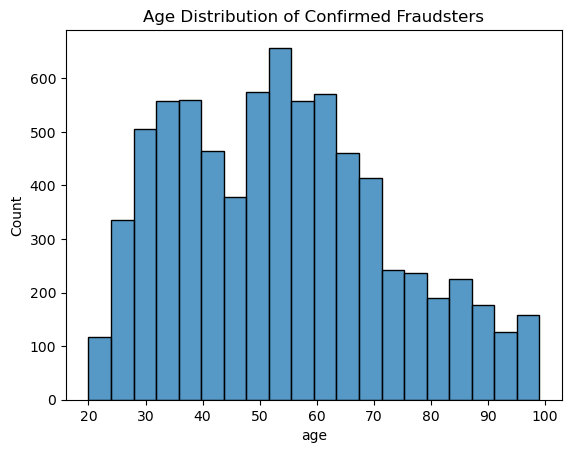

In [45]:
sns.histplot(FraudOnly_df['age'], bins=20)
plt.title('Age Distribution of Confirmed Fraudsters')

This graph is incredibly similar to our previous age hist. It seems like fraud happens at all ages.

Next, lets take a look at some of our categorical columns that have quite a few unique values. For the sake of these we can just look at the top categories.

In [48]:
top_10_jobs = get_top_n_categories(CreditCardFraud, 'job', 10)

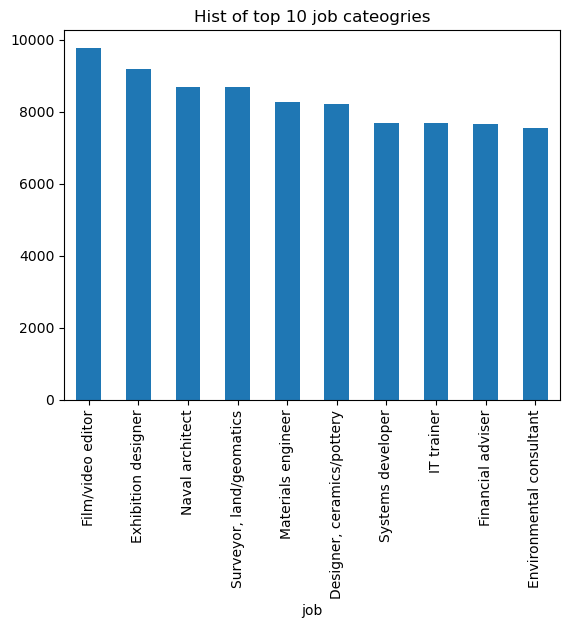

In [49]:
top_10_jobs.plot(kind='bar')
plt.title('Hist of top 10 job cateogries')
plt.show()

In [50]:
top_10_states = get_top_n_categories(CreditCardFraud, 'state', 10)

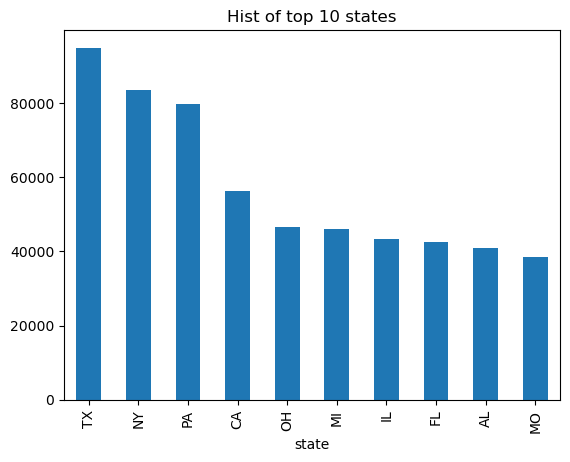

In [51]:
top_10_states.plot(kind='bar')
plt.title('Hist of top 10 states')
plt.show()

In [52]:
top_10_cities = get_top_n_categories(CreditCardFraud, 'city', 10)

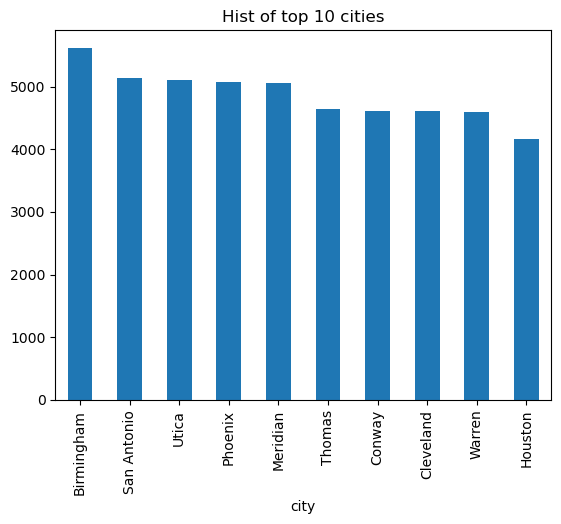

In [53]:
top_10_cities.plot(kind='bar')
plt.title('Hist of top 10 cities')
plt.show()

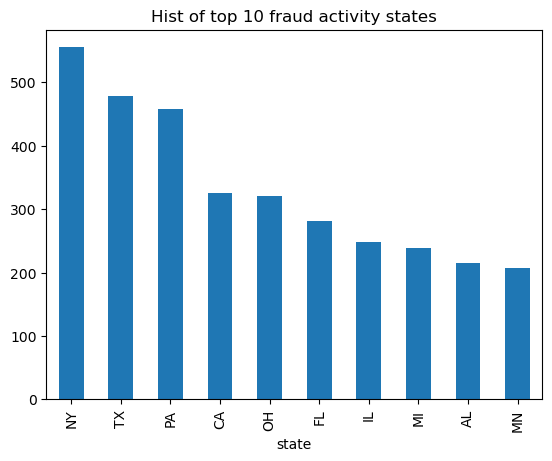

In [54]:
top_10_fraud_states = get_top_n_categories(FraudOnly_df, 'state', 10)
top_10_fraud_states.plot(kind='bar')
plt.title('Hist of top 10 fraud activity states')
plt.show()

Nothing too crazy here either. Larger states like TX, NY, and CA are at the forefront when it comes to transaction volume. What is a little interesting is that some of our top cities like birmingham correspond with states that are a little lower on our list. Is it possible that these cities exist in multiple states and are being overpreresented here?

Additionally looking at out fraud states graph, it is somewhat similar to our original graph which a few values shifted around

C:\Users\jdblu\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


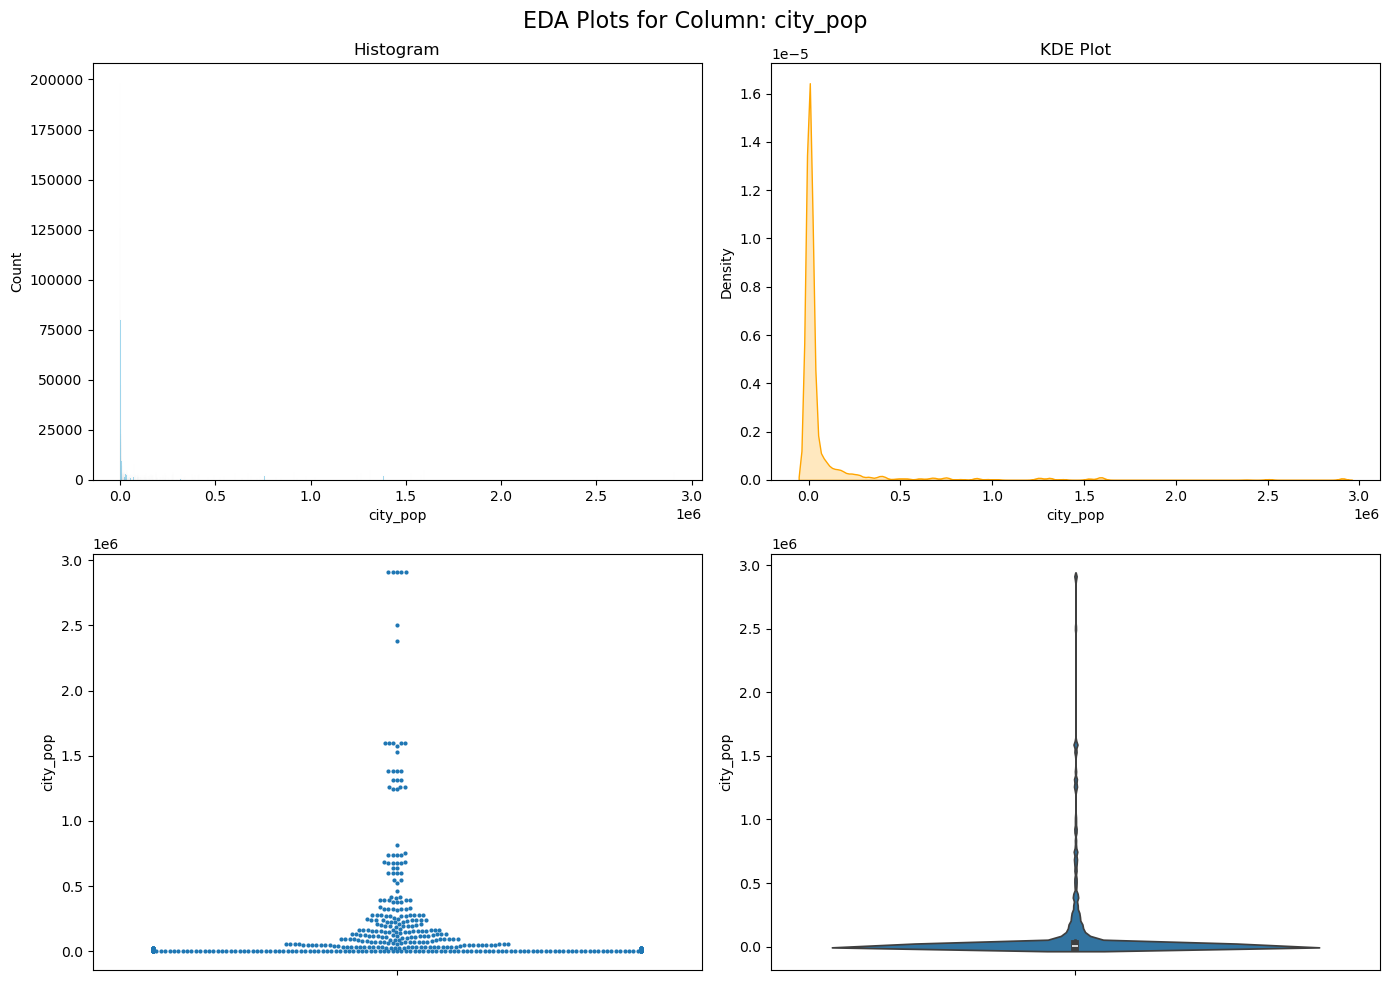

In [56]:
distribution_plots(CreditCardFraud, 'city_pop')

In [57]:
get_hist_min_max(CreditCardFraud, 'city_pop', 'auto')

Histogram minimum: 23.0
Histogram maximum: 2906700.0


While very odd looking, this is actually a pretty weird (but totally expected) graph. In the top left hand corner, we can barely see our histogram. This is most likely due to some cities with extremely high values that are causing the tail to shoot way out to the right hand side. Most cities are relatively small, so these really change the shape of our graph. lets visualize these some more.

<Axes: xlabel='city_pop', ylabel='Count'>

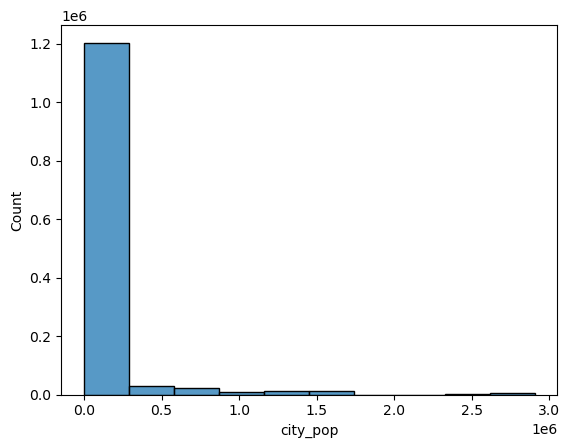

In [59]:
sns.histplot(CreditCardFraud['city_pop'], bins=10)

<Axes: xlabel='city_pop', ylabel='Count'>

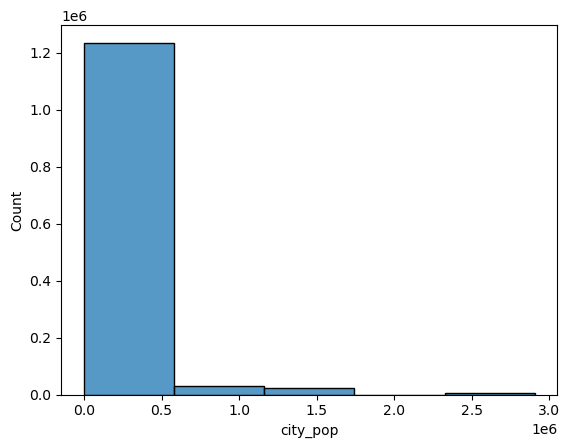

In [60]:
sns.histplot(CreditCardFraud['city_pop'], bins=5)

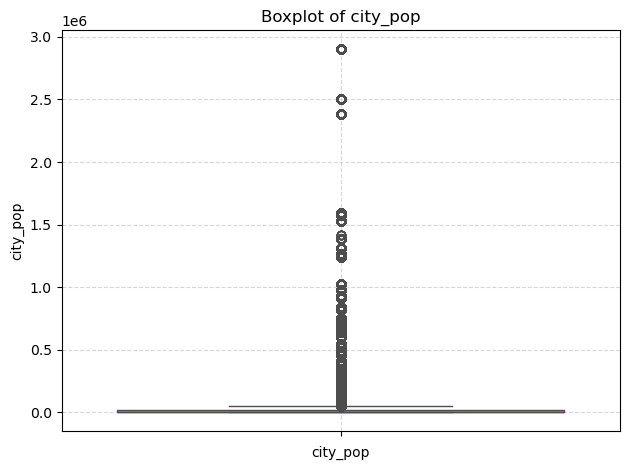

In [61]:
box_plot(CreditCardFraud, 'city_pop')

In [62]:
col_summary_stastistics(CreditCardFraud, 'city_pop')

city_pop Mean: 88824.44056297839
city_pop Median: 2456.0
city_pop Mode: [606]




In [63]:
cities_of_interest = top_bottom_5(CreditCardFraud, 'city', 'city_pop')

In [64]:
print(cities_of_interest)

                city  city_pop
608          Houston   2906700
1977        Brooklyn   2504700
7244     Los Angeles   2383912
210      San Antonio   1595797
105    New York City   1577385
476          Notrees        23
425          Gregory        37
436         Ratcliff        43
42          Thompson        46
14865    West Bethel        47


unsurprising, our average city size 8000 people, somewhat standard for small-medium sizes towns which are scattered across the US. These are drwarfed by mega cities like the one's seen in our list above. When doing further work with this data it might be worth looking into where fraud occurs.

Speaking of where, we also have some long/lat values that we can visualize.

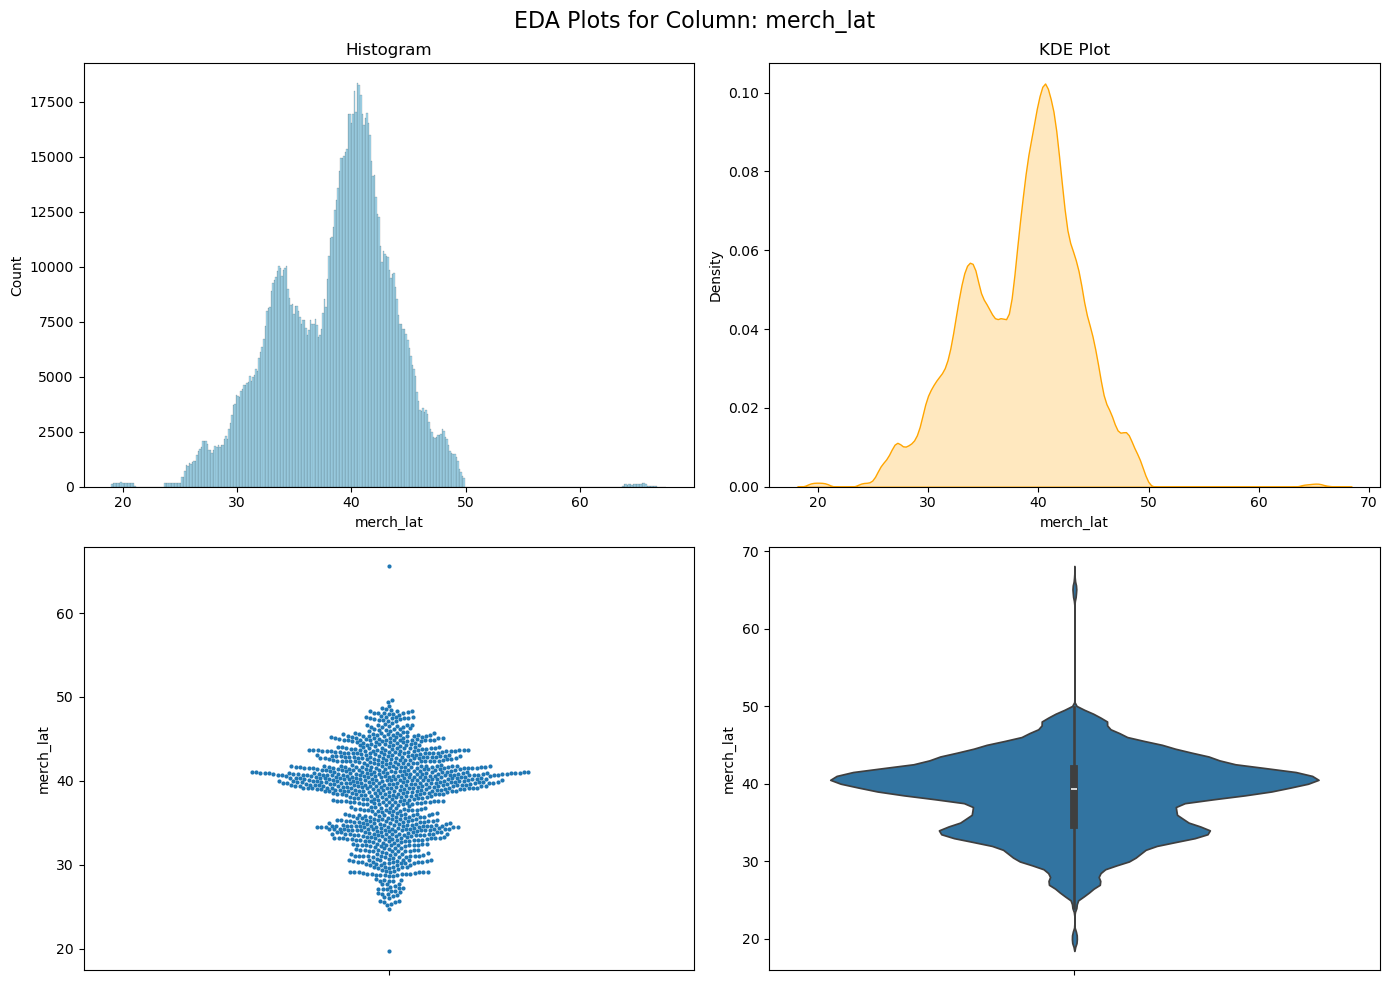

In [66]:
distribution_plots(CreditCardFraud, 'merch_lat')

<Axes: xlabel='merch_lat', ylabel='Count'>

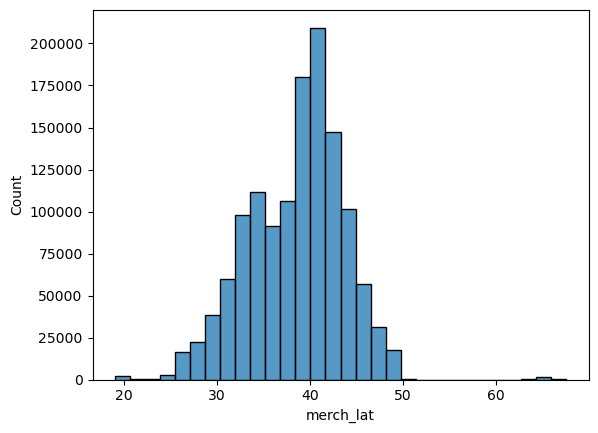

In [67]:
sns.histplot(CreditCardFraud['merch_lat'], bins=30)

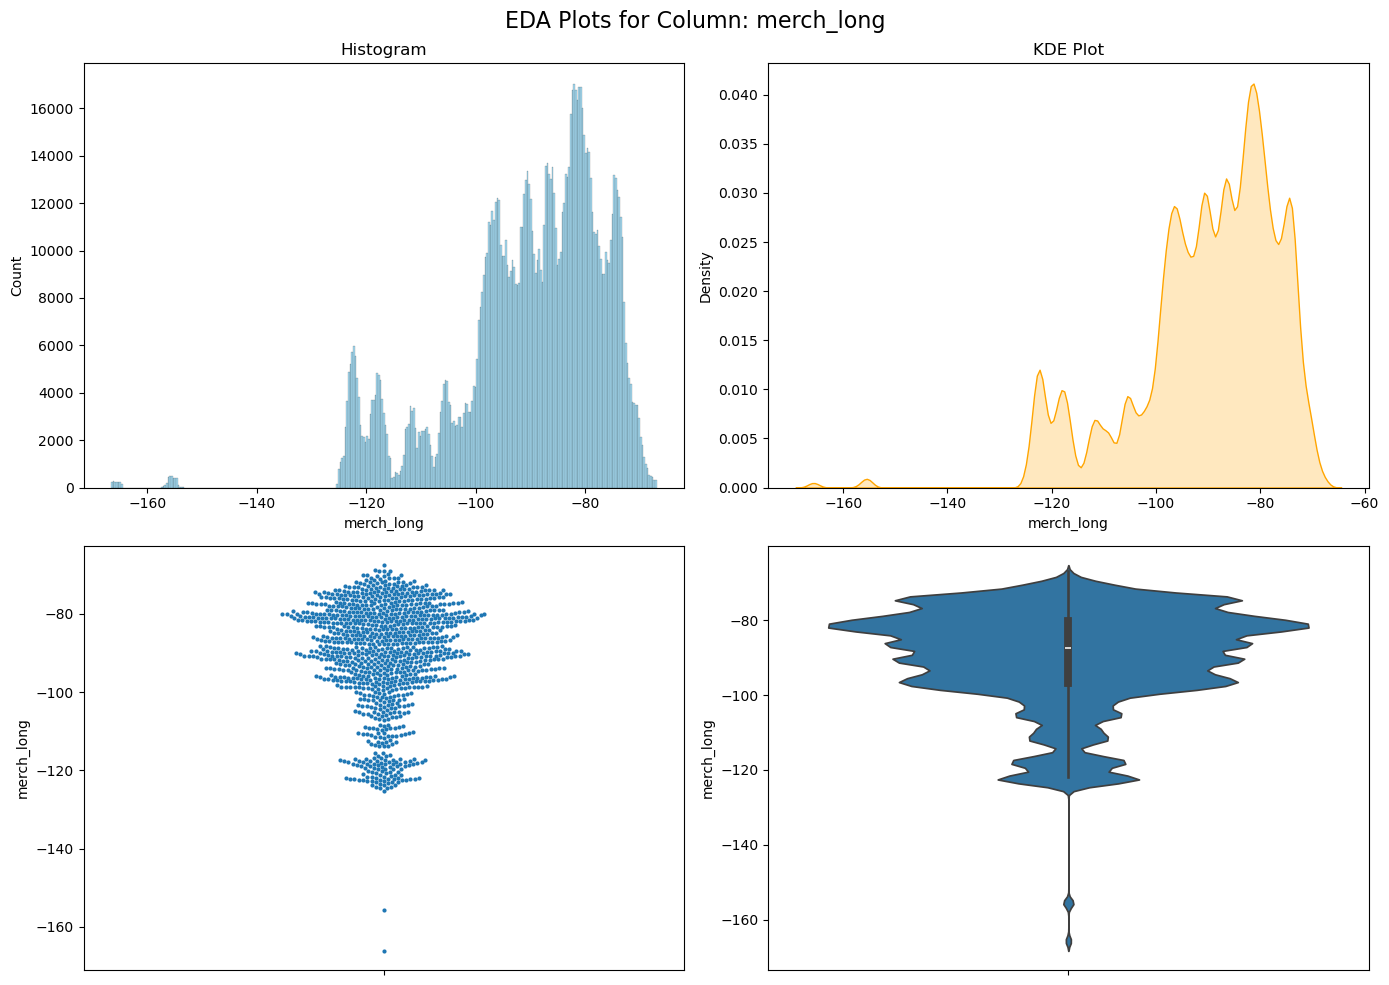

In [68]:
distribution_plots(CreditCardFraud, 'merch_long')

<Axes: xlabel='merch_long', ylabel='Count'>

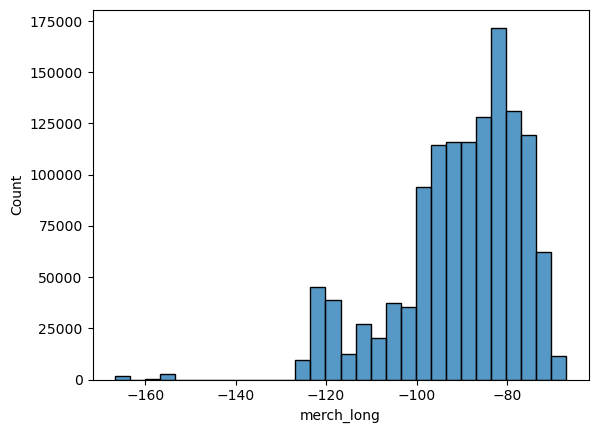

In [69]:
sns.histplot(CreditCardFraud['merch_long'], bins=30)

While not the most helpful, these graphs are pretty fun in that they allow us to see where people are buying things (where the merchants are located). We could look to use these values later down the line to group customers and trends by region. Using exact coordinates can be difficult however as lat/lon is not generally not linearly interpretable by models and geographic proximity is hard to capture. 

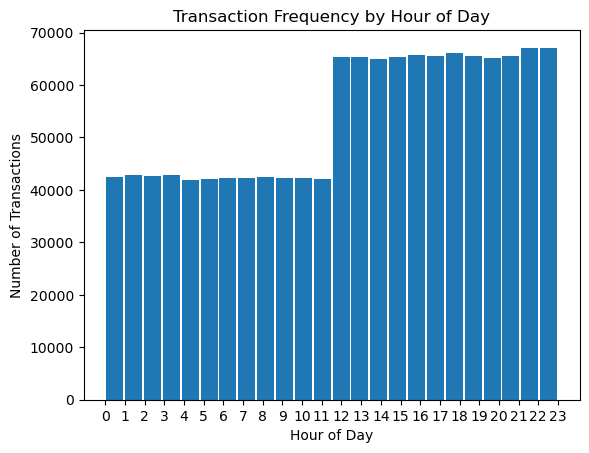

In [71]:
CreditCardFraud['trans_hour'].plot(kind='hist', bins=24, rwidth=0.9)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Transaction Frequency by Hour of Day')
plt.xticks(range(0, 24))
plt.show()

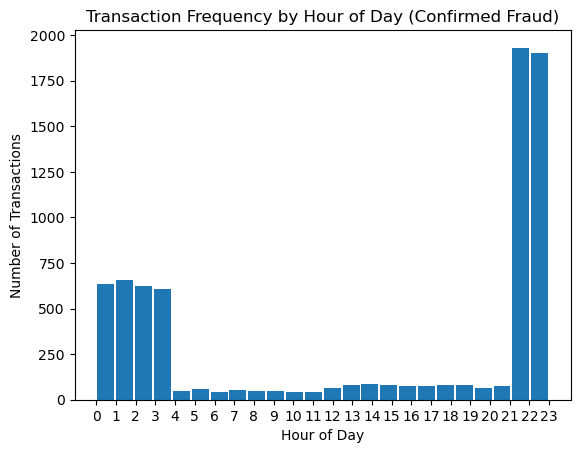

In [72]:
FraudOnly_df['trans_hour'].plot(kind='hist', bins=24, rwidth=0.9)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Transaction Frequency by Hour of Day (Confirmed Fraud)')
plt.xticks(range(0, 24))
plt.show()

I think this might be the most interesting graph in this whole analysis. Look at the time of day of our transactions, we can see they are pretty equal throughough the day, with a clear jump in the afternoon. However, when isolating just the fraud data, we can see a very clear trend that fraud happens in the middle of the night (from 11 PM EST - 3 AM EST). This is something I would like to dig into further in the future.

Next lets look at some other transaction specific categorical variables

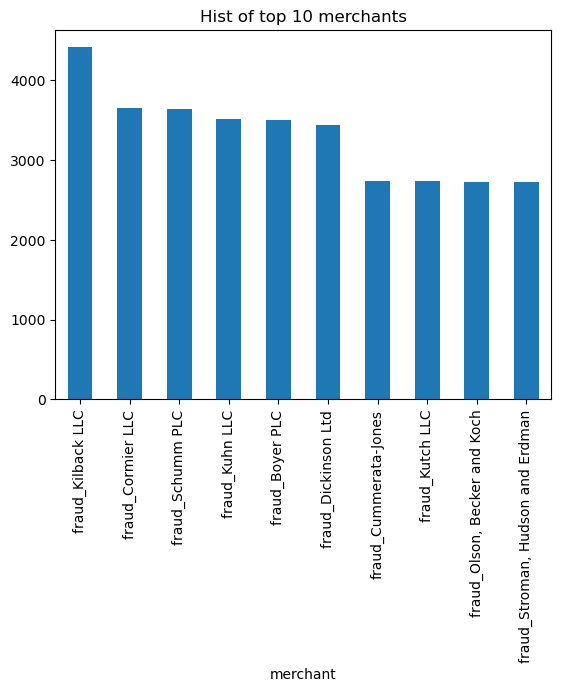

In [74]:
top_10_merchants = get_top_n_categories(CreditCardFraud, 'merchant', 10)
top_10_merchants_fraud_only = get_top_n_categories(FraudOnly_df, 'merchant', 10)
top_10_merchants.plot(kind='bar')
plt.title('Hist of top 10 merchants')
plt.show()

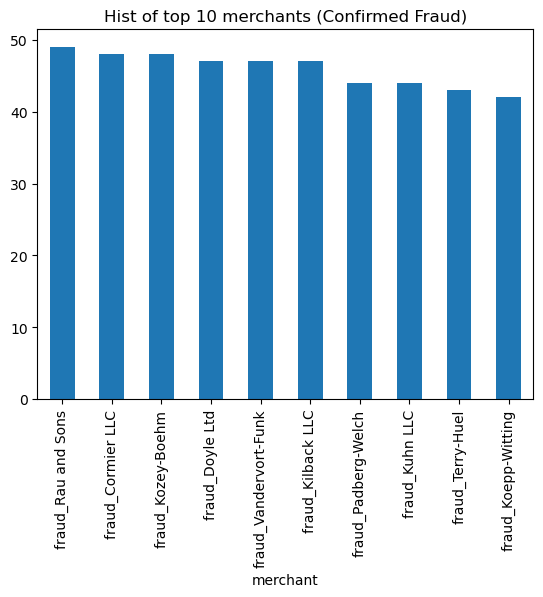

In [75]:
top_10_merchants_fraud_only.plot(kind='bar')
plt.title('Hist of top 10 merchants (Confirmed Fraud)')
plt.show()

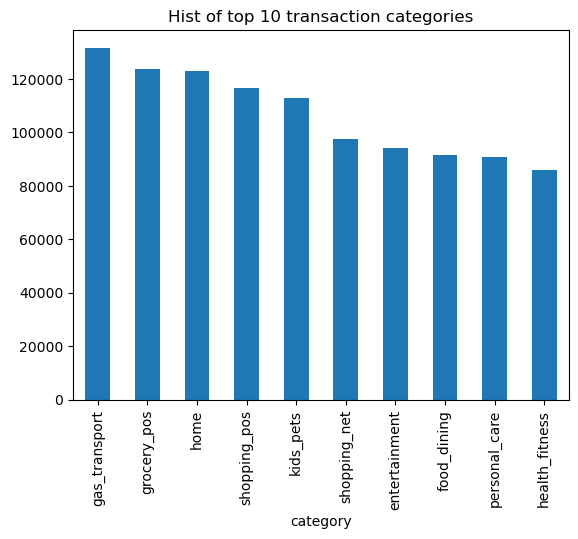

In [76]:
top_10_trans_categories = get_top_n_categories(CreditCardFraud, 'category', 10)
top_10_trans_categories_fraud_only = get_top_n_categories(FraudOnly_df, 'category', 10)
top_10_trans_categories.plot(kind='bar')
plt.title('Hist of top 10 transaction categories')
plt.show()

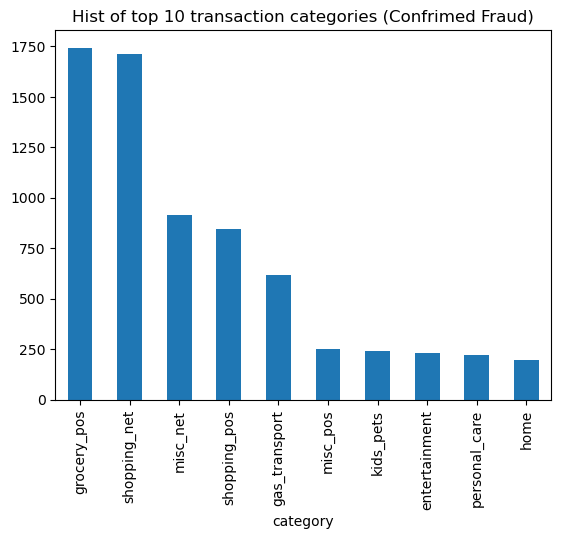

In [77]:
top_10_trans_categories_fraud_only.plot(kind='bar')
plt.title('Hist of top 10 transaction categories (Confrimed Fraud)')
plt.show()

Looking at the above charts, there isn't anything sticking out to me immediately. It seems like fraud is being committed on much of the same vendors as normal behaviors as is their transactions. Interestingly enough, groceries seem to be the largest category of fraud (times are tough). In future work, we can look to examine this more, but for now we can continue on with other columns.

C:\Users\jdblu\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


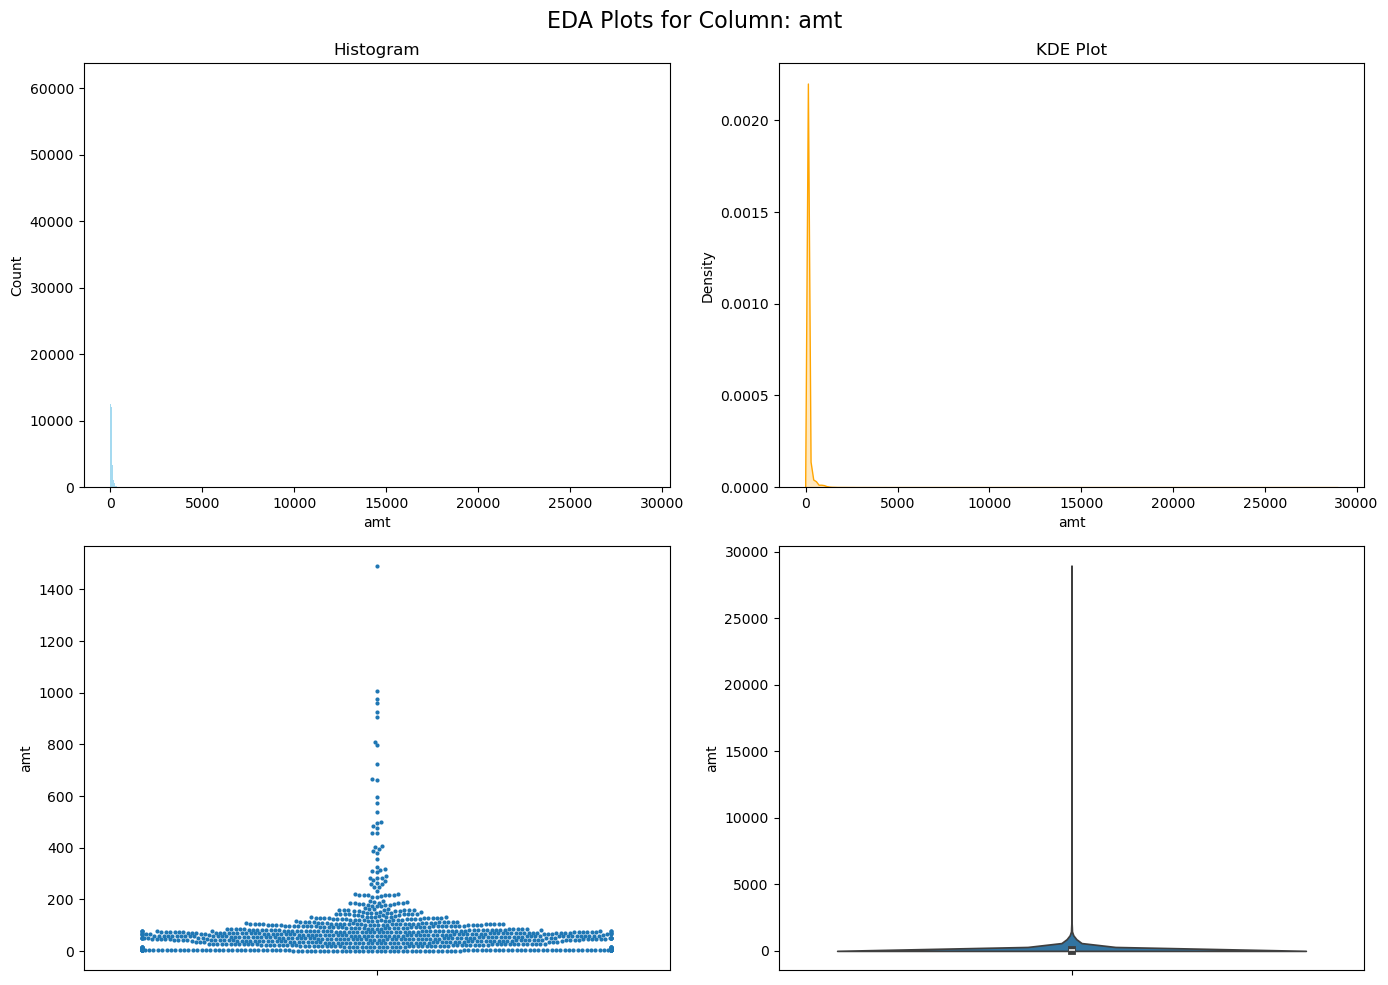

In [79]:
distribution_plots(CreditCardFraud, 'amt')

<Axes: xlabel='amt', ylabel='Count'>

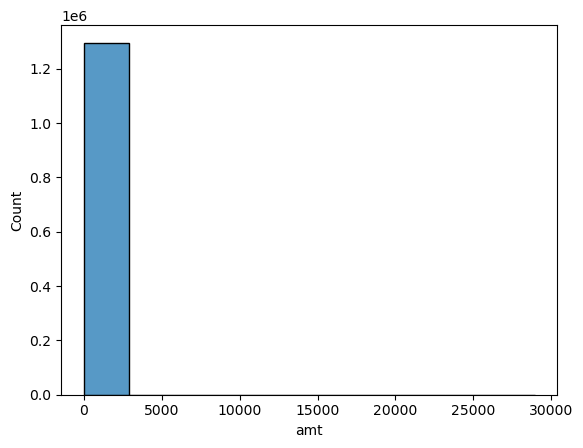

In [80]:
sns.histplot(CreditCardFraud['amt'], bins=10)

<Axes: xlabel='amt', ylabel='Count'>

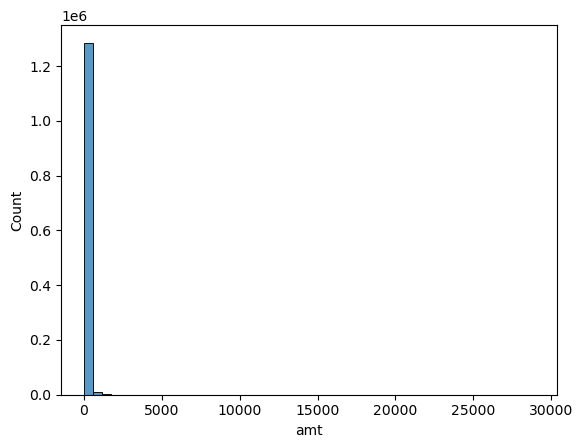

In [81]:
sns.histplot(CreditCardFraud['amt'], bins=50)

In [82]:
get_hist_min_max(CreditCardFraud, 'amt', 'auto')

Histogram minimum: 1.0
Histogram maximum: 28948.9


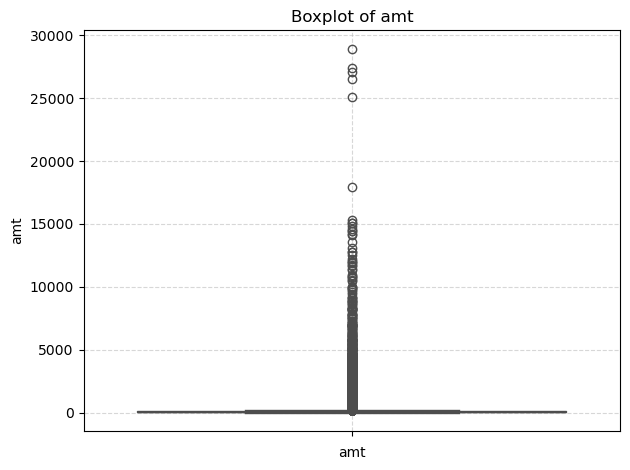

In [83]:
box_plot(CreditCardFraud, 'amt')

In [84]:
col_summary_stastistics(CreditCardFraud, 'amt')

amt Mean: 70.35103545607033
amt Median: 47.52
amt Mode: [1.14]




In [85]:
top_10_amt = CreditCardFraud.nlargest(10, 'amt')
print(top_10_amt['amt'])

787549     28948.90
793677     27390.12
1234797    27119.77
606211     26544.12
352894     25086.94
187885     17897.24
1100138    15305.95
752016     15047.03
150564     15034.18
1245847    14849.74
Name: amt, dtype: float64


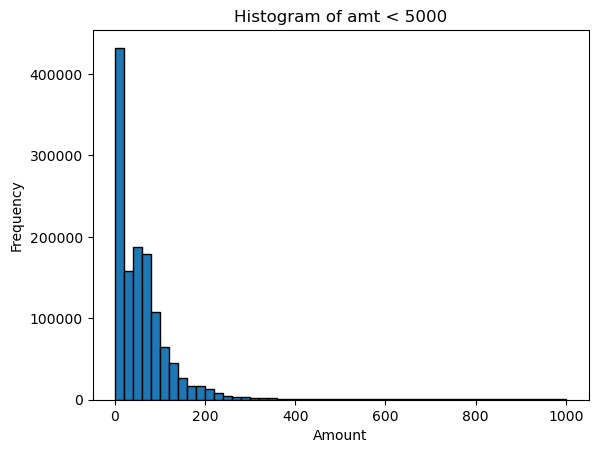

In [86]:
CreditCardFraud[CreditCardFraud['amt'] < 1000]['amt'].plot(kind='hist', bins=50, edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of amt < 5000')
plt.show()

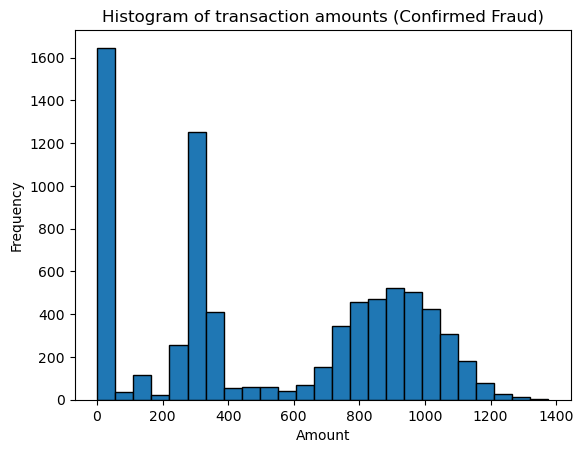

In [87]:
FraudOnly_df['amt'].plot(kind='hist', bins=25, edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of transaction amounts (Confirmed Fraud)')
plt.show()

for our last column, I wanted to look at one column I believed to be quite important, the transaction dollar amount. Looking at our first histogram, we encounter a similar issue to our city population visualizations. We have extremely large outlier purchases that are causing our hist to shoot way our to the right tail of our graph. Further examining the boxplot, we can see quite a few large outliers. The average transaction is actually quite small at $70 in comparison so some of our more expensive purchases. If we limit our dataset to just transactions lower than 1000, we can see a much cleaner looking graph that is still heavily skewed. Looking at our fraud specific data we can actually see some interesting patterns. Fraud spikes are very low transaction amounts and then again around 300 before making what looks like a normal looking distribtuin between ~700-1200. These suggest that maybe crimials use certain transaction amounts to skirt rules. We will look to try and pick up on this further when we perform modeling. 

### Conclusion - Credit Card Fraud

Looking through the features, this is a clean and concise dataset. We have a robust set of features that I believe we can try to use ML techniques to predict fraudulent transactions. There were no specific columns that stuck out to me as problematic. While some of our columns definitely had outliers, their actual values aren't outside the realm of possibility. If they present issues down the road, we might look to remove them, or transform the dataset to reach a better distribution. Overall, This dataset appears to be a suitable for modeling.

## Credit Card Approval Data

Next lets look at our credit card approval dataset

In [93]:
CreditCardApproval.sample(n=5)

Applicant_ID Applicant_Gender  Owned_Car  Owned_Realty  Total_Children  \
9161        5054661          M                1             1               0   
10634       5066452          F                0             1               0   
24473       5149203          F                0             1               1   
5227        5036581          M                0             1               0   
1360        5021301          F                0             1               0   

       Total_Income                                        Income_Type  \
9161         135000  Working                                       ...   
10634        315000  Commercial associate                          ...   
24473        225000  Commercial associate                          ...   
5227          90000  Commercial associate                          ...   
1360          90000  Working                                       ...   

                                          Education_Type  \
9161   Higher education                              ...   
10634  Secondary / secondary special                 ...   
24473  Higher education                              ...   
5227   Higher education                              ...   
1360   Higher education                              ...   

                                           Family_Status  \
9161   Single / not married                          ...   
10634  Single / not married                          ...   
24473  Separated                                     ...   
5227   Married                                       ...   
1360   Single / not married                          ...   

                                            Housing_Type  ...  \
9161   House / apartment                             ...  ...   
10634  House / apartment                             ...  ...   
24473  House / apartment                             ...  ...   
5227   House / apartment                             ...  ...   
1360   House / apartment                             ...  ...   

       Married                                             \
9161                                                   0    
10634                                                  0    
24473                                                  0    
5227                                                   1    
1360                                                   0    

       Separated                                           \
9161                                                   0    
10634                                                  0    
24473                                                  1    
5227                                                   0    
1360                                                   0    

       Single / not married                                \
9161                                                   1    
10634                                                  1    
24473                                                  0    
5227                                                   0    
1360                                                   1    

       Widow                                               \
9161                                                   0    
10634                                                  0    
24473                                                  0    
5227                                                   0    
1360                                                   0    

      Co-op apartment                                     \
9161                                                   0   
10634                                                  0   
24473                                                  0   
5227                                                   0   
1360                                                   0   

       House / apartment                                   \
9161                                                   1    
10634      

In [94]:
CreditCardApproval.iloc[:, :21].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

Looking at our dataset, we have quite a few columns (not included the one's we have previously auto_encoded). Let's one by one go through each of them.

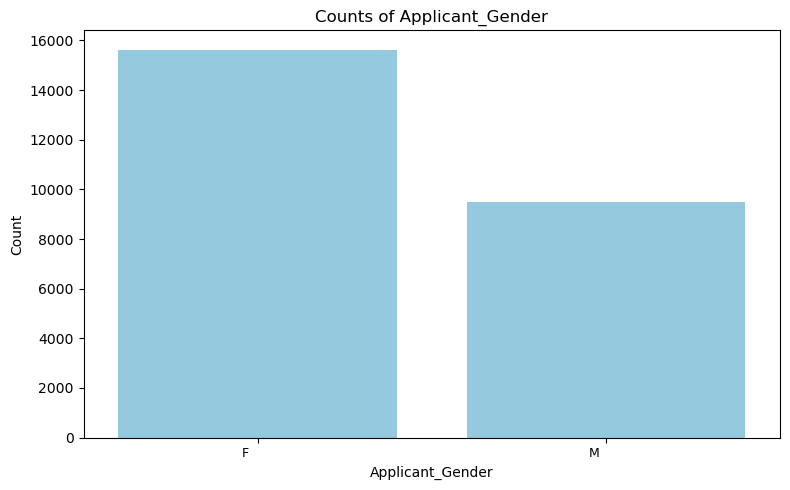

In [96]:
categorical_bar_plots(CreditCardApproval, 'Applicant_Gender', 'skyblue', 0)

Looking at the genders of our population, it is apparent that the majority of applicants in this population are female. While there is quite a big difference, it does not present any immediate issues with the usability of our dataset.

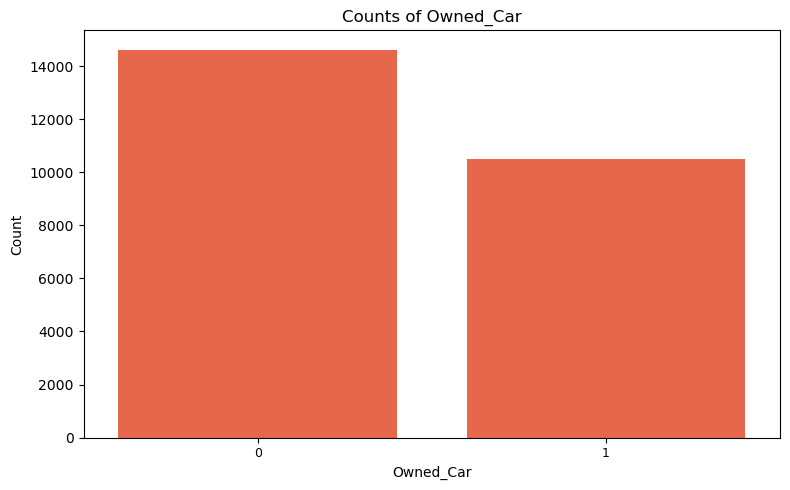

In [98]:
categorical_bar_plots(CreditCardApproval, 'Owned_Car', '#FF5733', 0)

Looking at this graph it appears that we have a decent mix of car owners in this population with 0 (no owned car) holding the majority.

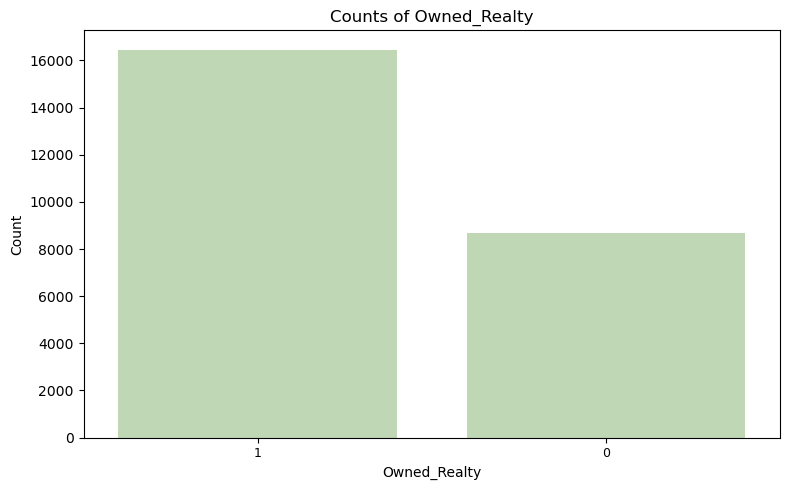

In [100]:
categorical_bar_plots(CreditCardApproval, 'Owned_Realty', '#bedcb0', 0)

Looking at this graph, we can see that the majority of our applicants (about 2/3rds) appear to own some form of realty. This does not give me any reason to worry.

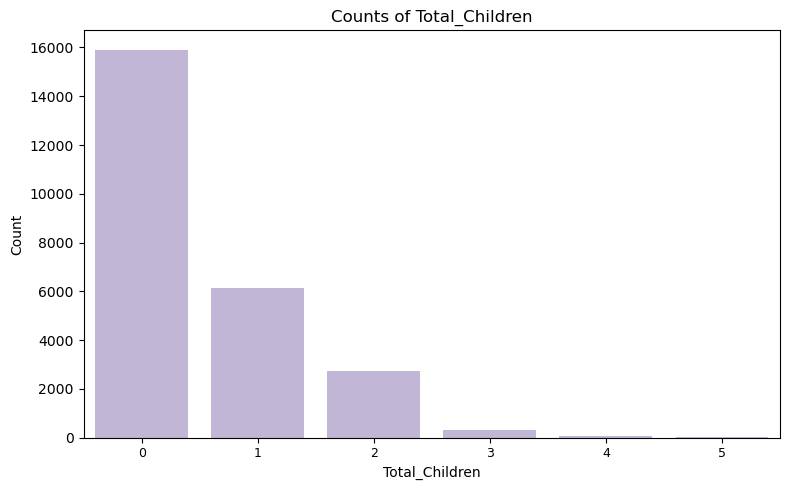

In [102]:
categorical_bar_plots(CreditCardApproval, 'Total_Children', '#c1b0dc', 0)

Looking at the graph of total children had by applicants, we can see a pretty expected distribution. The vast majority of our applicants have no children, with the second highest category being 1. Each proceeding columns has a smaller and smaller frequency. Although this is technically a categorical variable, I am curious what this would look like if we drew a box-plot.

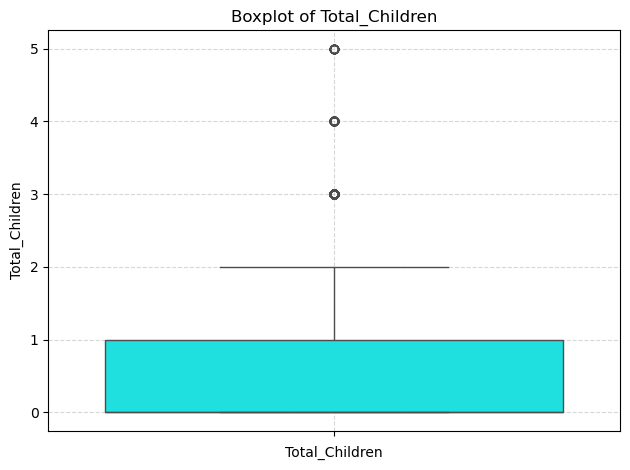

In [104]:
box_plot(CreditCardApproval, 'Total_Children')

As I was expecting, families with 3 or more children are actually considered outliers within this dataset. This isn't too much cause for concern (I personally came from a family of 3) but is interesting nonetheless.

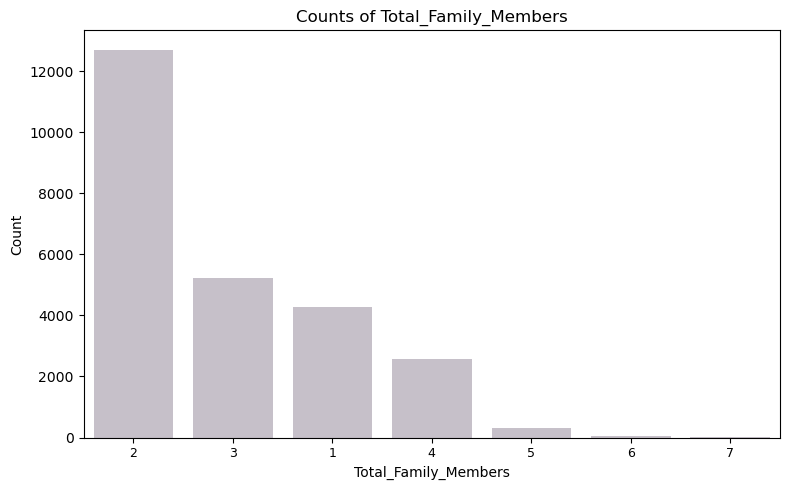

In [106]:
categorical_bar_plots(CreditCardApproval, 'Total_Family_Members', '#c7bfca', 0)

It appears that family Size follows a similar trend

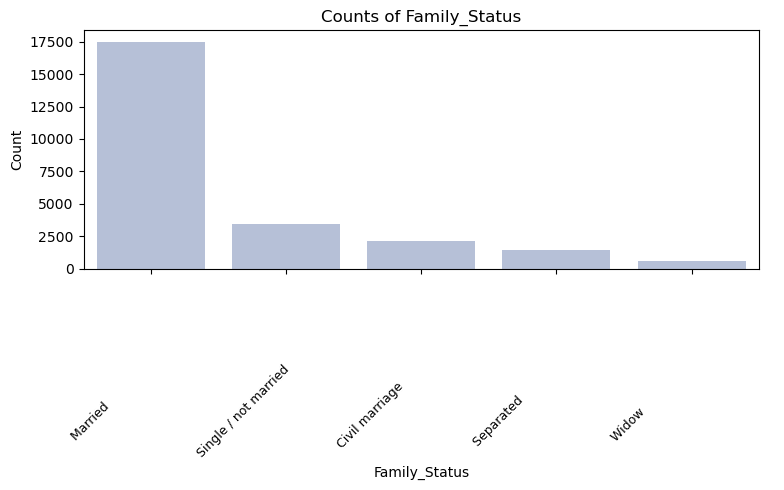

In [108]:
categorical_bar_plots(CreditCardApproval, 'Family_Status', '#b0bedc', 45)

Similarly it would appear that most of our population is married, which will track with our income analysis below.

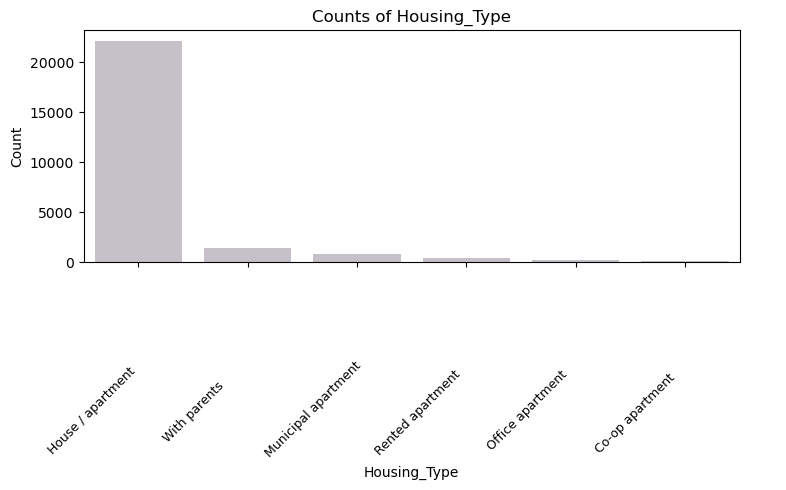

In [110]:
categorical_bar_plots(CreditCardApproval, 'Housing_Type', '#c7bfca', 45)

And overwhemling amount of our applicants live in a house or apartment, this might be beneficial for identifying outliers later on when it comes to approval status

Next let's get into one of our main numerical columns, applicant total income.

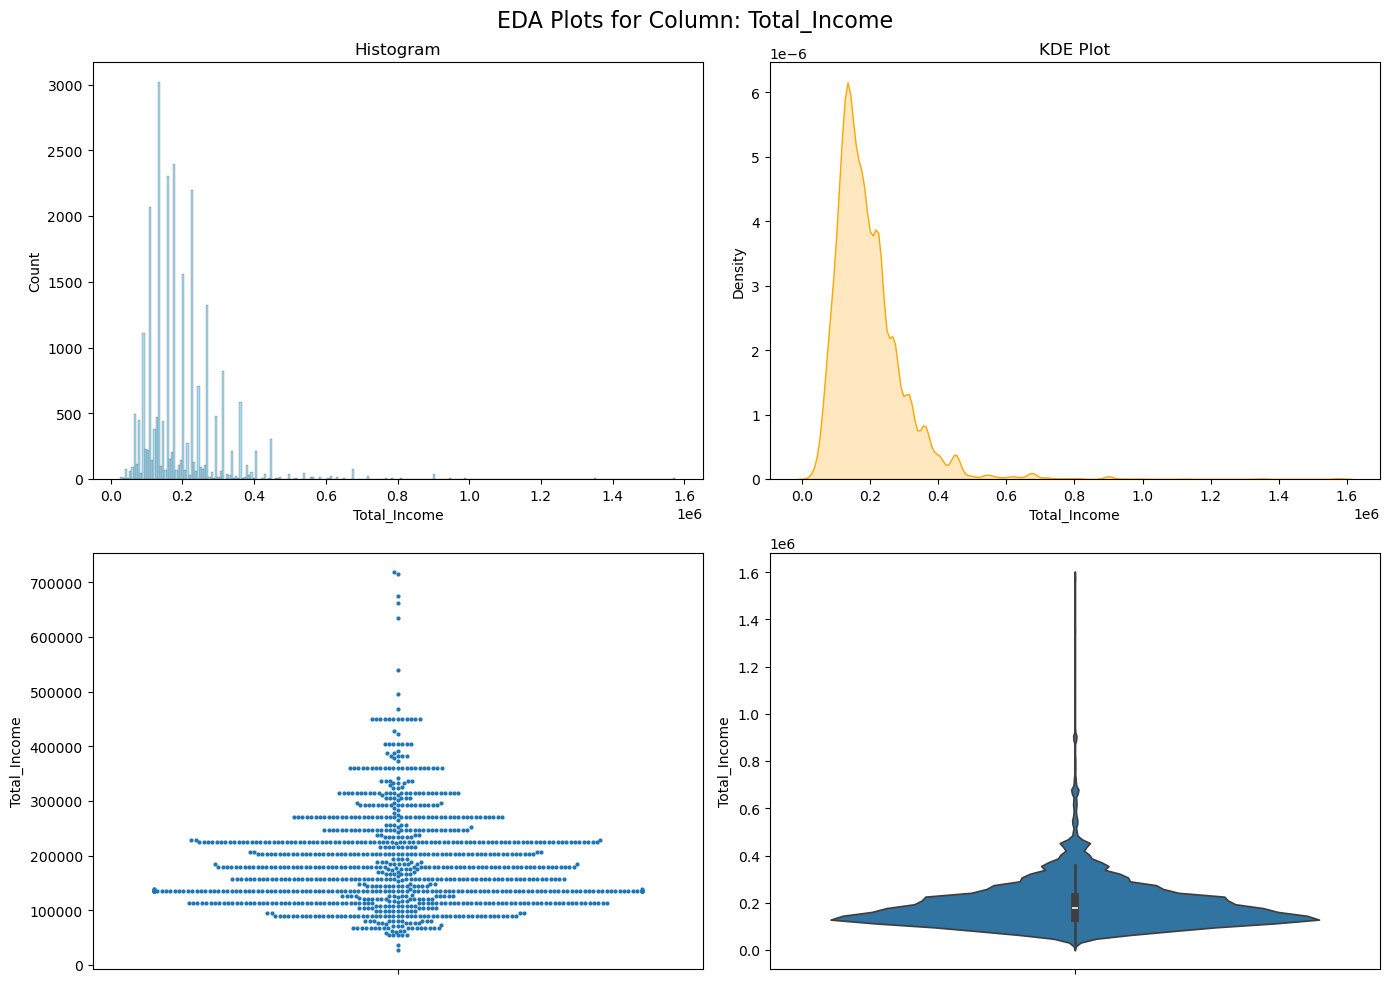

In [113]:
distribution_plots(CreditCardApproval, 'Total_Income')

Looking at our initial plots, there appears to be some clear right skew in applicants income with a number of outliers protruding to the right side of the graph. This is further emphasies by our other plots in this graph. This is not surprising to me however as this looks very similar to income related histograms I have seen in the real world at my job. generally, only a small percentage of individuals earn very high incomes, while the majority earn moderate incomes, creating a long tail to the right side of the histogram.

Let's look at the min-max value of our chosen histogram

In [115]:
get_hist_min_max(CreditCardApproval, 'Total_Income', 'auto')

Histogram minimum: 27000.0
Histogram maximum: 1575000.0


lets build a couple more hist plots with different bin sizes

<Axes: xlabel='Total_Income', ylabel='Count'>

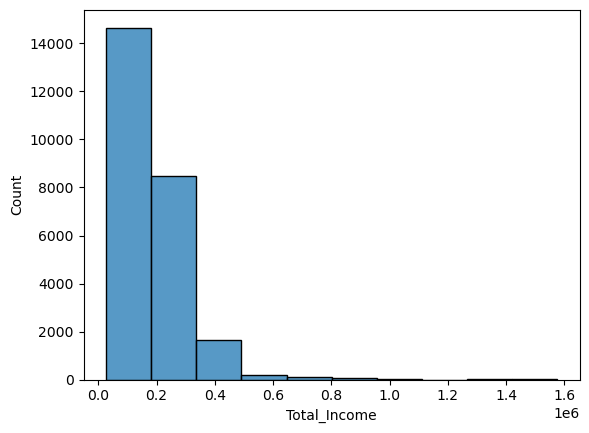

In [117]:
sns.histplot(CreditCardApproval['Total_Income'], bins=10)

<Axes: xlabel='Total_Income', ylabel='Count'>

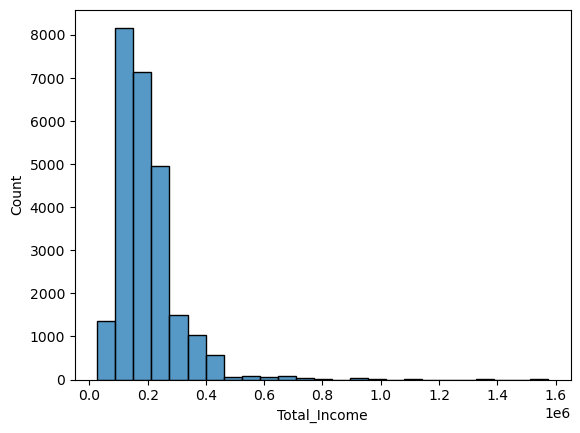

In [118]:
sns.histplot(CreditCardApproval['Total_Income'], bins=25)

<Axes: xlabel='Total_Income', ylabel='Count'>

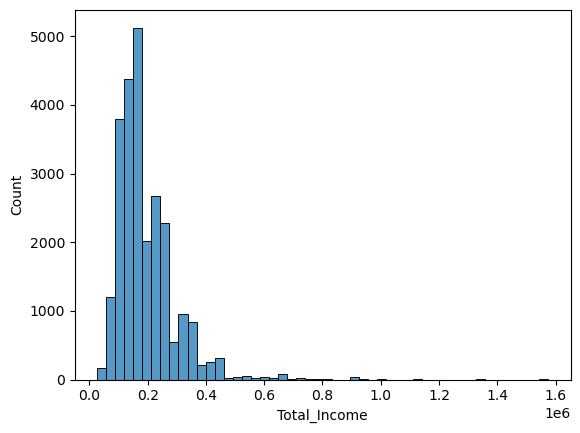

In [119]:
sns.histplot(CreditCardApproval['Total_Income'], bins=50)

When playing around with the bin size, increasing the bins appears to give the dataset a more "normal" looking dstribution. However due to some of the larger values in the dataset, there is a clear right skew at all times.

Let's also do a boxplot and some summary statistics

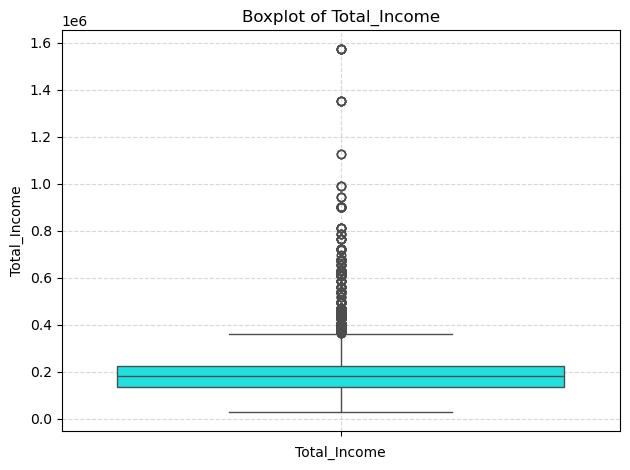

In [122]:
box_plot(CreditCardApproval, 'Total_Income')

In [123]:
q1 = CreditCardApproval['Total_Income'].quantile(0.25)
q3 = CreditCardApproval['Total_Income'].quantile(0.75)
iqr = q3 - q1
print(f"Boxplot Upper Bound: {q3 + 1.5 * iqr}")

Boxplot Upper Bound: 360000.0


In [124]:
col_summary_stastistics(CreditCardApproval, 'Total_Income')

Total_Income Mean: 194836.49856733525
Total_Income Median: 180000.0
Total_Income Mode: [135000]




Looking at the data above we can see that there are a lot out outliers in dataset. The average income in our dataset is about 195,000 which seems pretty high (we don't exactly know the currency). The upper for this column in 360,000 with many outliers existing above it. Interestingly enough, there are no outliers below the lower bound of our boxplot. This makes me wonder what type of credit card these folks are applying for. While I don't believe this should be an issue, we may want to consider transforming these values to fit a more normal distribution later down the road.  

Finally, let's compare this column against some others in our dataset that might be interesting via grouped histograms

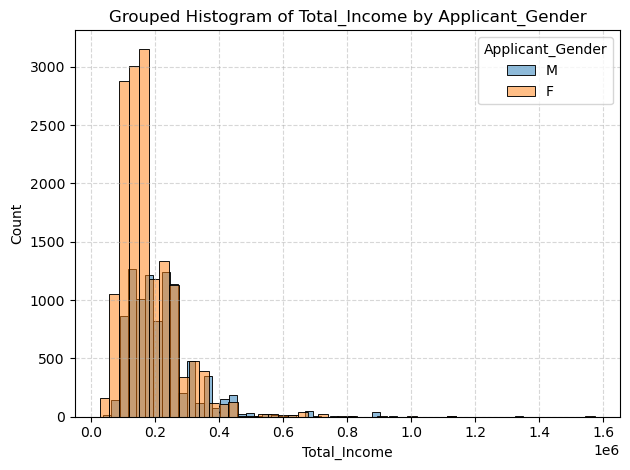

In [127]:
grouped_hist(CreditCardApproval, 'Total_Income', 'Applicant_Gender', 50)

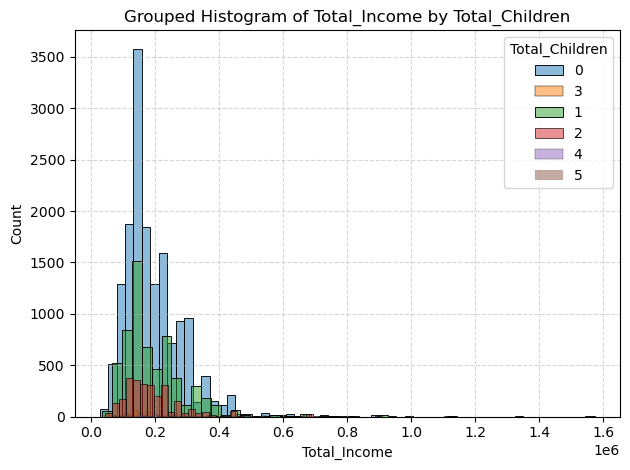

In [128]:
grouped_hist(CreditCardApproval, 'Total_Income', 'Total_Children', 50)

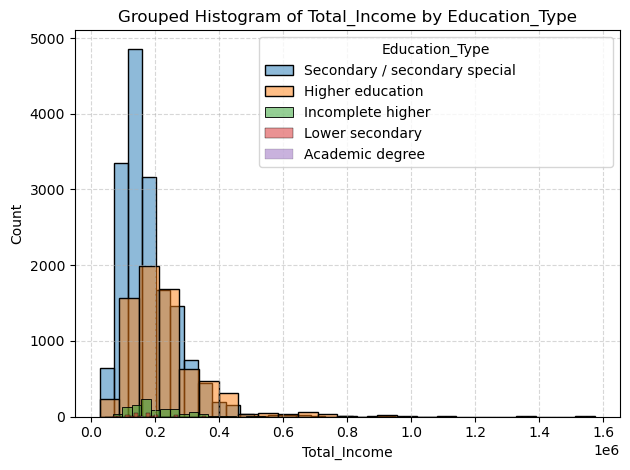

In [129]:
grouped_hist(CreditCardApproval, 'Total_Income', 'Education_Type', 25)

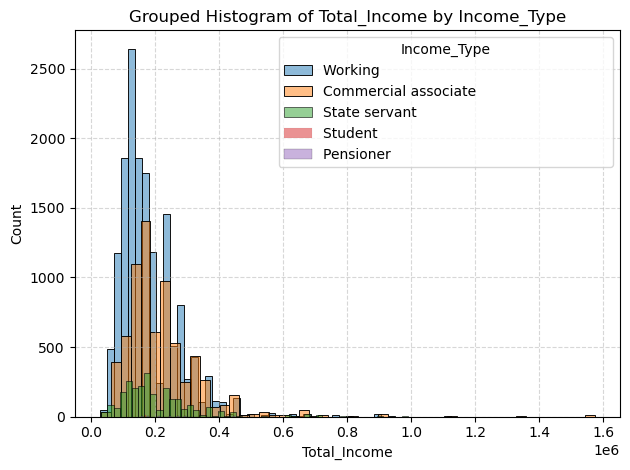

In [130]:
grouped_hist(CreditCardApproval, 'Total_Income', 'Income_Type', 50)

Next let's look at some features related to the ownership of technology

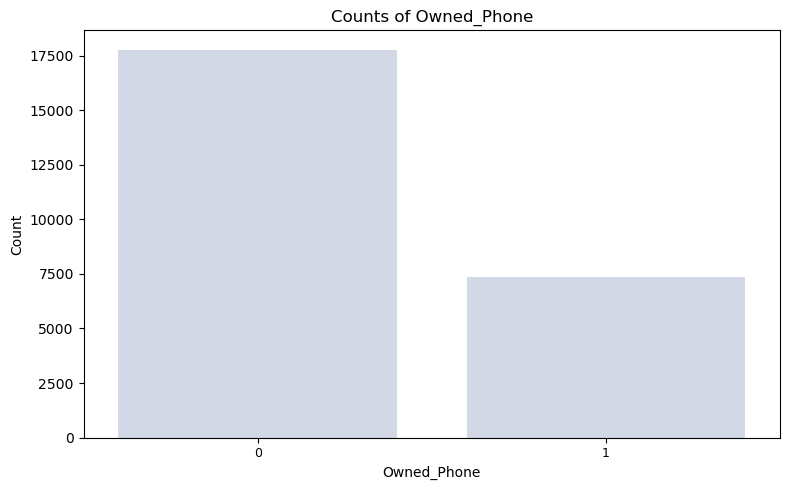

In [132]:
categorical_bar_plots(CreditCardApproval, 'Owned_Phone', '#cfd7e9', 0)

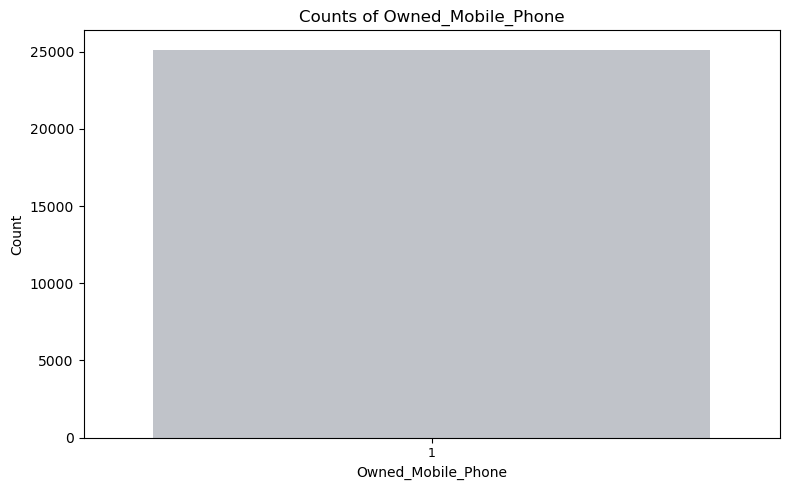

In [133]:
categorical_bar_plots(CreditCardApproval, 'Owned_Mobile_Phone', '#bfc2ca', 0)

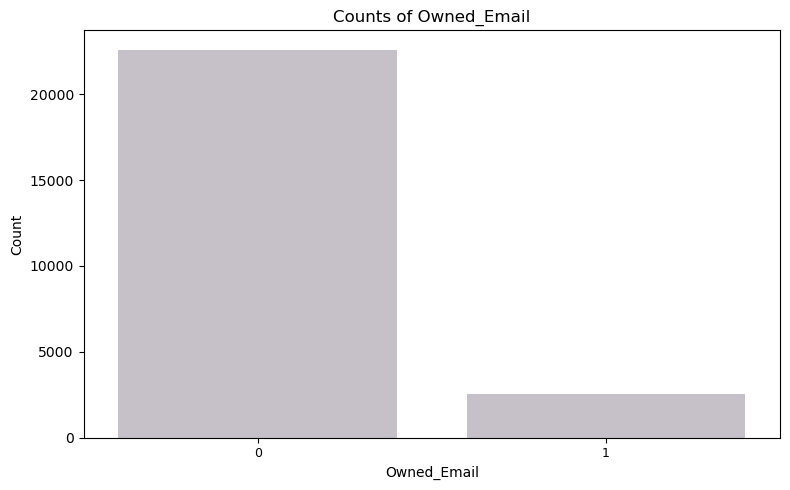

In [134]:
categorical_bar_plots(CreditCardApproval, 'Owned_Email', '#c7bfca', 0)

of these features, I am somewhat surprised. Every applicant has a mobile phone, while only a small fraction of the population has an email address. As for normal phones, I am not too surprised as landlines are not used as frequently as they once were. We might want to revist these columns later for some fun visualizations.

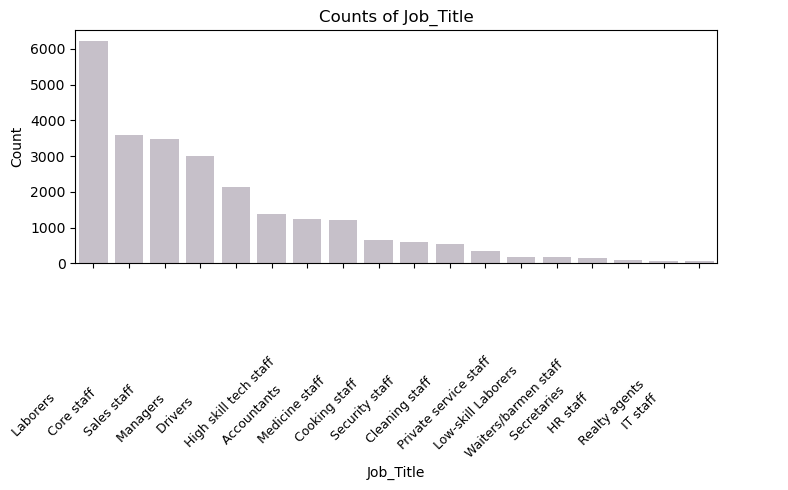

In [136]:
categorical_bar_plots(CreditCardApproval, 'Job_Title', '#c7bfca', 45)

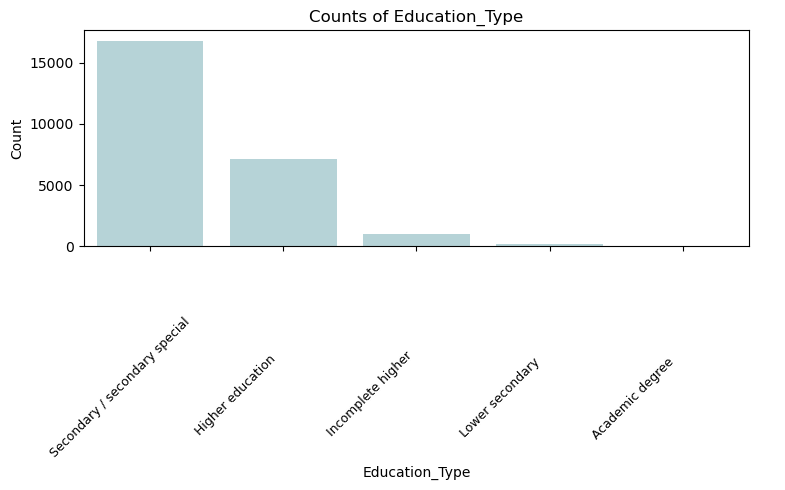

In [137]:
categorical_bar_plots(CreditCardApproval, 'Education_Type', '#b0d7dc', 45)

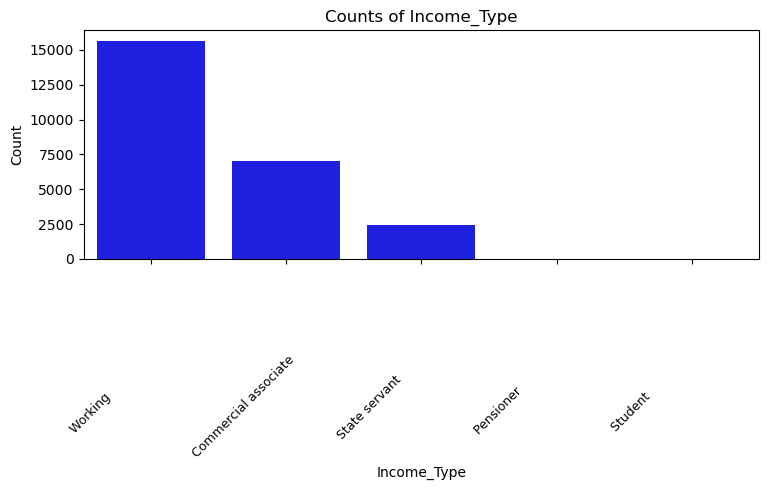

In [138]:
categorical_bar_plots(CreditCardApproval, 'Income_Type', 'blue', 45)

Looking at this distribution, it appears that the majority of our population falls int secondary and higher education (equivalent of high school and undergraduate eduction levels). This is not too surprising and tracks with similar metrics in the US. I think it is interesting that that majority of folks have a secondary education while the highest category of worker is also laborers. This might be linked and seems to track with the income type as well.

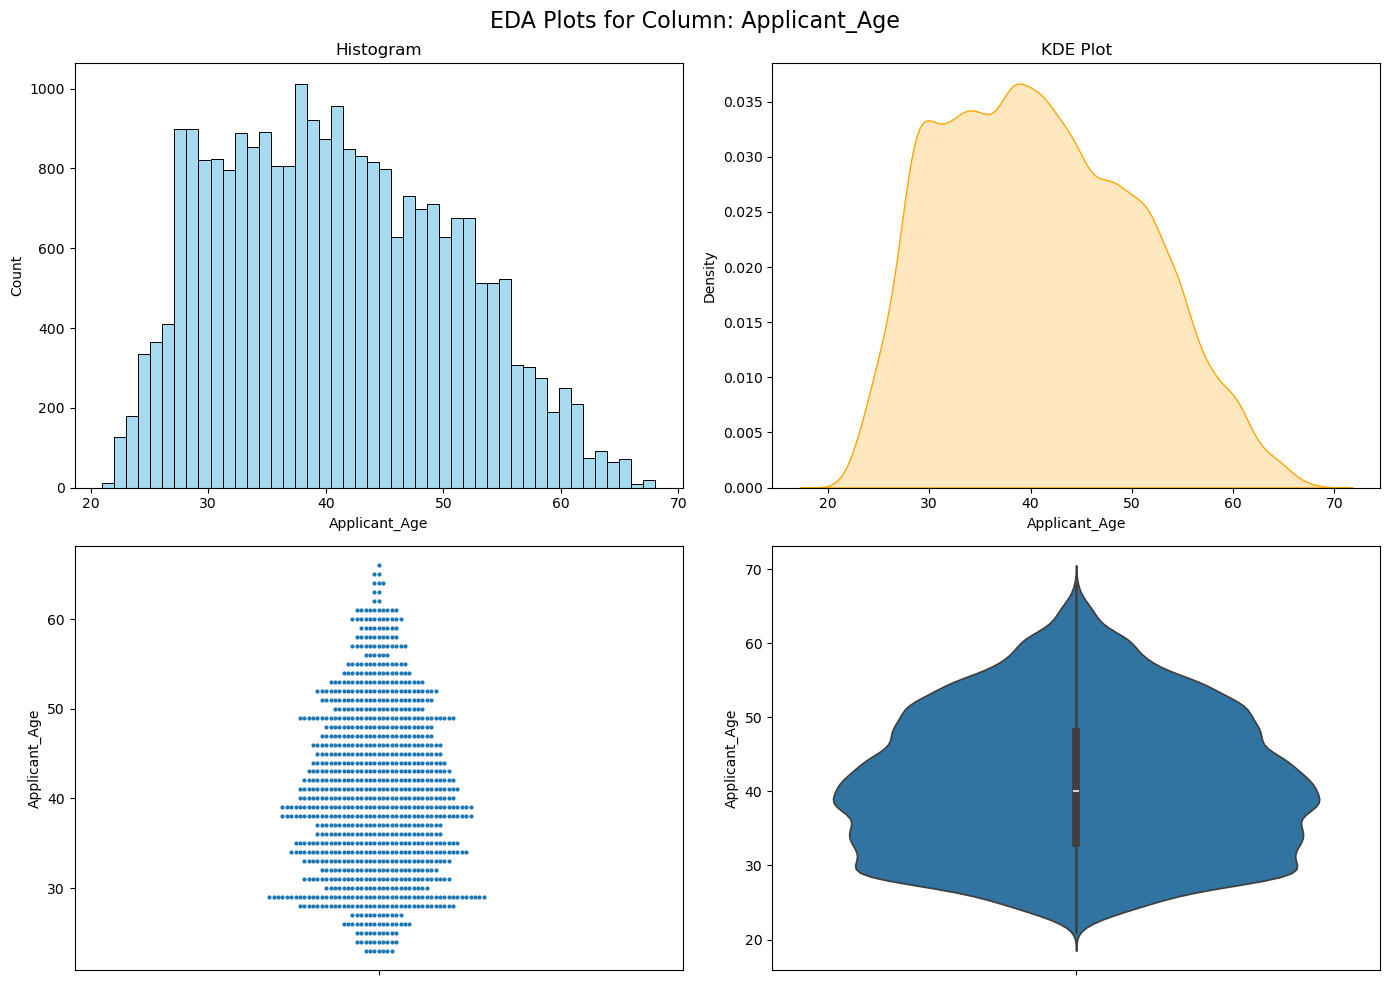

In [140]:
distribution_plots(CreditCardApproval, 'Applicant_Age')

In [141]:
get_hist_min_max(CreditCardApproval, 'Applicant_Age', 'auto')

Histogram minimum: 21.0
Histogram maximum: 68.0


<Axes: xlabel='Applicant_Age', ylabel='Count'>

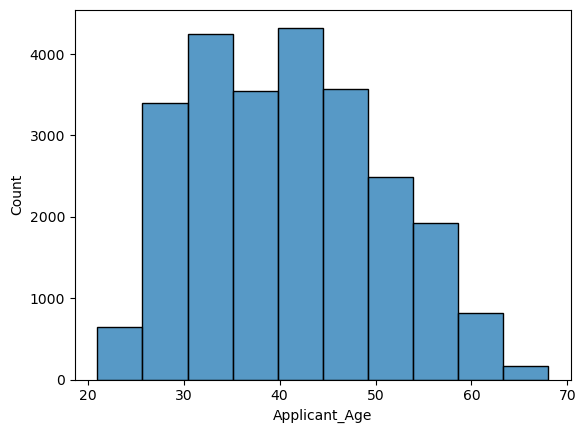

In [142]:
sns.histplot(CreditCardApproval['Applicant_Age'], bins=10)

<Axes: xlabel='Applicant_Age', ylabel='Count'>

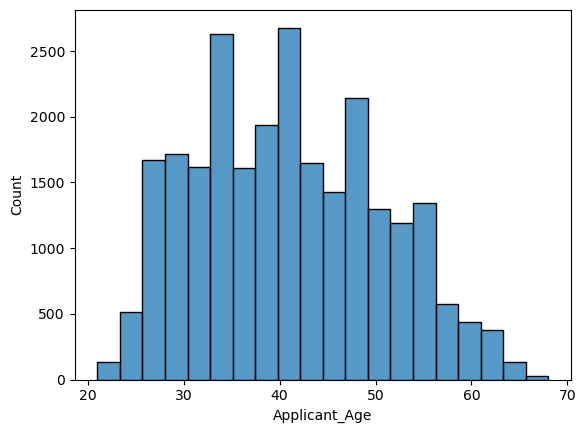

In [143]:
sns.histplot(CreditCardApproval['Applicant_Age'], bins=20)

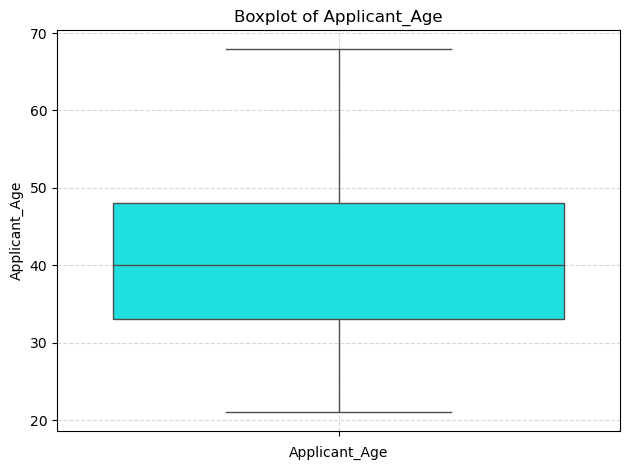

In [144]:
box_plot(CreditCardApproval, 'Applicant_Age')

In [145]:
col_summary_stastistics(CreditCardApproval, 'Applicant_Age')

Applicant_Age Mean: 40.995503024514484
Applicant_Age Median: 40.0
Applicant_Age Mode: [38]




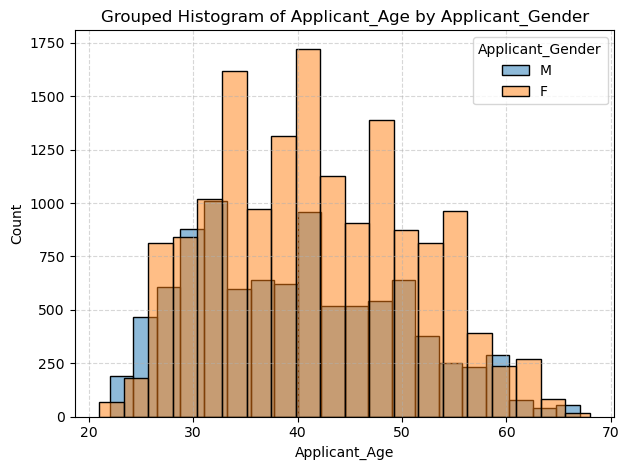

In [146]:
grouped_hist(CreditCardApproval, 'Applicant_Age', 'Applicant_Gender', 20)

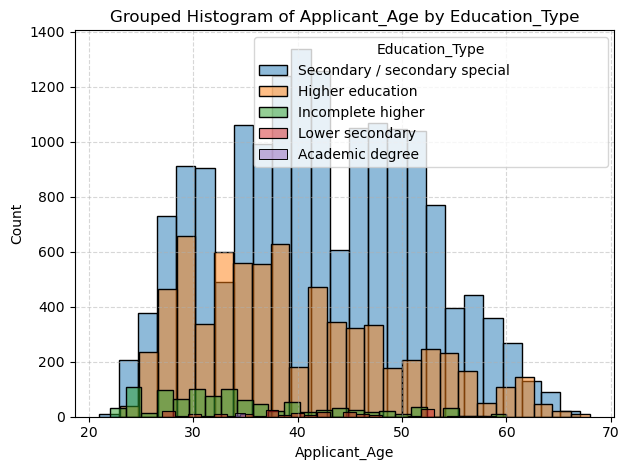

In [147]:
grouped_hist(CreditCardApproval, 'Applicant_Age', 'Education_Type', 25)

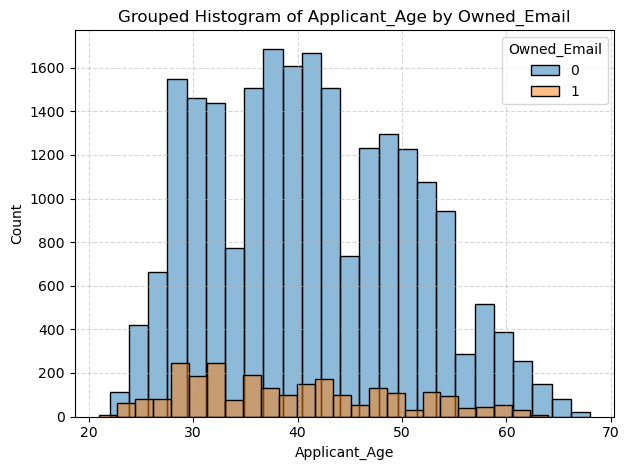

In [148]:
grouped_hist(CreditCardApproval, 'Applicant_Age', 'Owned_Email', 25)

C:\Users\jdblu\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


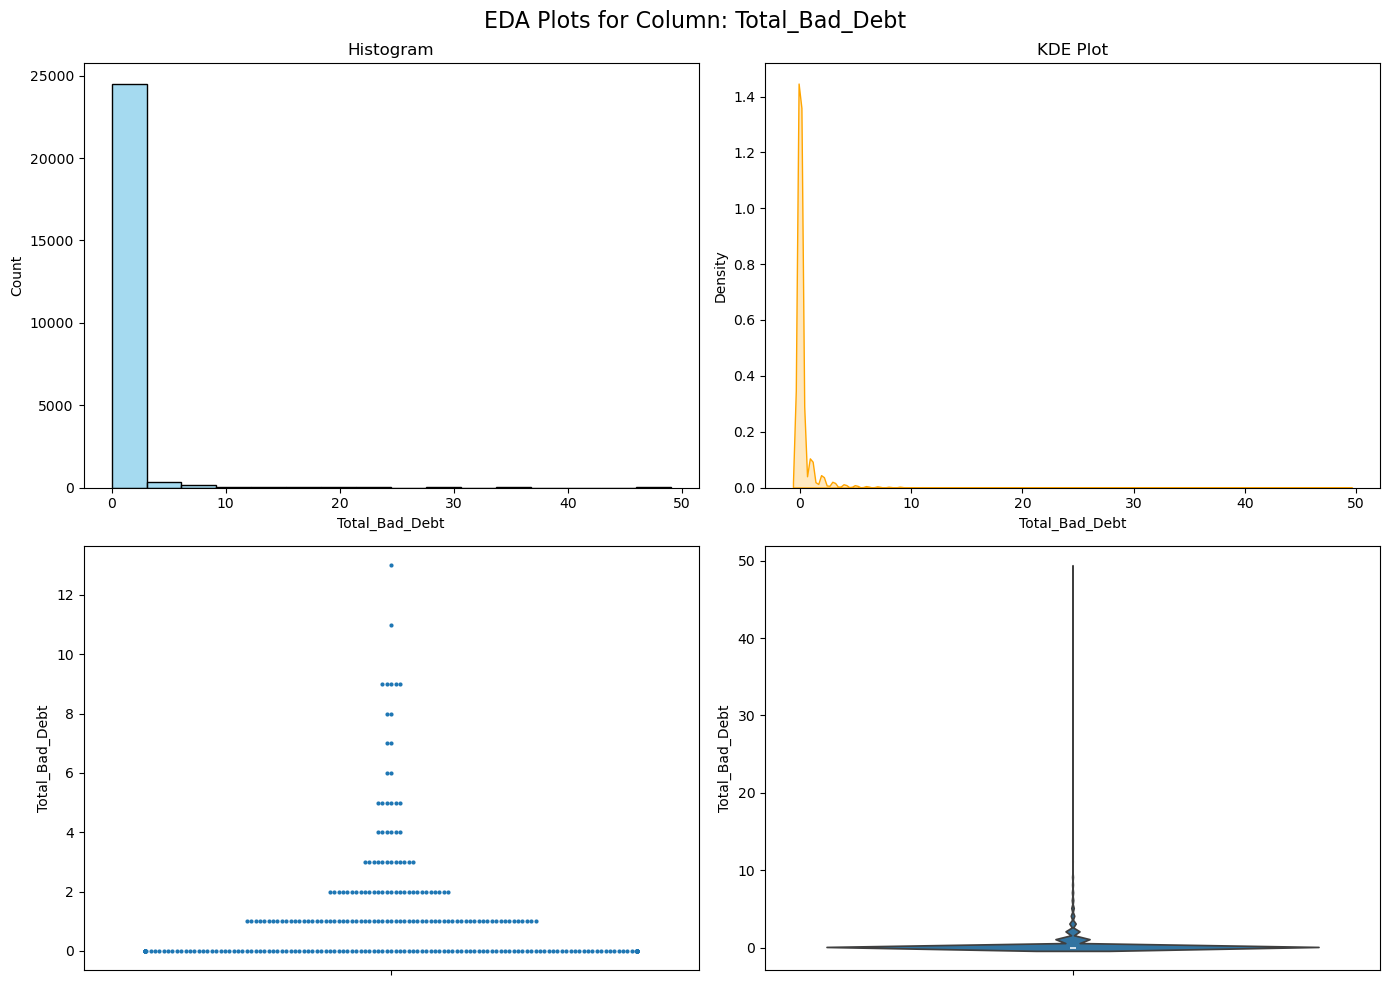

In [149]:
distribution_plots(CreditCardApproval, 'Total_Bad_Debt')

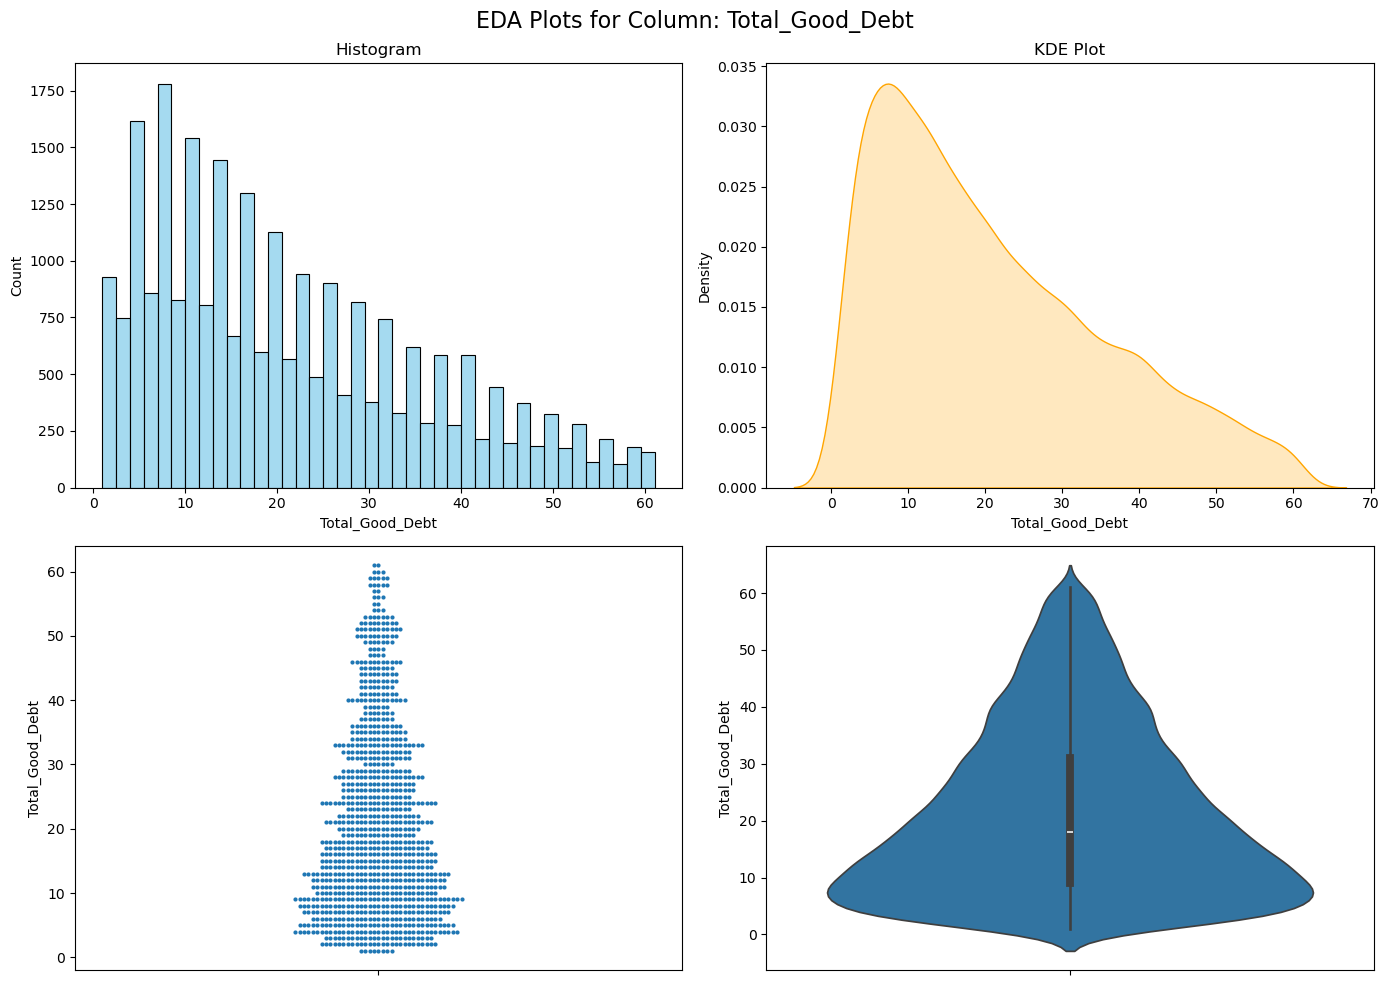

In [150]:
distribution_plots(CreditCardApproval, 'Total_Good_Debt')

### Conclusion - Credit Card Approval Dataset

Just like our previous entry, the credit card approval dataset appears to be clean and high quality. Looking across our features, there was nothing that stuck out to me as being an issue that would potentially invalidate the dataset. Similar to the credit card dataset, there are a few features where certain large values (total income and bad debt) heavily alter our visualizations and potentially bring up our average. While they might cause some difficulties later on, they are real values that can occur in nature and therefore we should not remove them from our dataset. If needed we can do transformation to normalize those values during modeling. Overall, however, this is another great dataset.

## Loan Default Data

Getting into our last dataset, we have our Loan Default Prediction datset. This one has quite a few columns so let's jump right in. As usual, we'll create a dataset solely for our default population.

In [155]:
LoanDefaultPrediction.iloc[:, :30].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly_Income        87500 non-null  float64
 6   Home_Status          87500 non-null  object 
 7   Unpaid_2_years       87500 non-null  int64  
 8   Already_Defaulted    87500 non-null  int64  
 9   Designation          87500 non-null  object 
 10  Debt_to_Income       87500 non-null  float64
 11  Postal_Code          87500 non-null  float64
 12  Lend_Amount          87500 non-null  float64
 13  Deprecatory_Records  87500 non-null  int64  
 14  Interest_Charged     87500 non-null  float64
 15  Usage_Rate           87500 non-null 

In [156]:
LoanDefaultPrediction = LoanDefaultPrediction.iloc[:, :30]
Default_df = LoanDefaultPrediction[LoanDefaultPrediction['Default'] == 1]

In [157]:
LoanDefaultPrediction.sample(n=5)

ID  Asst_Reg GGGrade Experience       Validation  Yearly_Income  \
45592  111788   1065674      II     >10yrs  Source Verified   193600.00000   
14649   73101   3176714       I       <1yr        Not Vfied    79200.00000   
42847   53380    874775     III     >10yrs            Vfied   134859.62978   
51451   68074   6094934       I       5yrs  Source Verified   167200.00000   
353    104953   7217696     III       2yrs        Not Vfied    96800.00000   

      Home_Status  Unpaid_2_years  Already_Defaulted  \
45592        RENT               0                  0   
14649    MORTGAGE               0                  0   
42847    MORTGAGE               0                  0   
51451        RENT               0                  0   
353          RENT               0                  0   

                          Designation  ...  File_Status  State  Account_Open  \
45592         Director, Critical Care  ...   fully paid     GA            14   
14649                Machine/Computer  ...        whole     AL             8   
42847             International Paper  ...   fully paid     TN             9   
51451          Associate Veterinarian  ...        whole     MI            20   
353    Content Development Specialist  ...   fully paid     NJ            18   

       Total_Unpaid_CL  Duration  Unpaid_Amount               Reason  \
45592          55444.0   3 years       34892.55  debt  consolidation   
14649          44322.0   3 years       24711.21  debt  consolidation   
42847          82834.0   3 years       52907.40  debt  consolidation   
51451         105410.0   3 years       50744.25         credit  card   
353            99102.0   5 years       17606.16         credit  card   

       Claim_Type  Due_Fee  Default  
45592           I      0.0        1  
14649           I      0.0        1  
42847           I      0.0        0  
51451           I      0.0        0  
353             I      0.0        0  

[5 rows x 30 columns]

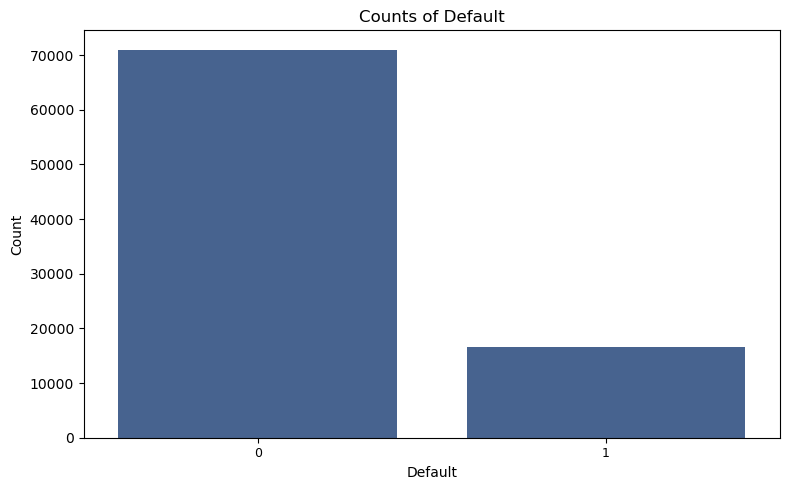

In [158]:
categorical_bar_plots(LoanDefaultPrediction, 'Default', '#3b619b', 0)

Looking at our target variable it seems like only a small portion of our customers actually defaulted. While this may seem small, it is actually about 1/8th of our total population... 1 out of every 8 customers defaulting... That's quite a bit. 

<Axes: xlabel='Already_Defaulted', ylabel='Count'>

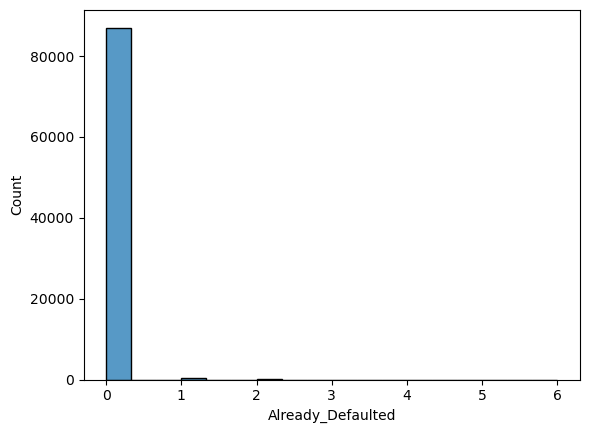

In [160]:
sns.histplot(LoanDefaultPrediction['Already_Defaulted'])

<Axes: xlabel='Already_Defaulted', ylabel='Count'>

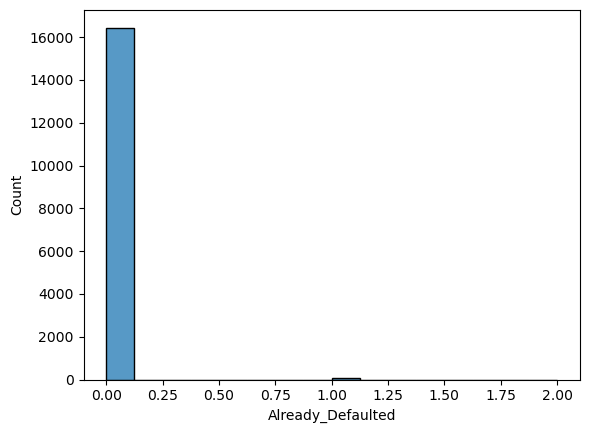

In [161]:
sns.histplot(Default_df['Already_Defaulted'])

Interestingly enough, the majority of customers that defaulted, had never defaulted prior... It can happen to all of us

Let's now look at some categories related to the types of loans our customers took out.

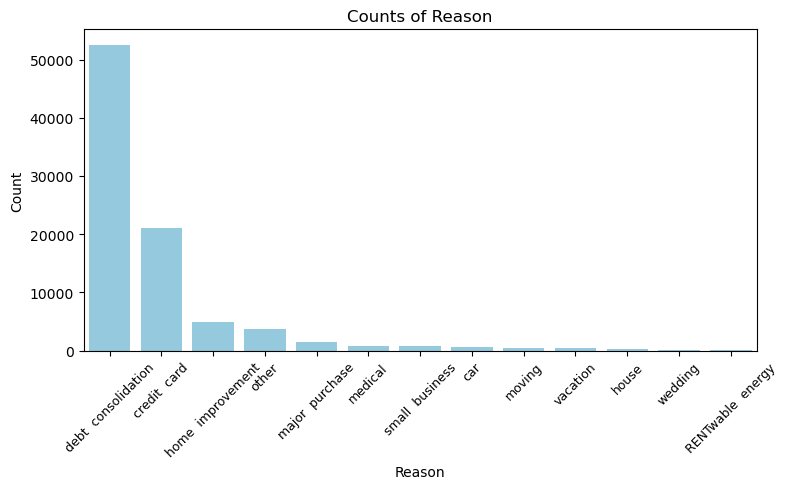

In [164]:
categorical_bar_plots(LoanDefaultPrediction, 'Reason', 'skyblue', 45)

It appears that most of our population is taking out loans to consolidate previous accrued debt. This is somewhat risky behavior as they are taking out a loan to pay off already borred money. 

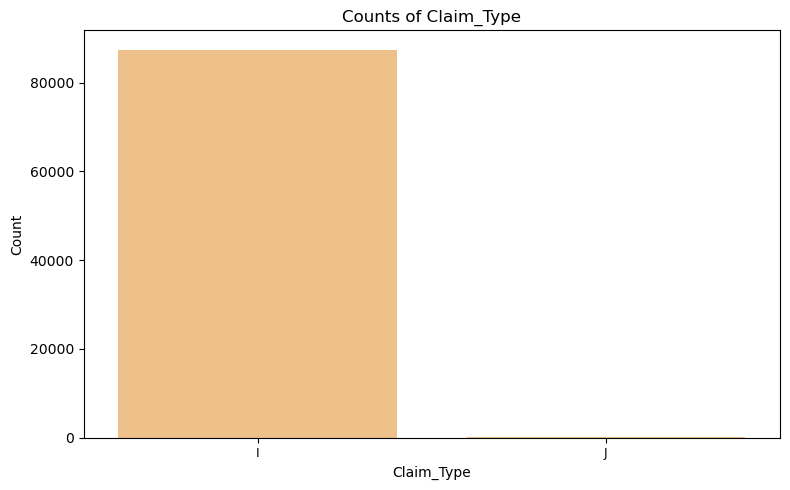

In [166]:
categorical_bar_plots(LoanDefaultPrediction, 'Claim_Type', '#ffc279', 0)

I = Individual J=Joint

Almost our entire population is taking loans out by themselves

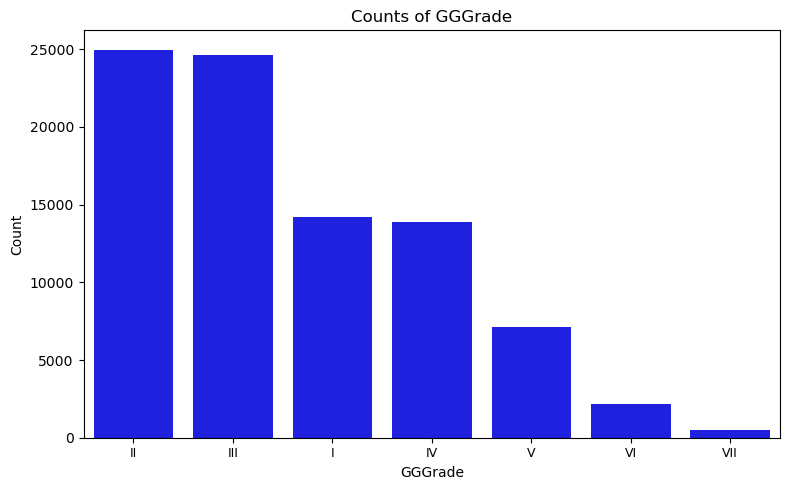

In [168]:
categorical_bar_plots(LoanDefaultPrediction, 'GGGrade', 'blue', 0)

<Axes: xlabel='Sub_GGGrade', ylabel='Count'>

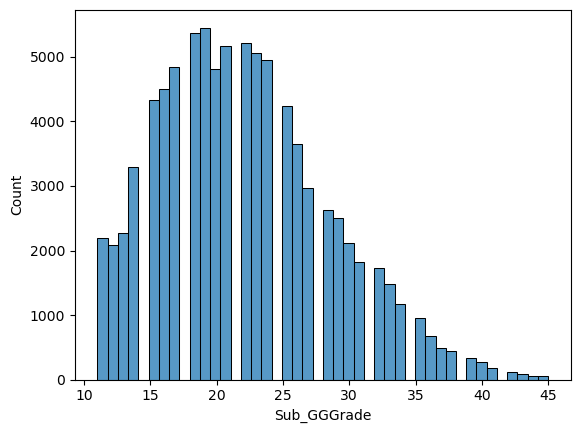

In [169]:
sns.histplot(LoanDefaultPrediction['Sub_GGGrade'], bins=44)

Doing some reseach online, These 'gg' columns refers to grades that assigned to customers based on applicant characteristics. These grades will usually determine things like grant amounts, interest rate, and so forth. 

For instance, group II might correspond to low income, while grade II might be moderate income and so forth. After looking through kaggle, I was unable to find the exact meaning of each group for these applicants specifically. For now we will visualize them.

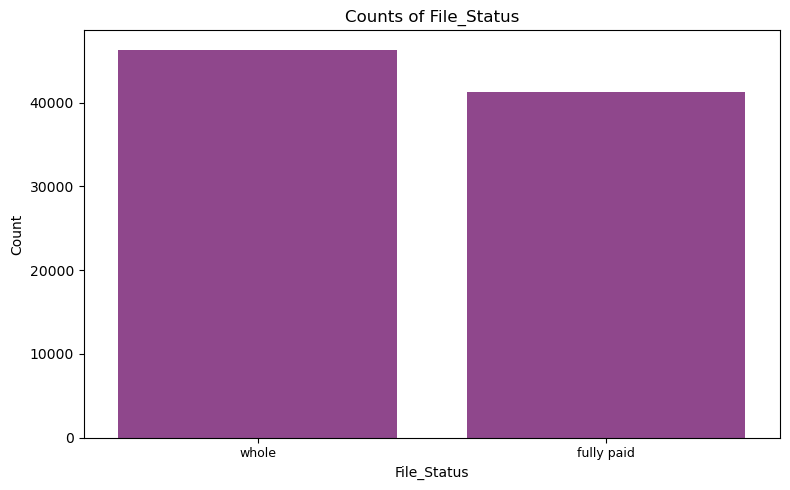

In [171]:
categorical_bar_plots(LoanDefaultPrediction, 'File_Status', '#9b3b97', 0)

As of now it there doesn't appear to be anything too insightful here.

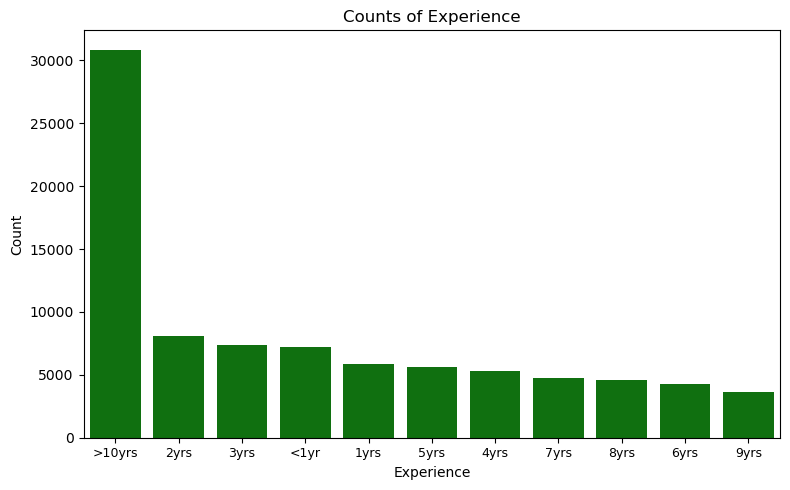

In [173]:
categorical_bar_plots(LoanDefaultPrediction, 'Experience', 'green', 0)

Most of our customers are quite experienced in the work, force with over 10+ years of experience. All other categories appear to be somewhat equal.

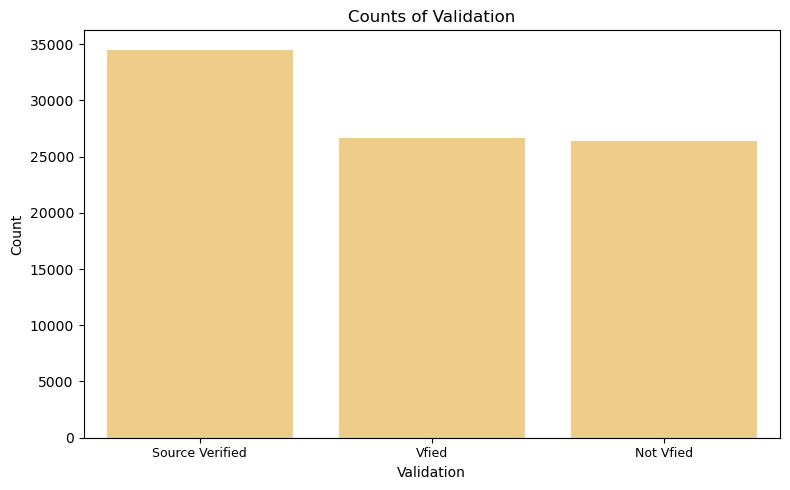

In [175]:
categorical_bar_plots(LoanDefaultPrediction, 'Validation', '#ffd279', 0)

It seems like a mix across all 3 of our categories... I am curious what the difference between the two verified categories is as Kaggle does not specify.

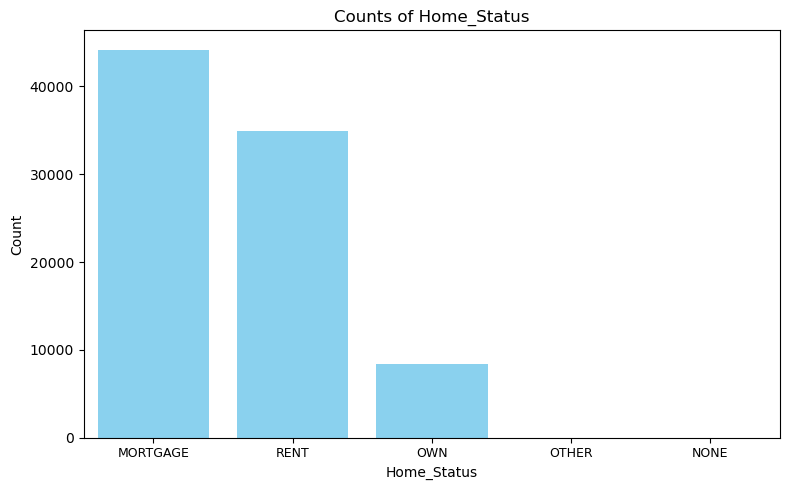

In [177]:
categorical_bar_plots(LoanDefaultPrediction, 'Home_Status', '#79d8ff', 0)

It appests that most of our customers are renting, or live in a residence but are on a mortage. The other two categories appear to be near non-existent.

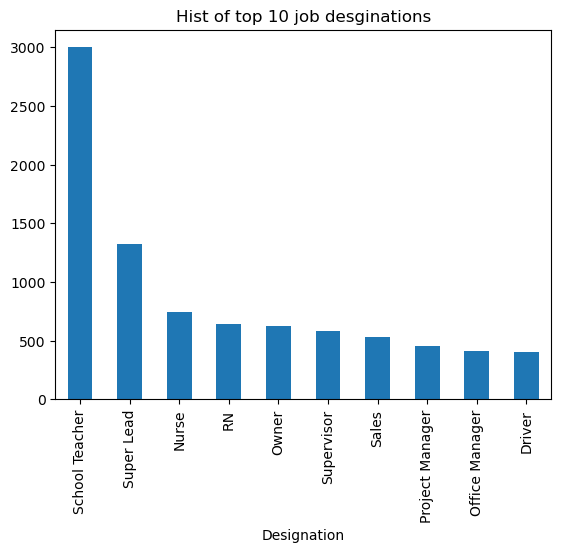

In [179]:
top_10_jobs = get_top_n_categories(LoanDefaultPrediction, 'Designation', 10)
top_10_jobs.plot(kind='bar')
plt.title('Hist of top 10 job desginations')
plt.show()

Interestingly enough, our most common job category is school teacher and by quite a bit as well. Is it possible that the loan providers are tied to the school via a credit union???

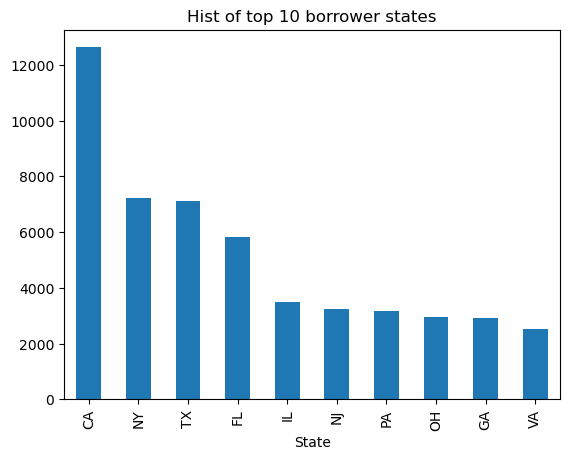

In [181]:
top_10_jobs = get_top_n_categories(LoanDefaultPrediction, 'State', 10)
top_10_jobs.plot(kind='bar')
plt.title('Hist of top 10 borrower states')
plt.show()

Similar to previous state graphs, this one is mostly comprised of larger states... Nothin too surprising here

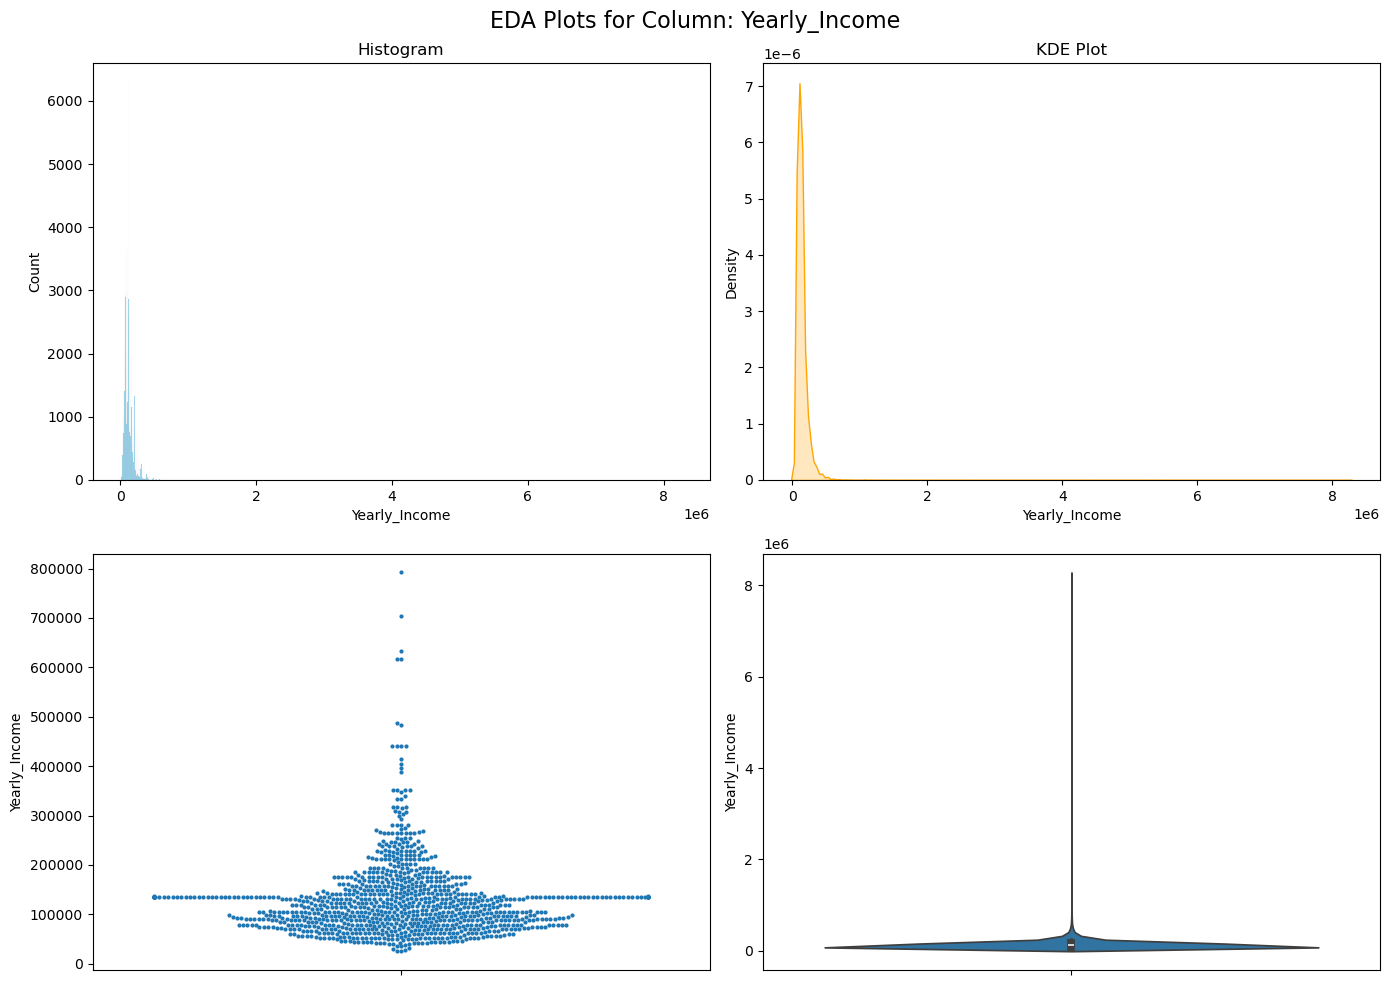

In [183]:
distribution_plots(LoanDefaultPrediction, 'Yearly_Income')

In [184]:
get_hist_min_max(LoanDefaultPrediction, 'Yearly_Income', 'auto')

Histogram minimum: 8800.0
Histogram maximum: 8264030.72


<Axes: xlabel='Yearly_Income', ylabel='Count'>

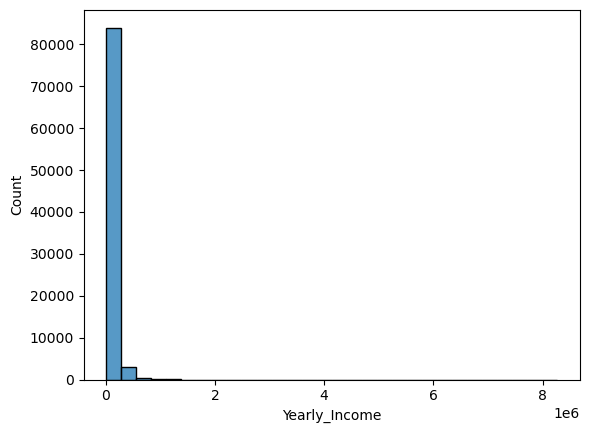

In [185]:
sns.histplot(LoanDefaultPrediction['Yearly_Income'], bins=30)

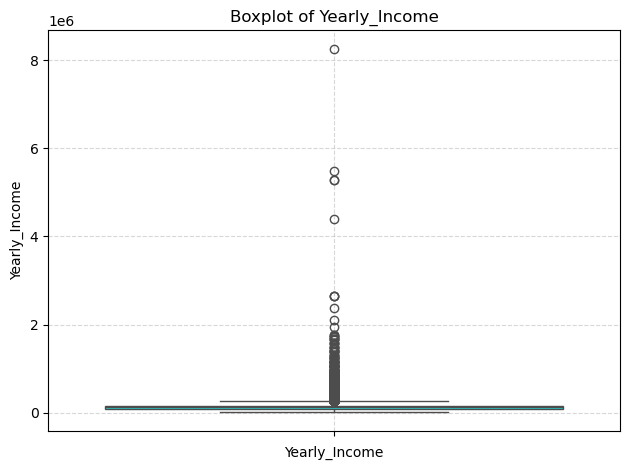

In [186]:
box_plot(LoanDefaultPrediction, 'Yearly_Income')

In [187]:
q1 = LoanDefaultPrediction['Yearly_Income'].quantile(0.25)
q3 = LoanDefaultPrediction['Yearly_Income'].quantile(0.75)
iqr = q3 - q1
print(f"Boxplot Upper Bound: {q3 + 1.5 * iqr}")

Boxplot Upper Bound: 266640.0


In [188]:
col_summary_stastistics(LoanDefaultPrediction, 'Yearly_Income')

Yearly_Income Mean: 134859.62977978395
Yearly_Income Median: 121440.0
Yearly_Income Mode: [134859.62977978395]




Looking at the above visualizations, this is similar to other amount/income based columns we have analyzed previously in this assingment. This graphs are being shaped like this because the majority of our applicants have incomes near or around the mean, while a few outliers (extemely high earners) exist way out in the right tail, causing extreme skew... If we remove theres outliers lets see how our data looks. 

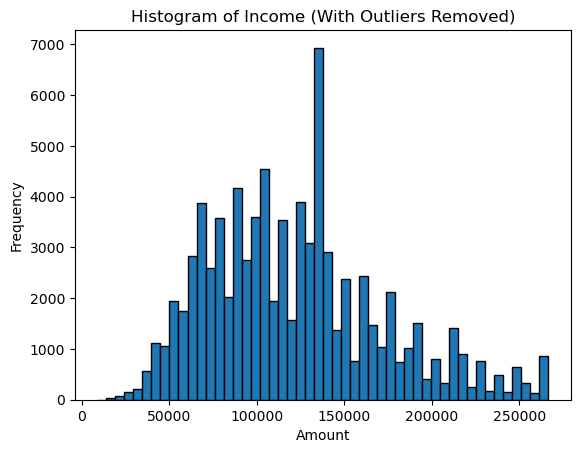

In [190]:
LoanDefaultPrediction[LoanDefaultPrediction['Yearly_Income'] < 266640]['Yearly_Income'].plot(kind='hist', bins=50, edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Income (With Outliers Removed)')
plt.show()

This is a much better and appears to be somewhat in line with a normal distribution (majority of values seem to be grouped around 60-100K). Interestingly enough there is a large spike around 130K, which is line with our mean and mode values.

Next lets build some grouped histograms to see how income compares across some of our categorical variables.

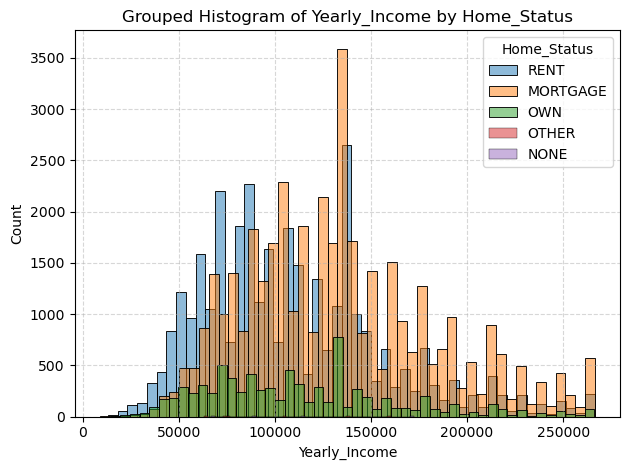

In [192]:
grouped_hist(LoanDefaultPrediction[LoanDefaultPrediction['Yearly_Income'] < 266640], 'Yearly_Income', 'Home_Status', 50)

Interstingly enough it seems like home owned status is pretty evenly spready across income range. Renting is generally associated with lower incomes while mortgages are more common as incoming increases. This seems to track with real-world metrics.

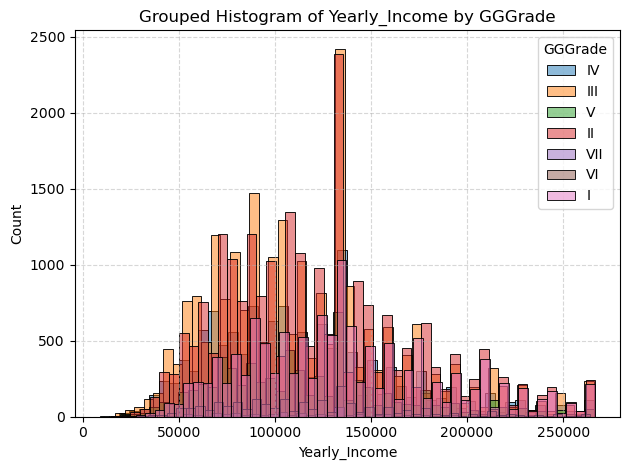

In [194]:
grouped_hist(LoanDefaultPrediction[LoanDefaultPrediction['Yearly_Income'] < 266640], 'Yearly_Income', 'GGGrade', 50)

Looking back at our GG grades column, It seems like there is no clear indicator of grades based on income level. As we conjectured earlier, these grades are most likely a combination of multiple columns including income, age, previous debts, etc. As such, it may be a little hard to visualize.

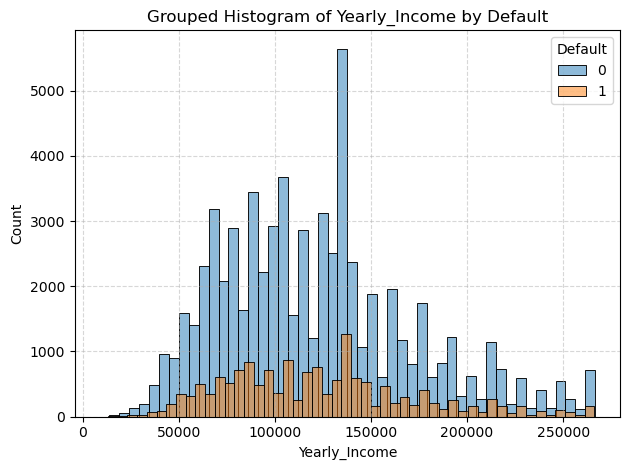

In [196]:
grouped_hist(LoanDefaultPrediction[LoanDefaultPrediction['Yearly_Income'] < 266640], 'Yearly_Income', 'Default', 50)

Finally, looking at our target variable it is pretty interesting in that defaulting seems to follow a very similar distribution as our income ranges. This suggests that income may not be as important of a feature as we might think...

For our next portion we are going to do some large scale analysis of a number of our other numeric columns. As this might take a long period of time to do manually, lets take a page from OMDS602 and leverage some automation via our helper functions to do the heavy lifting.


=== Analyzing: Debt_to_Income ===


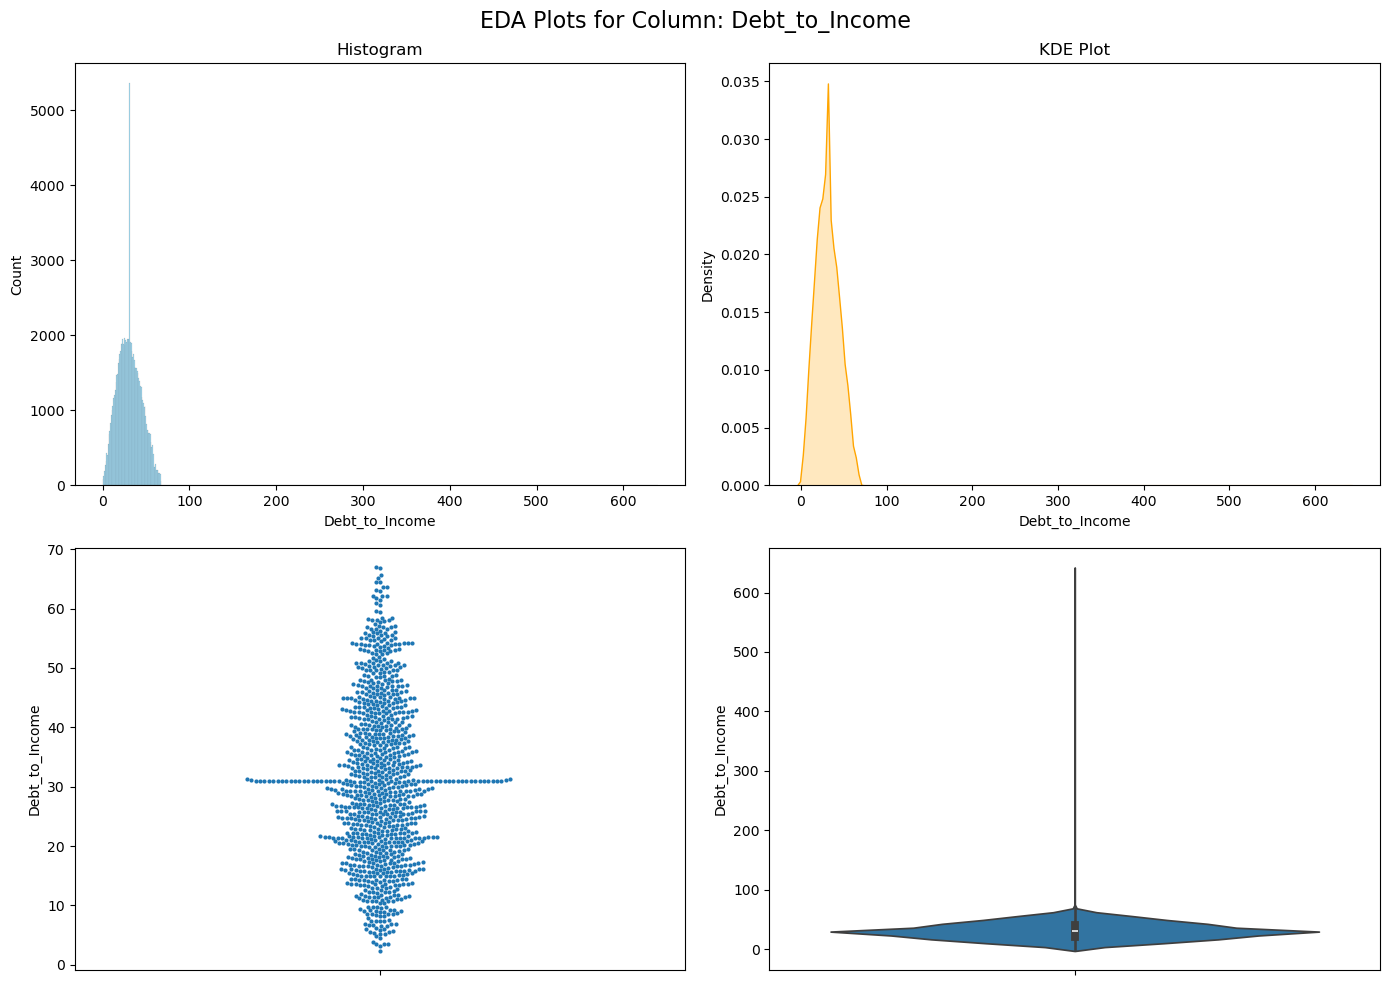

Histogram minimum: 0.0
Histogram maximum: 639.2904


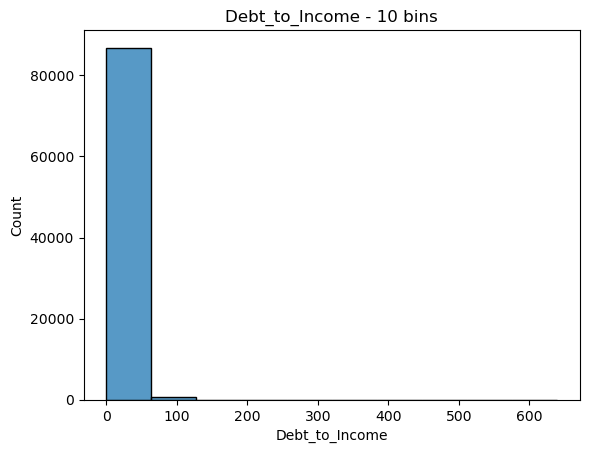

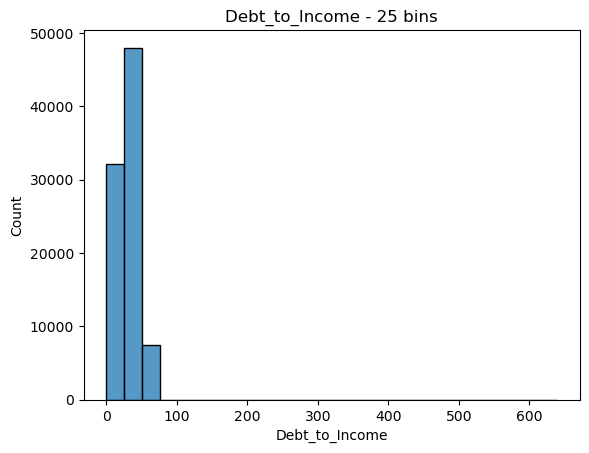

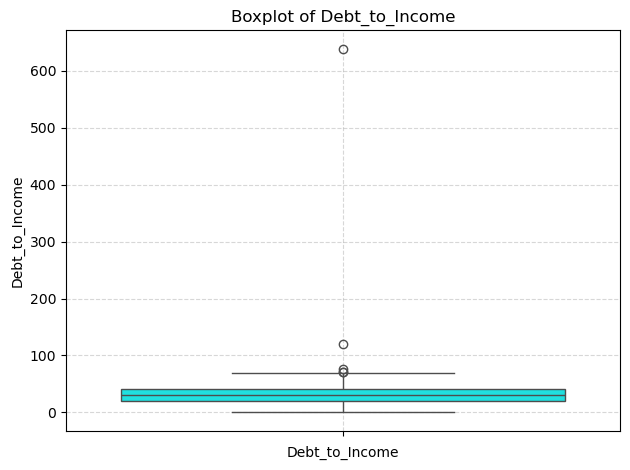

Debt_to_Income Mean: 30.94266038494959
Debt_to_Income Median: 30.912
Debt_to_Income Mode: [30.94266038494959]




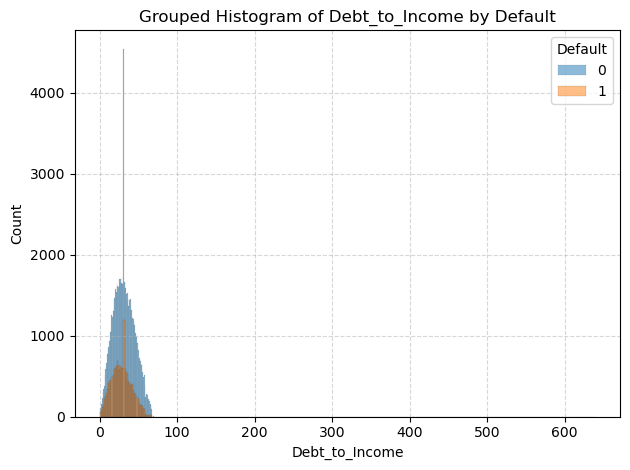


=== Analyzing: Lend_Amount ===


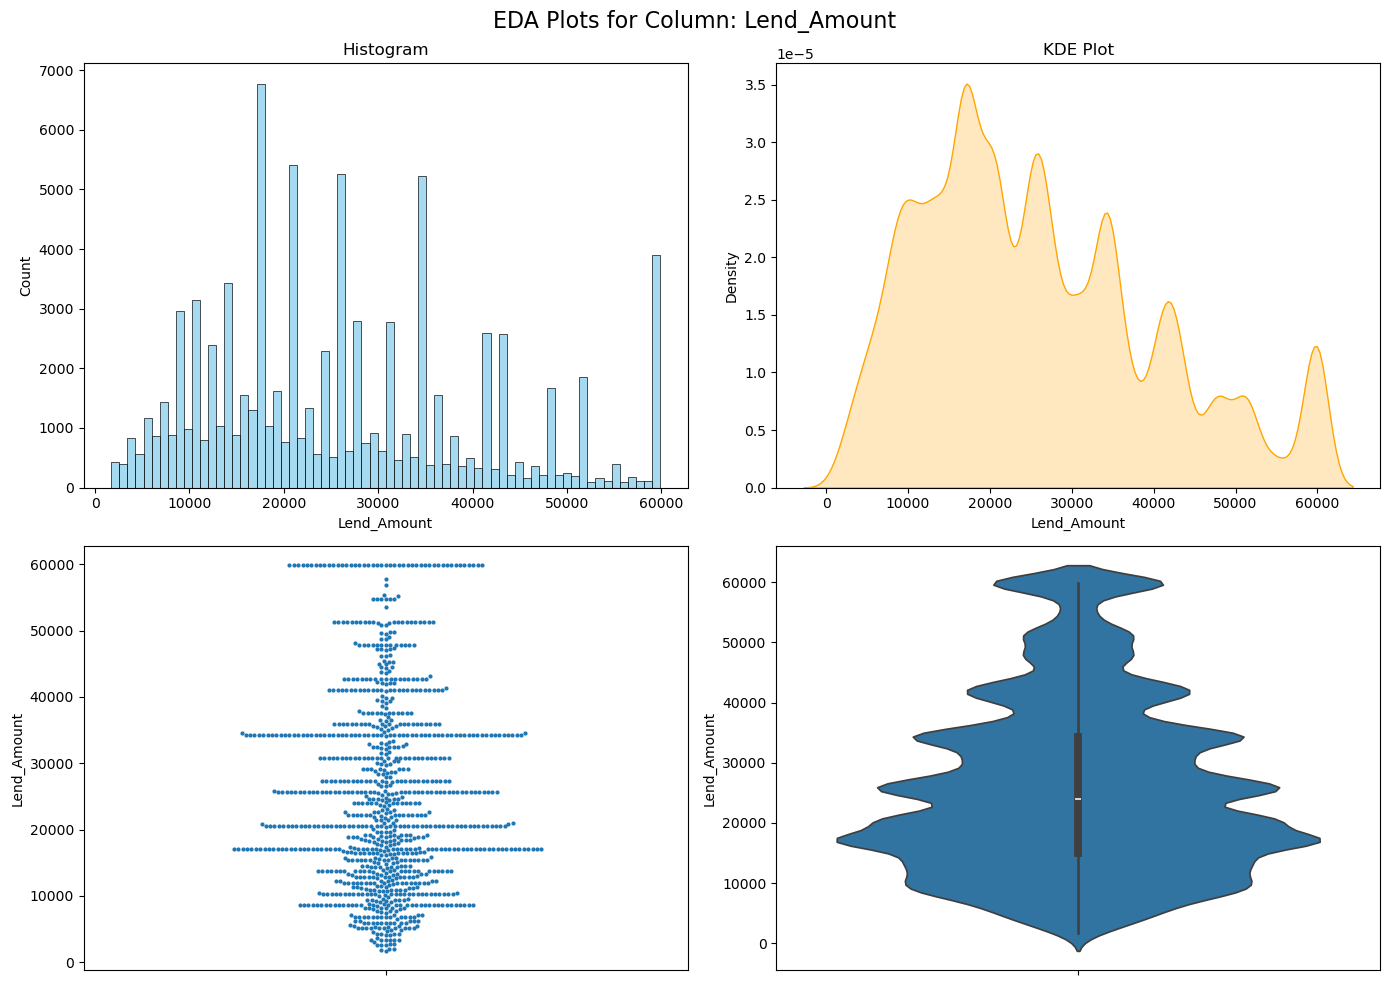

Histogram minimum: 1710.0
Histogram maximum: 59850.0


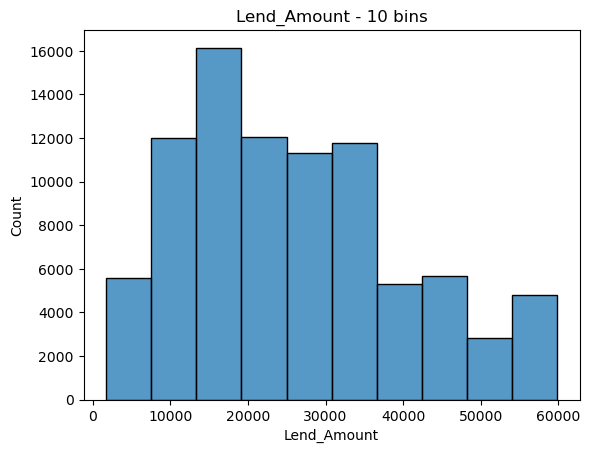

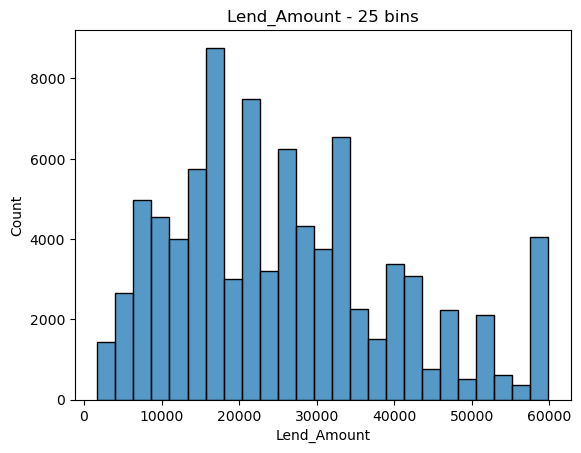

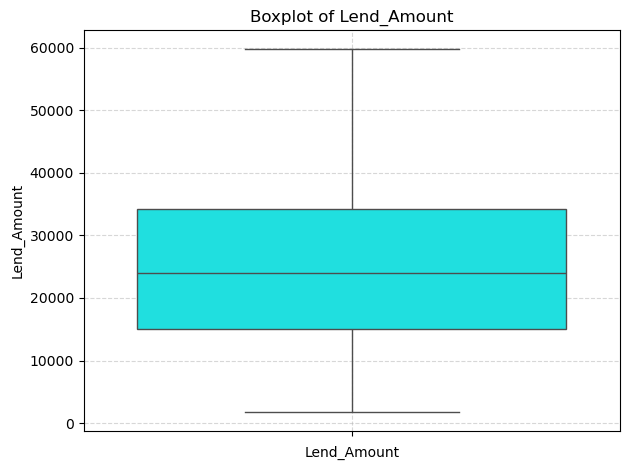

Lend_Amount Mean: 25920.53568
Lend_Amount Median: 23940.0
Lend_Amount Mode: [17100.0]




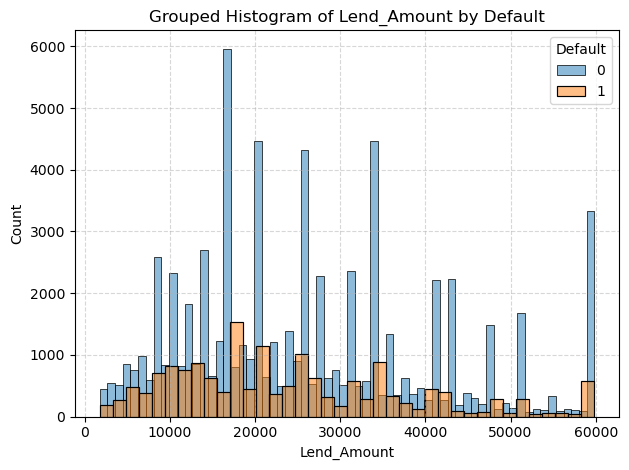


=== Analyzing: Usage_Rate ===


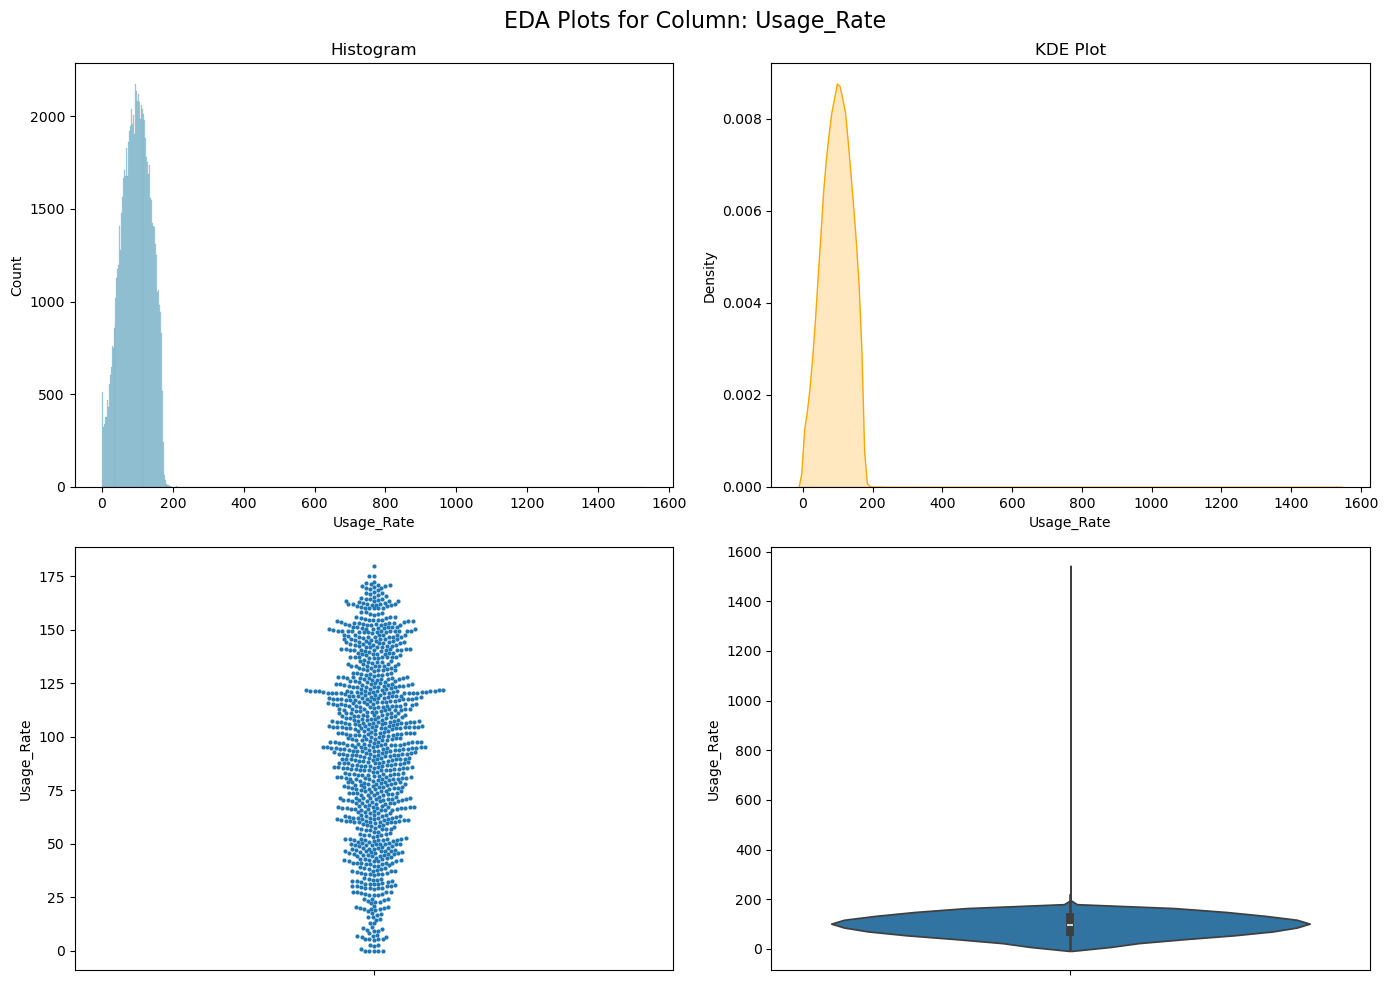

Histogram minimum: 0.0
Histogram maximum: 1534.756


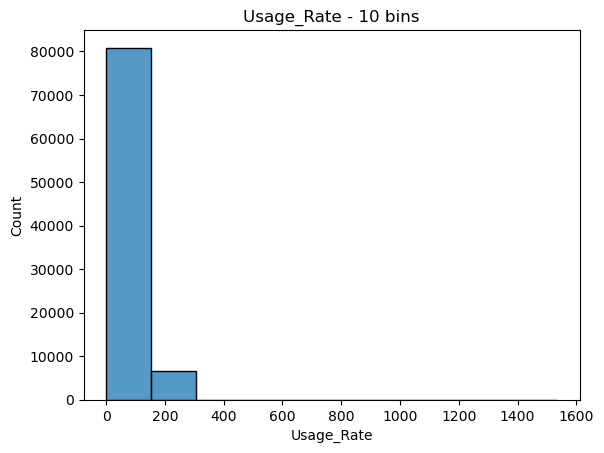

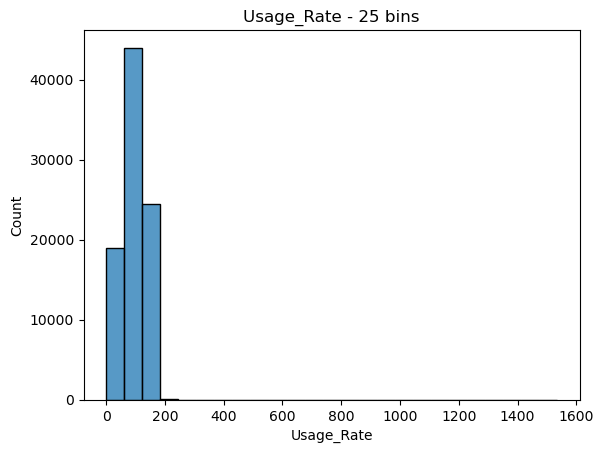

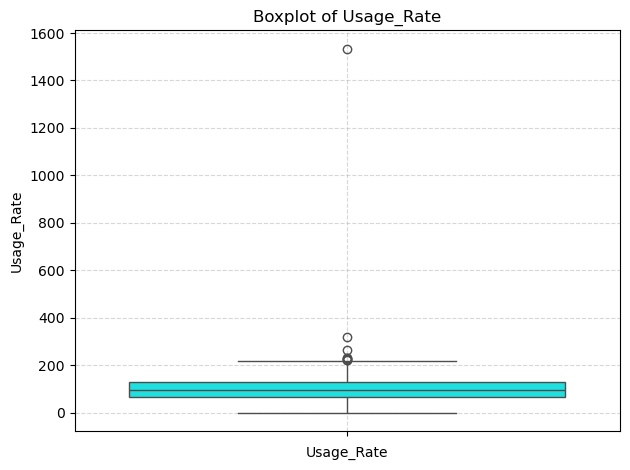

Usage_Rate Mean: 95.51734774857142
Usage_Rate Median: 97.008
Usage_Rate Mode: [0.0]




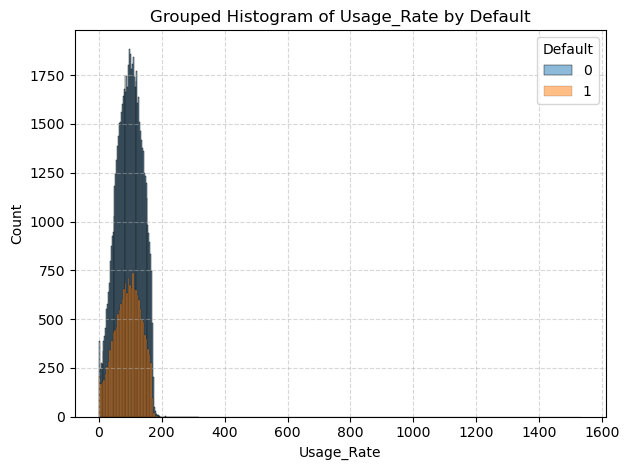


=== Analyzing: Unpaid_Amount ===


C:\Users\jdblu\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


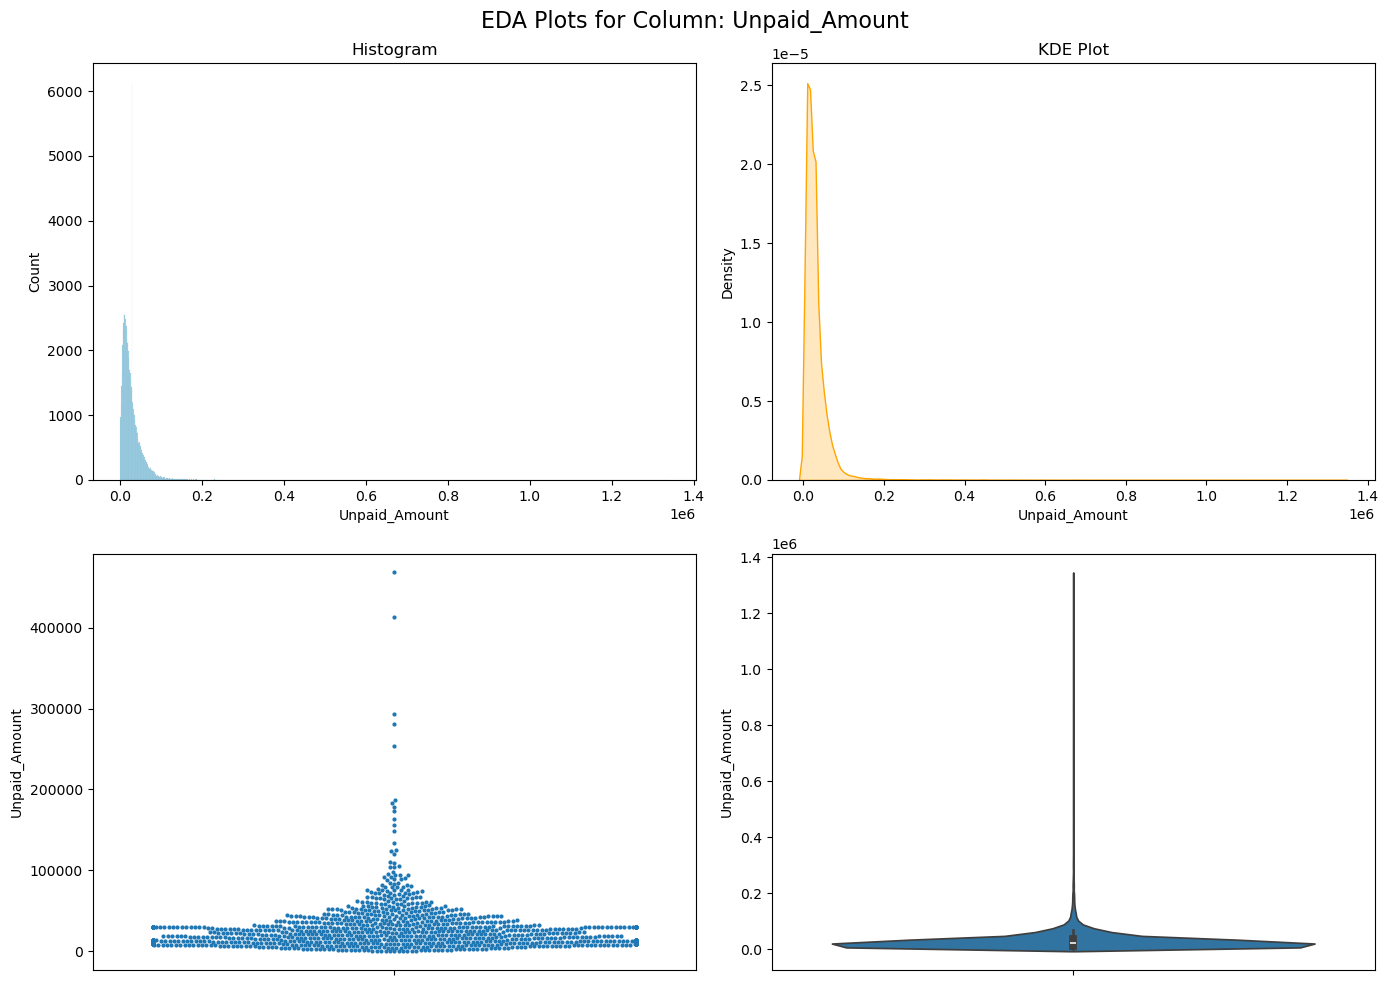

Histogram minimum: 0.0
Histogram maximum: 1338777.81


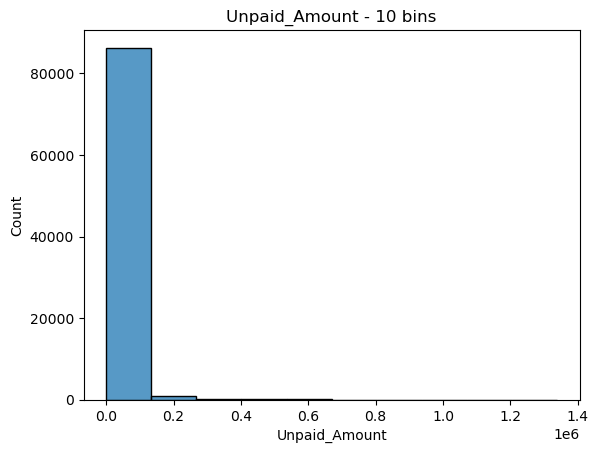

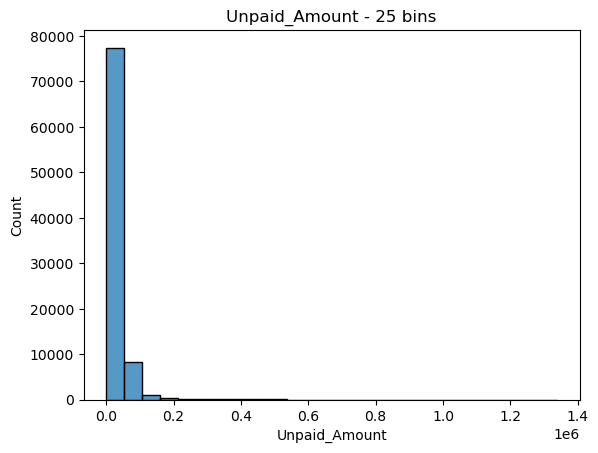

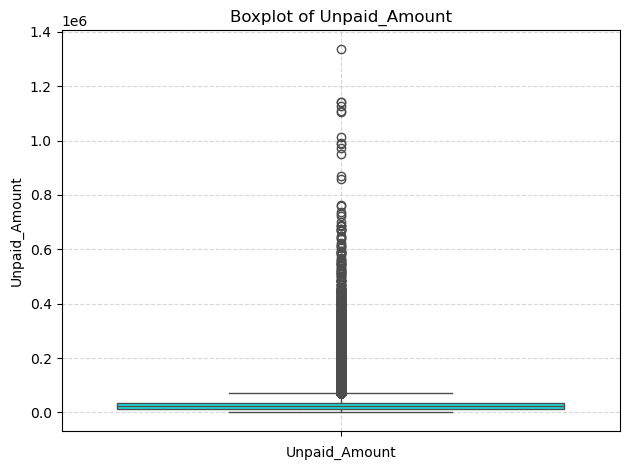

Unpaid_Amount Mean: 29556.494524126418
Unpaid_Amount Median: 22224.87
Unpaid_Amount Mode: [29556.494524126418]




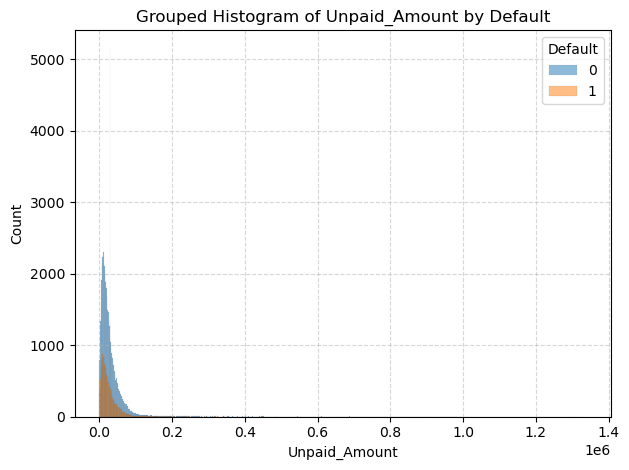


=== Analyzing: Interest_Charged ===


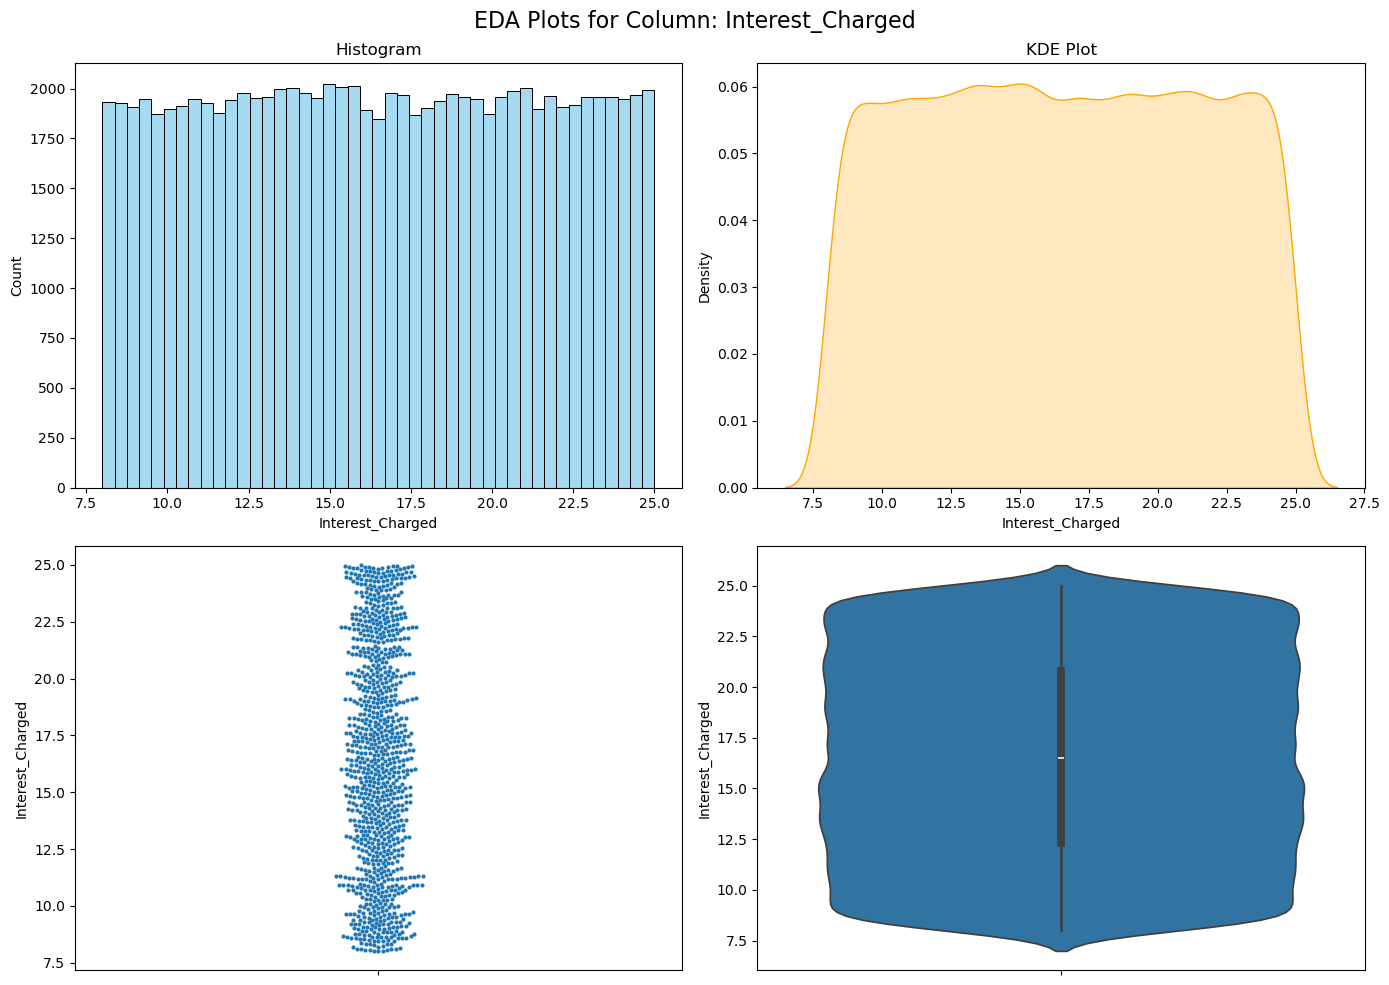

Histogram minimum: 8.0
Histogram maximum: 25.0


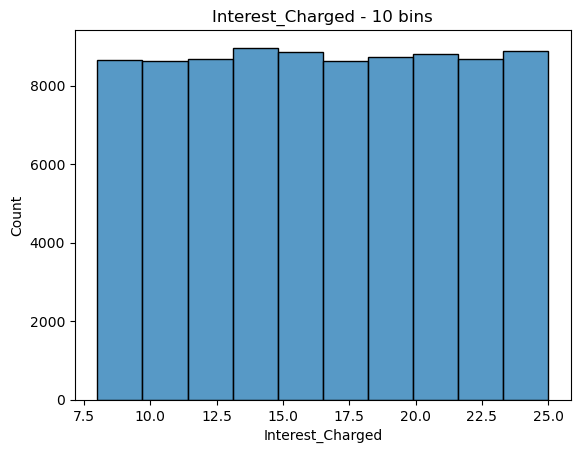

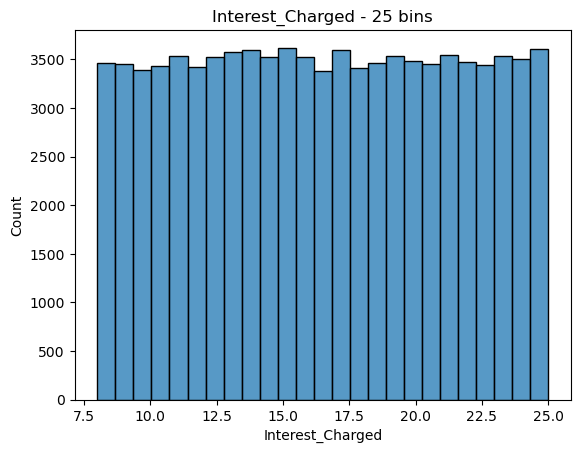

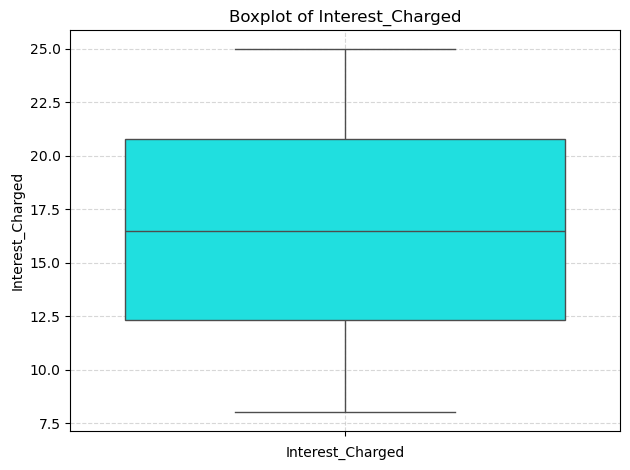

Interest_Charged Mean: 16.51837474285714
Interest_Charged Median: 16.49
Interest_Charged Mode: [14.56]




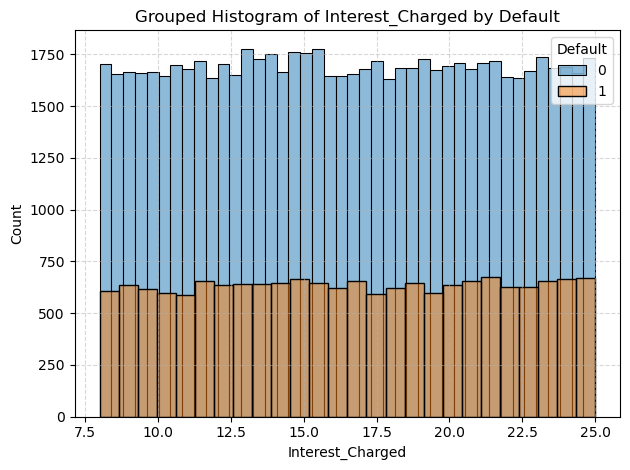


=== Analyzing: Gross_Collection ===


C:\Users\jdblu\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jdblu\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 87.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


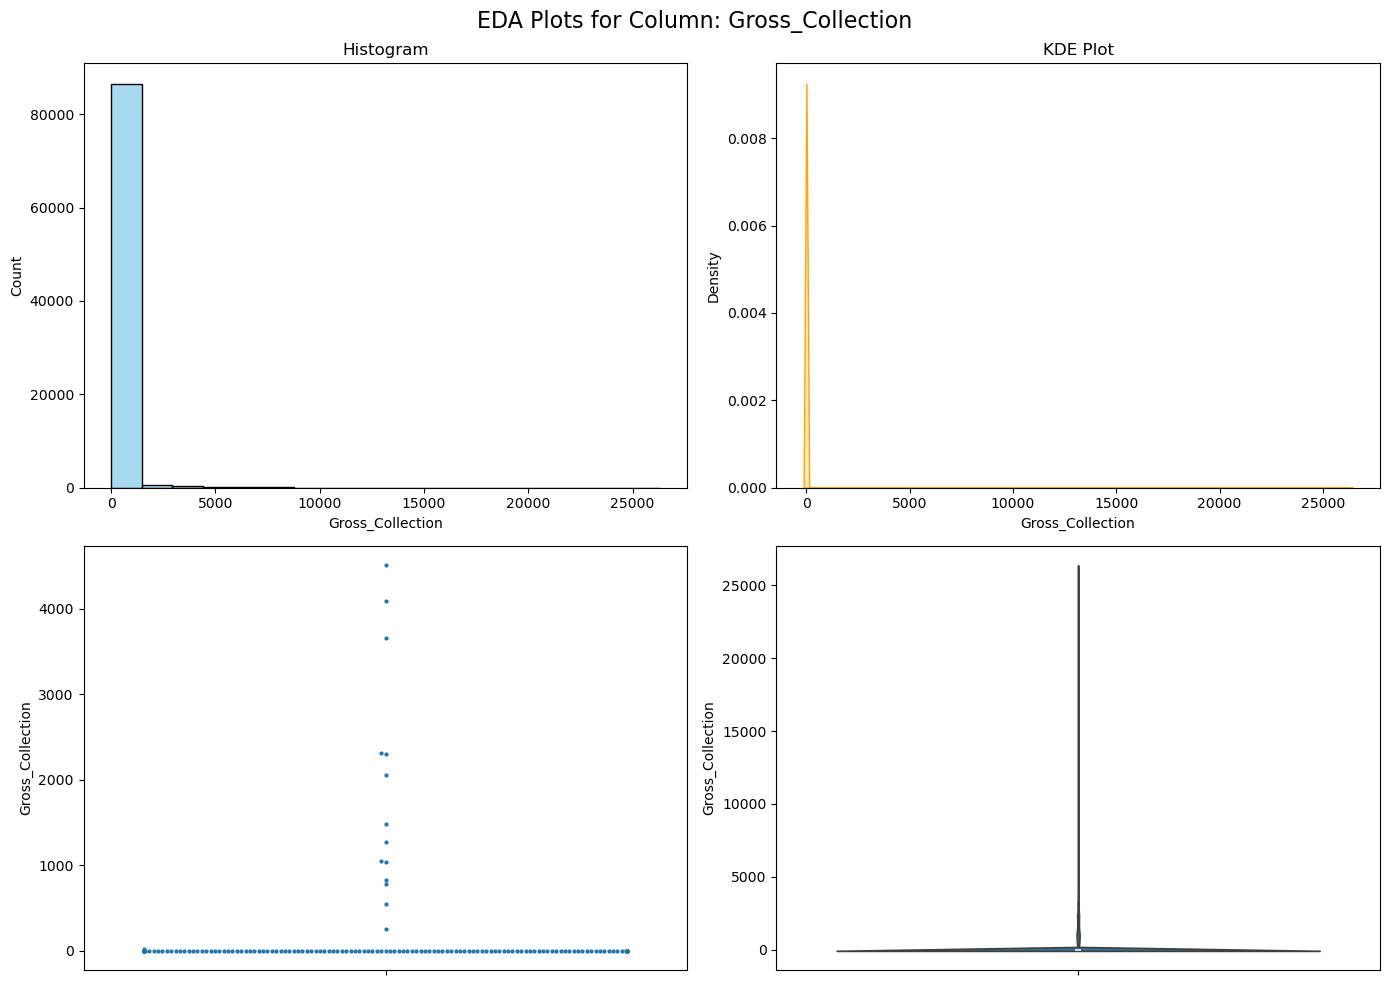

Histogram minimum: 0.0
Histogram maximum: 26308.47


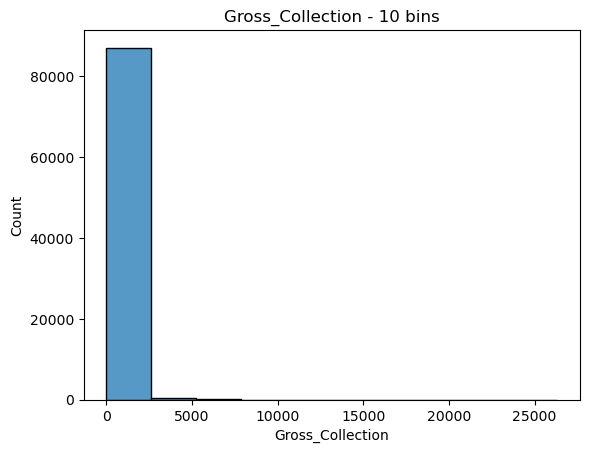

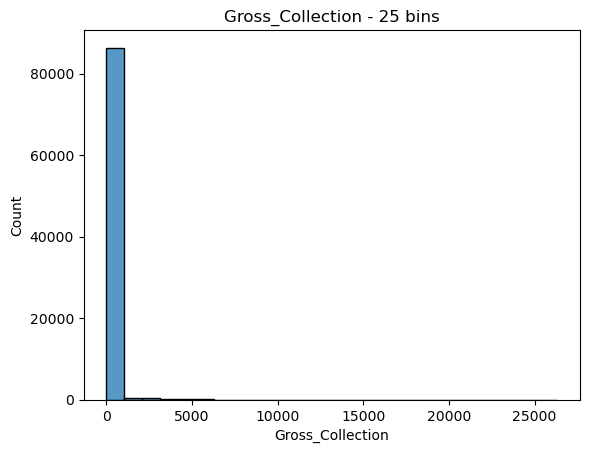

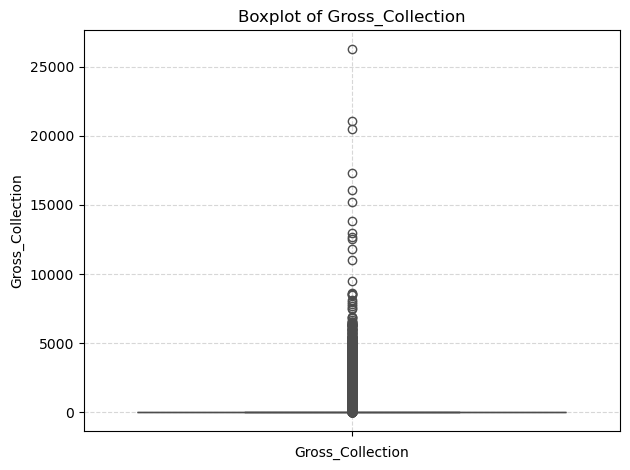

Gross_Collection Mean: 39.46169702857143
Gross_Collection Median: 0.0
Gross_Collection Mode: [0.0]




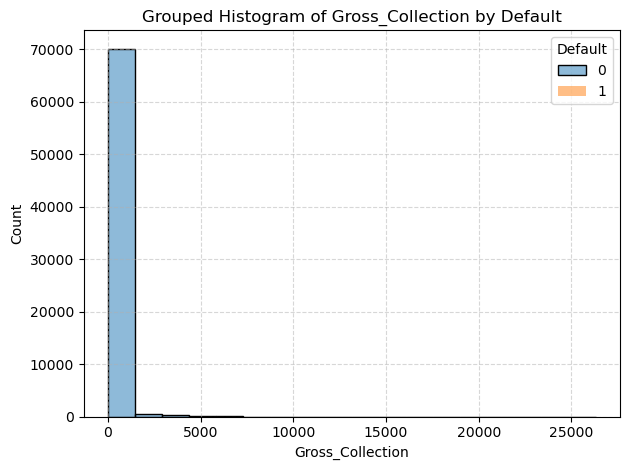


=== Analyzing: Total_Unpaid_CL ===


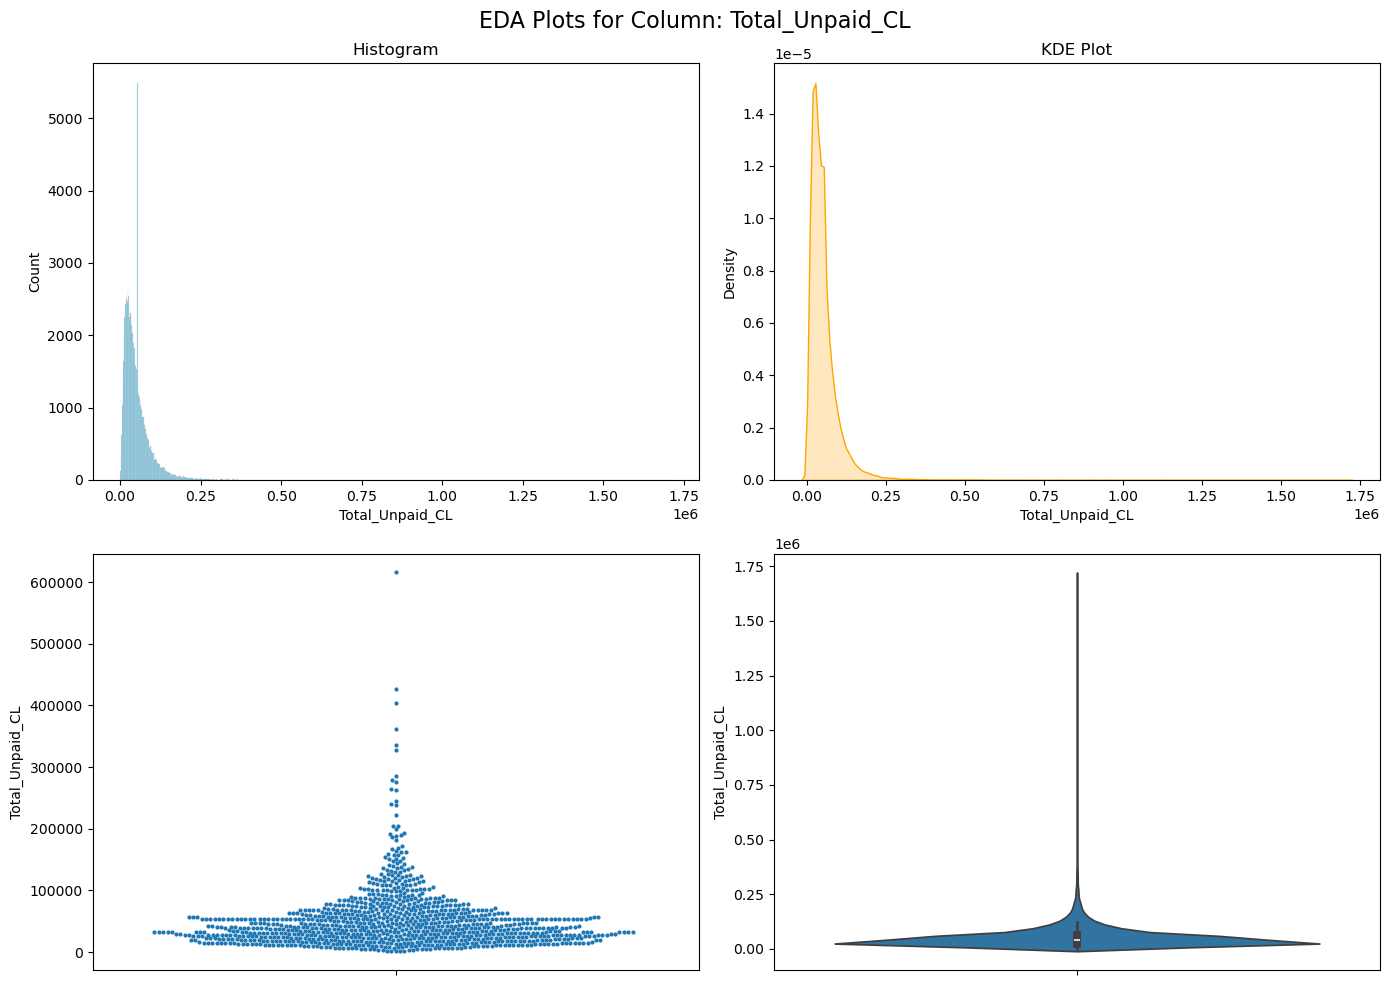

Histogram minimum: 332.0
Histogram maximum: 1710630.0


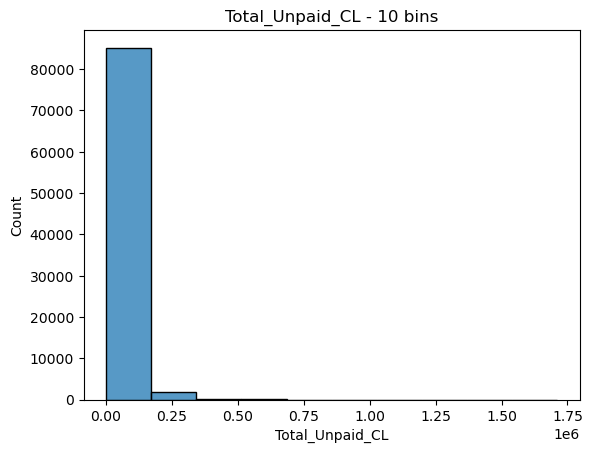

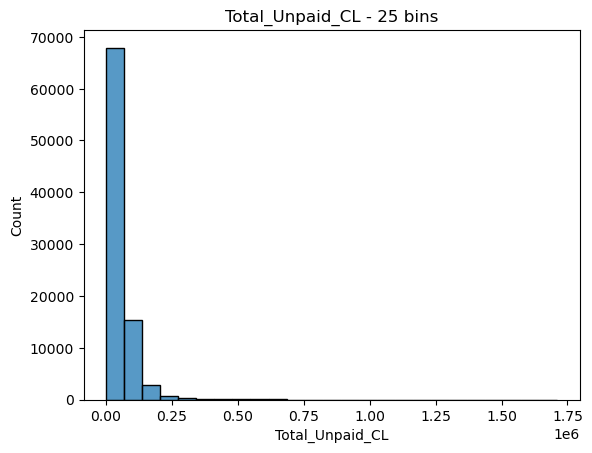

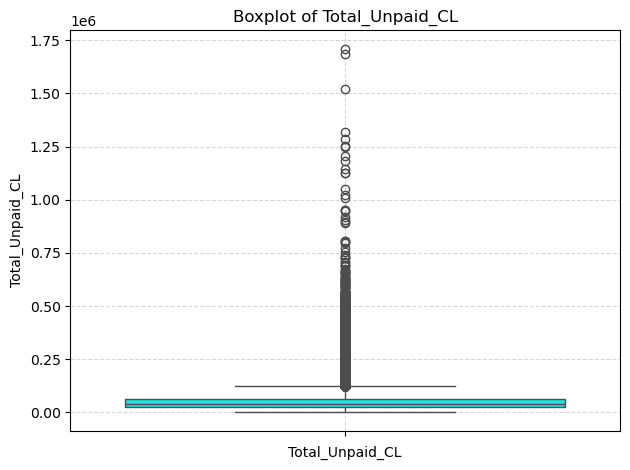

Total_Unpaid_CL Mean: 53268.64039369134
Total_Unpaid_CL Median: 41500.0
Total_Unpaid_CL Mode: [53268.64039369134]




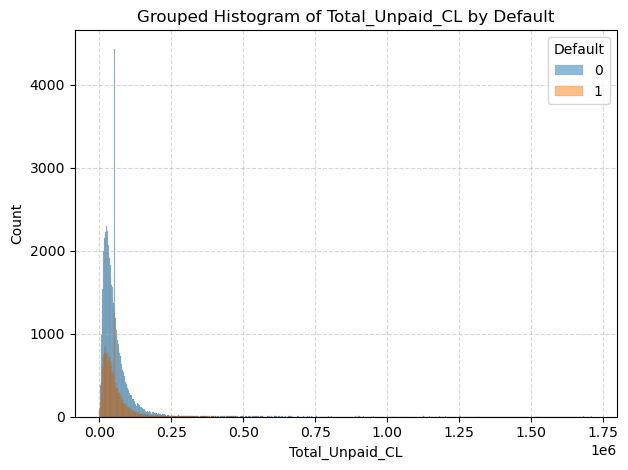


=== Analyzing: Due_Fee ===


C:\Users\jdblu\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jdblu\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 87.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


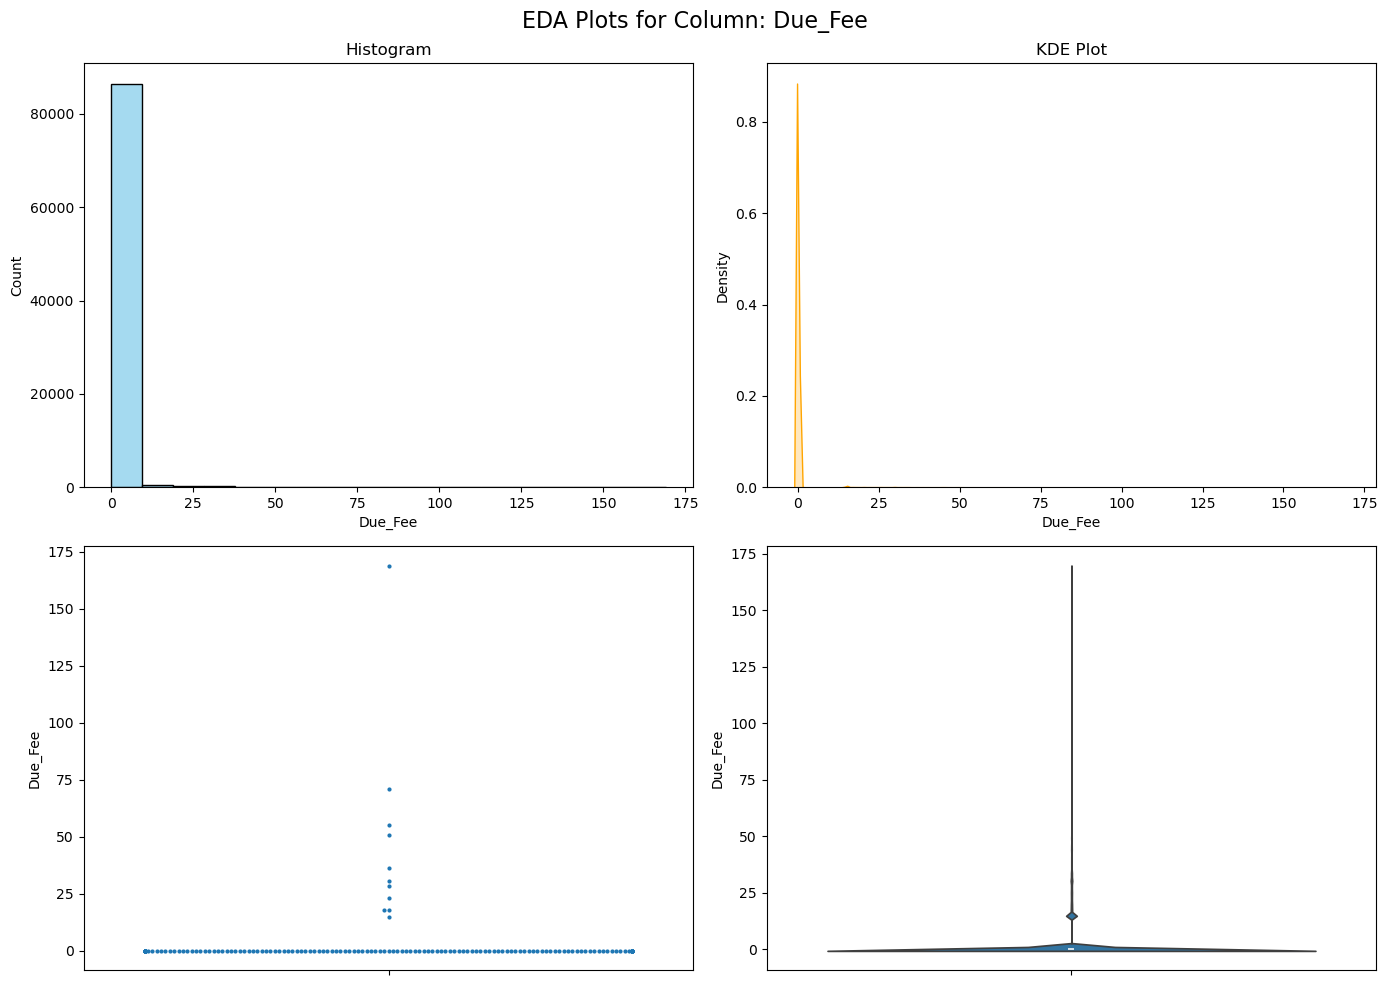

Histogram minimum: 0.0
Histogram maximum: 169.05


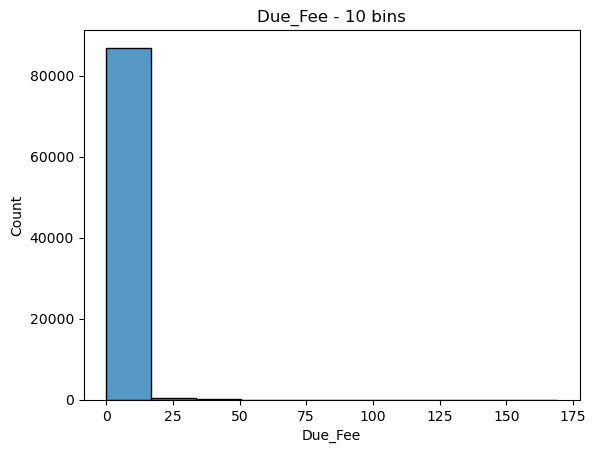

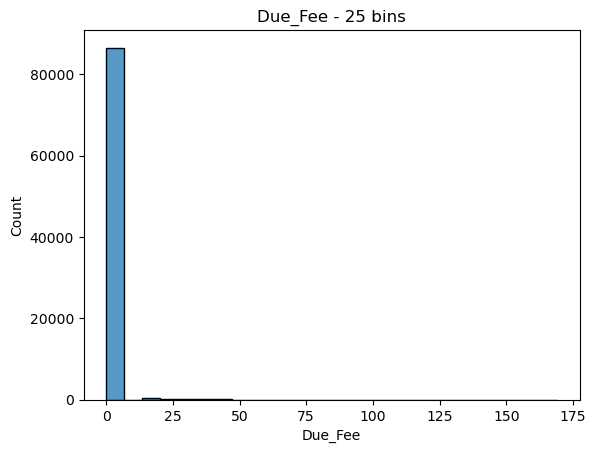

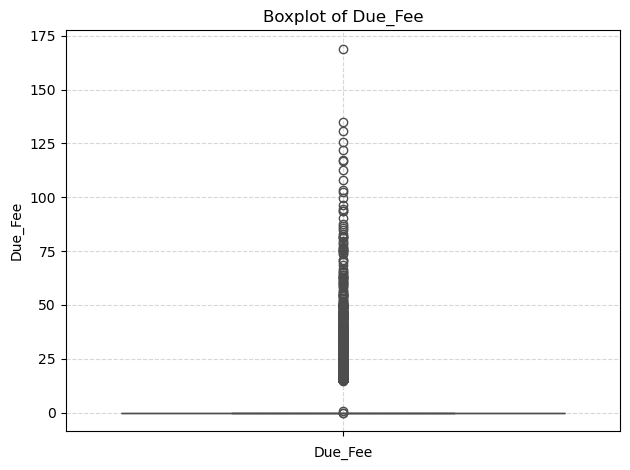

Due_Fee Mean: 0.3164071521024
Due_Fee Median: 0.0
Due_Fee Mode: [0.0]




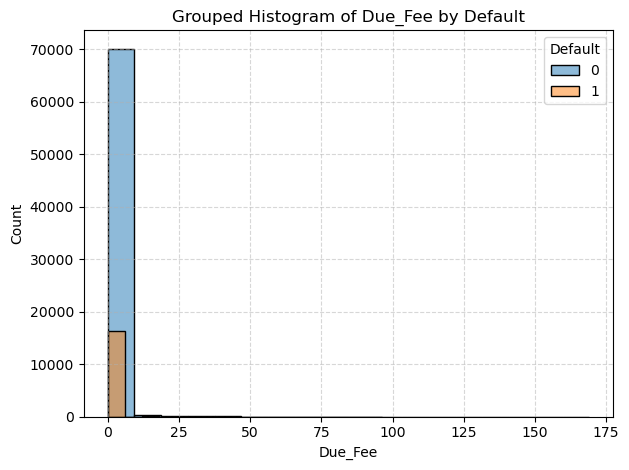

In [199]:
columns = ['Debt_to_Income', 'Lend_Amount', 'Usage_Rate', 'Unpaid_Amount', 
           'Interest_Charged', 'Gross_Collection', 'Total_Unpaid_CL', 'Due_Fee']

for col in columns:
    print(f"\n=== Analyzing: {col} ===")
    distribution_plots(LoanDefaultPrediction, col)
    get_hist_min_max(LoanDefaultPrediction, col, 'auto')
    
    plt.figure()
    sns.histplot(LoanDefaultPrediction[col], bins=10)
    plt.title(f'{col} - 10 bins')
    plt.show()
    
    plt.figure()
    sns.histplot(LoanDefaultPrediction[col], bins=25)
    plt.title(f'{col} - 25 bins')
    plt.show()
    
    box_plot(LoanDefaultPrediction, col)
    col_summary_stastistics(LoanDefaultPrediction, col)
    grouped_hist(LoanDefaultPrediction, col, 'Default', 'auto')

Looking at some of our visualizations from above, some interesting takeaways are:

Debt to income has one incredibly high outlier (their ratio is over 700%). While this is not unheard of, it is by far above and away the highest value in this dataset.
I don't believe we need to remove it, as it is technically a feasible value but we should watch it closely when modeling to sure it is not over contributing.

Lends amount appears to have a standard looking distribution with values centered around 17000 and then tapering off on either side. There appears to be slight right skew but nothing extreme. Looking at the grouped bar chart comparing default, we do see some spikes at certain loan amount ranges, however it appears to track with the overall population distribution.

Similarly to our debt_to_income field, credit usage rate also appears to have one incredibly high outlier at 1600%. I absolutely believe we will need to take this into account when doing modeling work. We shouldn't necessarily look to remove the column, but we will most likely look to exclude it when weighting averages or tuning parameters.

Other interesting observations include that our interest charges seems to have a flat-even distribution across both our populations. Unpaid amounts also appears incredibly skewed to the right, which is caused by a large amount of outliers with high debt amounts. This might actually not be that out of the ordinary however as some high earning individuals regularly take out large loans to avoid traditional income based tax systems.

### Conclusion - Default Preditiction Data

In analyzing our third dataset, we can observe that while the data is generally clean and well structured, there are a number of outliers present across a number of variables such as income, and credit related stats. These outliers, although noticeable, do not appear to be data entry errors or extreme anomalies that would disqualify the dataset from this project. Instead, these outliers are likely a reflection natural variation within the borrower population and should be carefully considered during modeling going forward. Overall, the dataset appears to be suitable for machine learning tasks.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

Let's  try to create the waterfall chart shown on page 56. From doing some research, this appears to be done via manipulating a classic bar chart

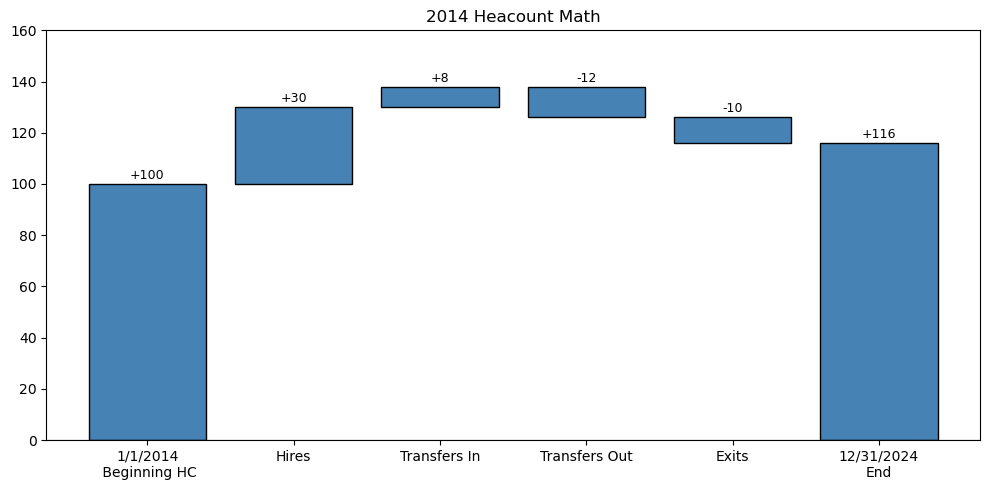

In [205]:
#create dummy data based off the example waterfall chart
values = [100, 30, 8, -12, -10, 116]
labels = ['1/1/2014\n Beginning HC', 'Hires', 'Transfers In', 'Transfers Out', 'Exits', '12/31/2024\nEnd']

#watterfall charts are just as series of bar charts that use the running cumulative sum as the starting points
base = [0] #start the graph at 0
cumulative = [values[0]] #cumulative val starts at 0
for v in values[1:-1]: #iterate through all values except the beginning and end (those are fixed)
    cumulative.append(cumulative[-1] + v) #add to the cumulative val with each loop
base += cumulative[:-1] #set the cumul val as our next base
#print(base)
base.append(0)

#plotting
plt.figure(figsize=(10, 5))
for i in range(len(values)):
    plt.bar(labels[i], values[i], bottom=base[i], color='steelblue', edgecolor='black') #basic formatting
    label_y = base[i] + (values[i] if values[i] > 0 else 0) #if the value is a 
    plt.text(i, label_y + 2, f"{values[i]:+}", ha='center', fontsize=9)

#set y-lim so graph is not smushed
plt.ylim(0, 160)

plt.axhline(0, color='black', linewidth=0.8)
plt.title("2014 Heacount Math")
plt.tight_layout()
plt.show()